# Data Visualization
## CMU Data Science Club
### Husni Almoubayyed

Follow along by visitng https://bit.ly/DSCViz

In [ ]:
# this cell simply hides warnings from the output of cells in this notebook. 
import warnings
warnings.filterwarnings('ignore')

In [1]:
# import numpy and matplotlib and setup inline plots by running:
%pylab inline

# set the matplotlib backend to a higher-resolution option, on macOS, this is:
%config InlineBackend.figure_format = 'retina'

# set larger figure size for the rest of this notebook
matplotlib.rcParams['figure.figsize'] = 19,14

Populating the interactive namespace from numpy and matplotlib


In [2]:
# some other packages we will need for later
import pandas as pd
import seaborn as sns

Seaborn provides functionality for very easily making plots look consistent and significantly prettier. My favorite setting is 'darkgrid', but click shift-tab after pressing on the set_style function to bring up more information on other arguments this function takes. (You can do this for any function in a Jupyter notebook).

This sets a darkgrid as the background for plots and uses muted colors. I often also set the color palette to a colorblind-friendly palette, and set larger font sizes for the plots.

In [19]:
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set_context('notebook', font_scale=2)

We will use several datasets that can be imported directly from seaborn. Later on in the interactive visualization section, we will use pandas to fetch financial data in real-time.

## Density Estimation

In [10]:
# import out first dataset, an example from biology
iris = sns.load_dataset('iris')

`iris` is now a `pandas` `DataFrame`, which is a nice tabular format for datasets. To look at the first 5 elements, we can run:

In [6]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Often when we are making plots, we are trying to estimate the underlying distribution from which it was randomly drawn, this is known as Density Estimation in statistics. The simplest density estimator that does not make particular assumptions on the distribution of the data (we call this nonparametric) is the histogram.

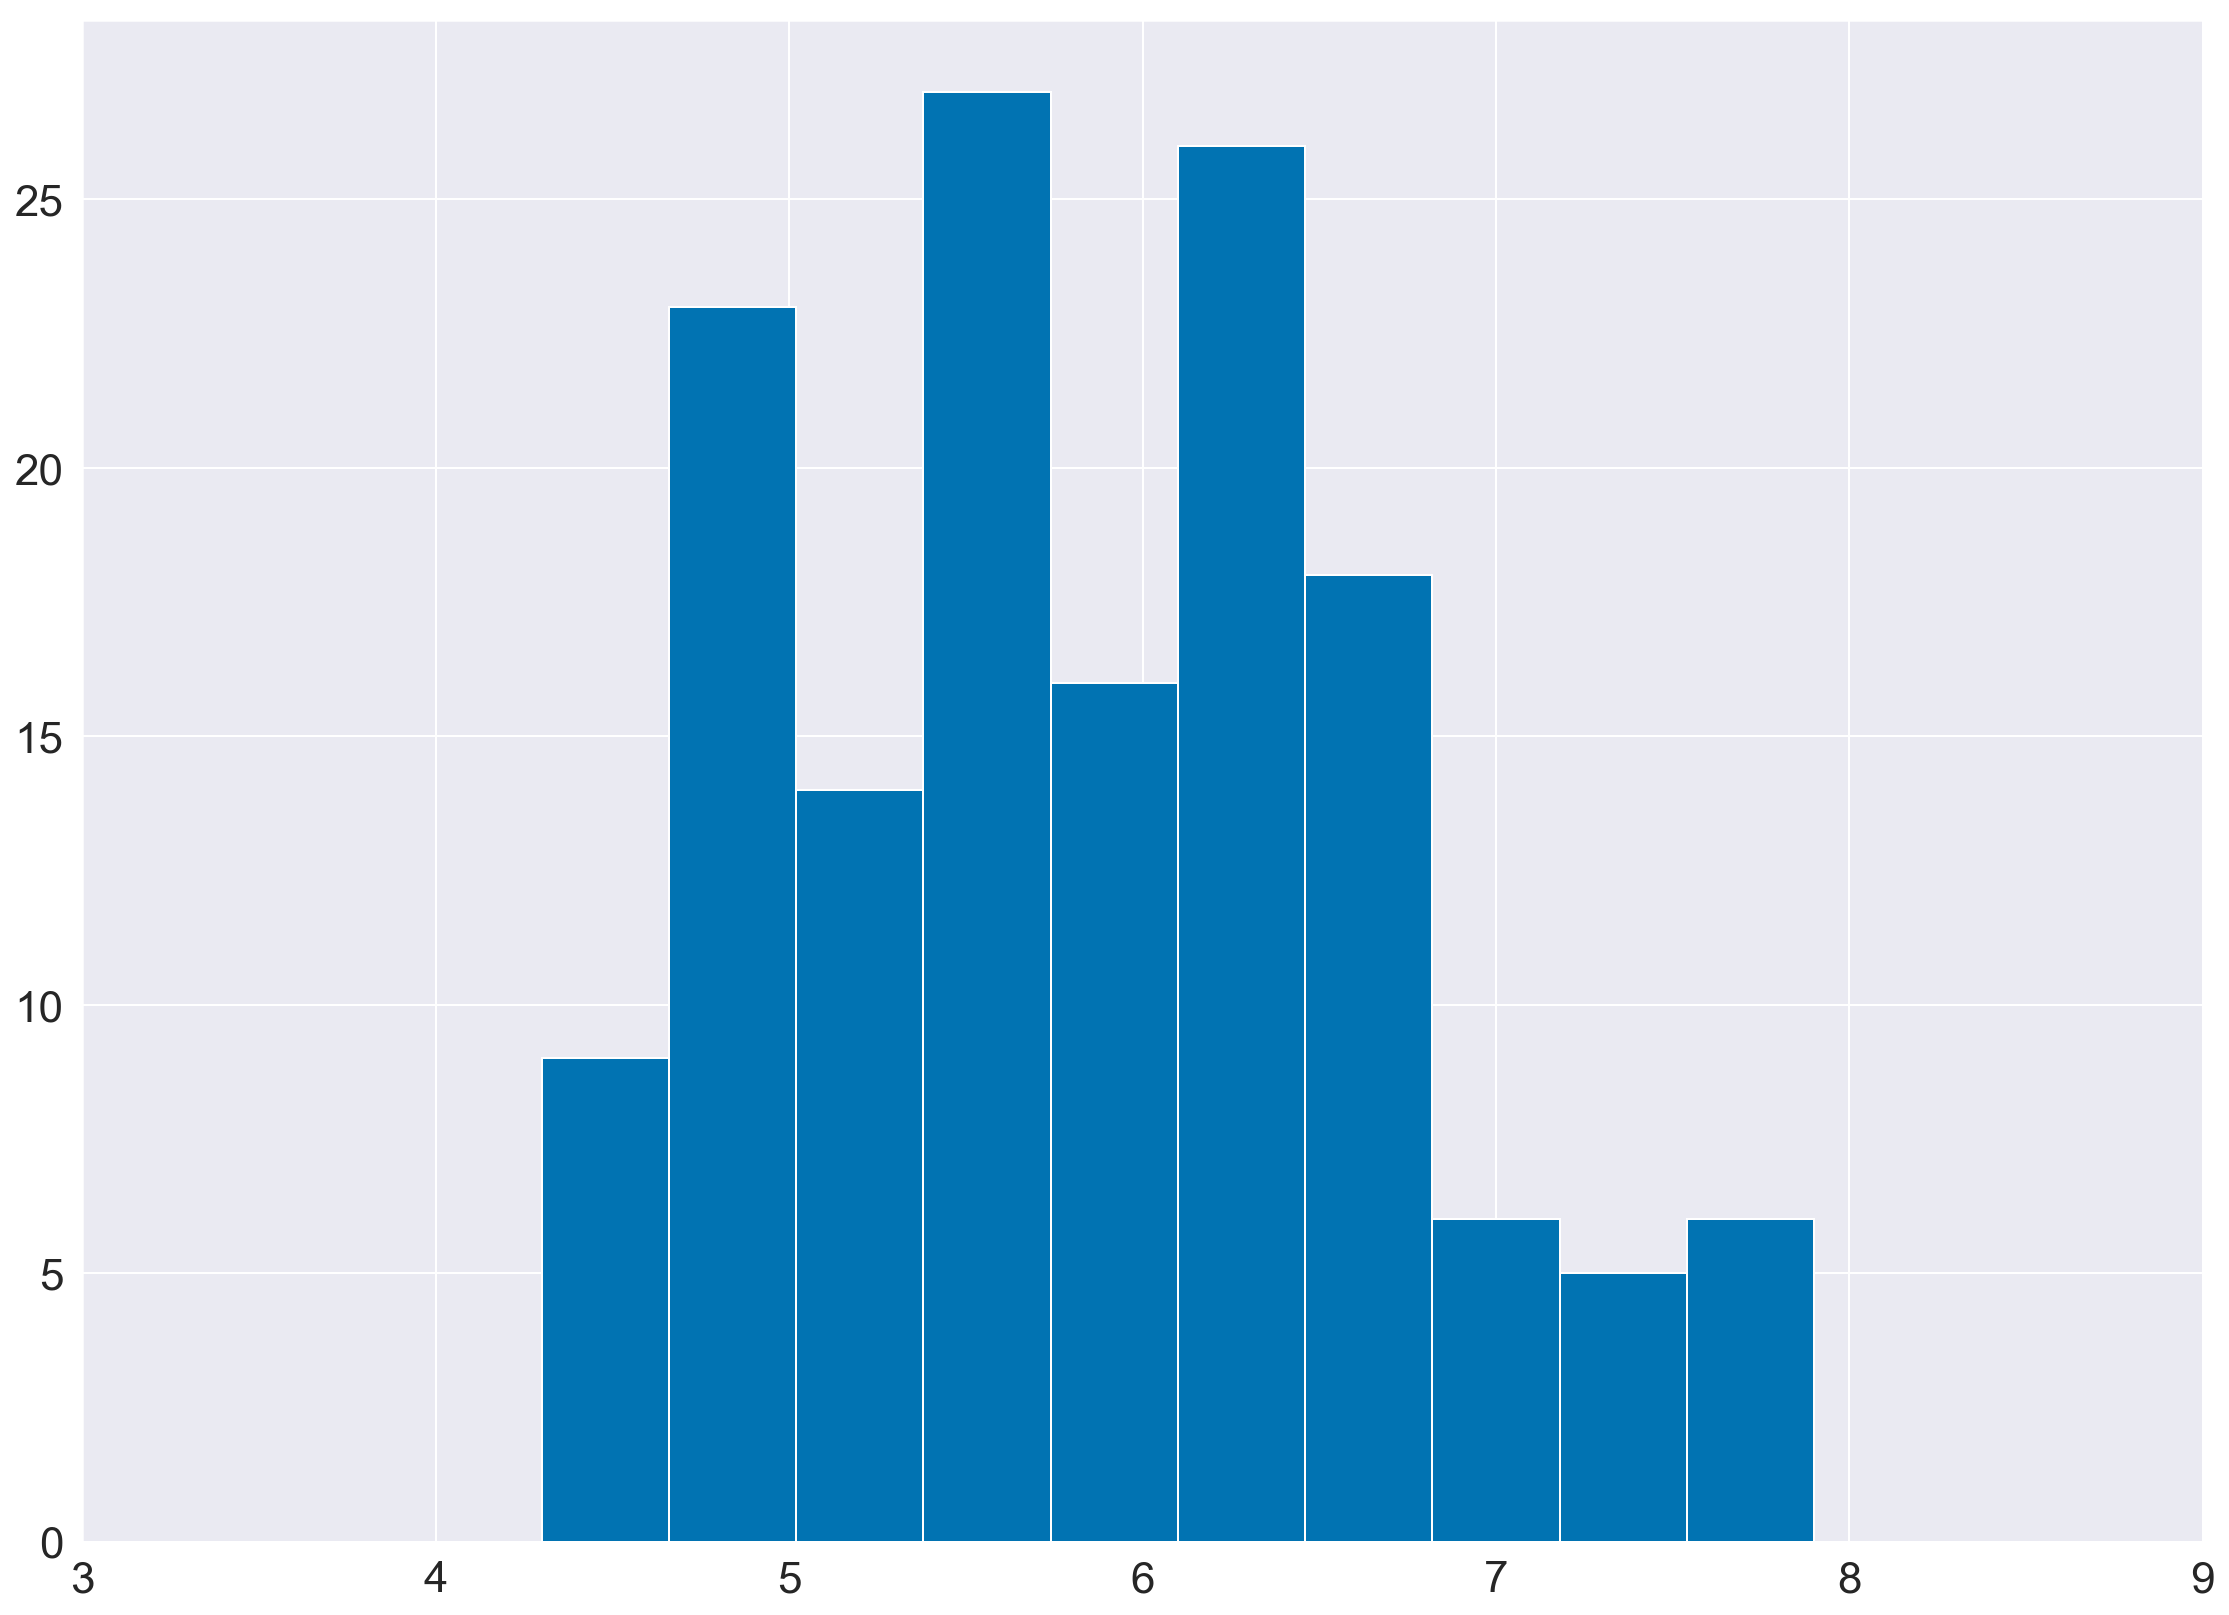

In [9]:
plt.hist(iris['sepal_length']);
plt.xlim((3,9));

Formally, The histogram estimator is $$ \hat{p}(x) = \frac{\hat{\theta_j}}{h} $$ where $$ \hat{\theta_j} = \frac{1}{n} \sum_{i=1}^n I(X_i \in B_j ) $$

We can calculate the mean squared error, which is a metric that tells us how well our estimator is, it turns out to be: $$MSE(x) = bias^2(x) + Var(x) = Ch^2 + \frac{C}{nh} $$
minimized by choosing $h = (\frac{C}{n})^{1/3}$, resulting in a risk (the expected value of the MSE) of:
$$ R = \mathcal{O}(\frac{1}{n})^{2/3}$$
This means that 
 - There is a bias-variance tradeoff when it comes to choosing the width of the bins, lower width ($h$), means more bias and less variance. There is no choice of $h$ that optimizes both.
 - The risk goes down at a pretty slow rate as the number of datapoints increases, which begs the question, is there a better estimator that converges more quickly? The answer is yes, this is achieved by:

## Kernel Density Estimation:

This means using smoothing kernels $K(x)$, that follow some nice conditions: symmetry $\int x K(x) dx = 0$, positivity $ K(x) \geq 0$ and integrating to 1, which makes it a proper probability density $\int K(x) dx = 1$. Examples of kernels are normal distributions and tophat/boxcar distributions.

In Seaborn, we can apply KDE by running:

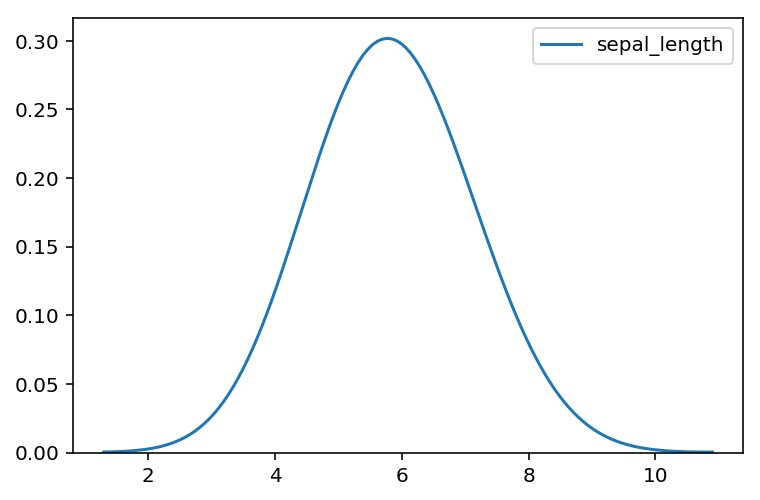

In [18]:
sns.kdeplot(iris['sepal_length'], bw=1);

We can also make both a histogram and KDE by simply running:

In [7]:
?sns.distplot

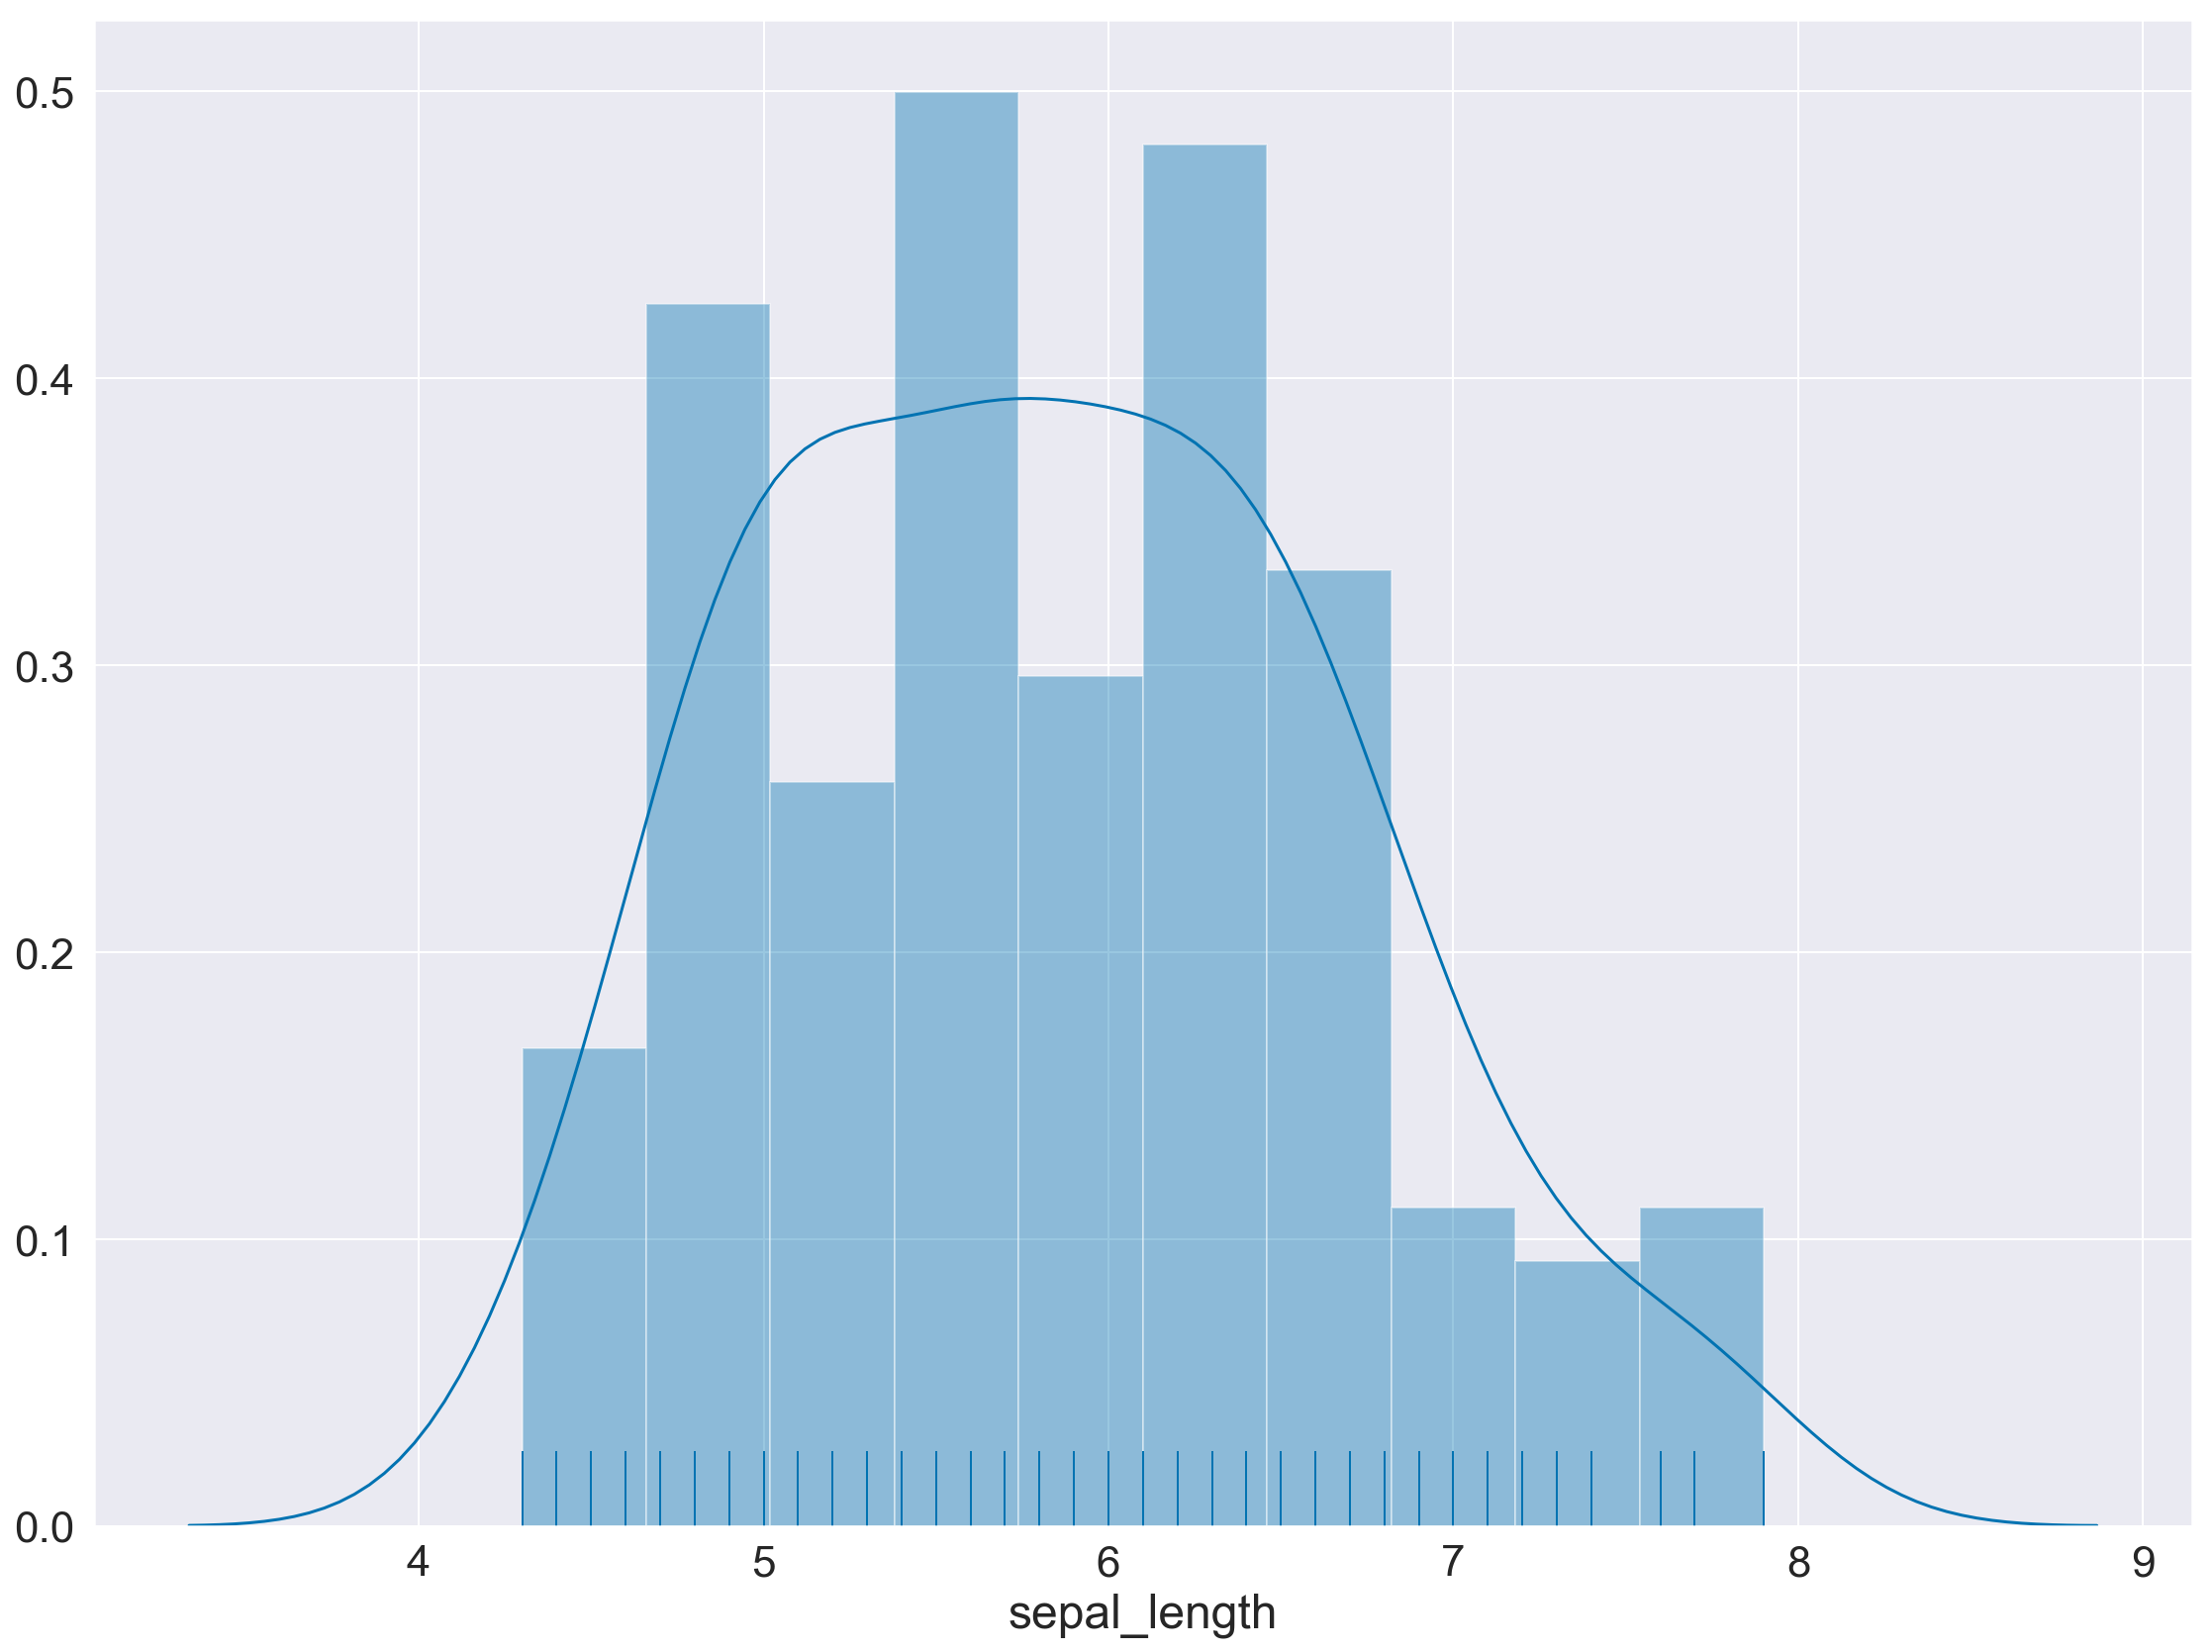

In [11]:
sns.distplot(iris['sepal_length'], bins=10, rug=True);

## Exercise:
Change the `bw` argument in the sns.kdeplot(), see how that changes the bias vs variance, make two plots with different bandwidths and comment on each whether it has high variance, high bias, both, or neither. Post in http://bit.ly/DSCVizPlots

Another fun distribution is the Bart Simpson distribution, this is very sensitive to choices of the width of the bin or the width of the kernel

In [12]:
# this cell creates the bart simpson distribution, you don't have to pay particular attention to it
def Bart():
    return 0.5 * np.random.normal(0,1) + 0.1 * sum([10*np.random.normal(i/2 - 1, 0.01) for i in range(5)])
bart = []
for i in range(10000):
    bart.append(Bart())

In [ ]:
# play around with the bandwidth argument to see how big an effect it can have on the density estimation
sns.kdeplot(bart, bw=0.1)

So how is this better than the histogram?
We can again calculate the MSE, which turns out to be:

$$MSE(x) = bias^2(x) + Var(x) = C_1h^4 + \frac{C_2}{nh}$$

minimized by choosing $ h = (\frac{C_1}{4nC_2})^{1/5} $, giving a risk of:

$$ R_{KDE} = \mathcal{O}(\frac{1}{n})^{4/5} < R_{histogram}$$

This still has a bias-variance tradeoff, but the estimator converges faster than in the case of histograms. Can we do even better? The answer is no, due to something in statistics called the minimax theorem.

Now let's try again with a 2D dataset.

In [13]:
# this creates a simple 2D dataset.
randatax, randatay = np.random.normal(0.2,5,10000), np.random.normal(-0.2,5,10000)

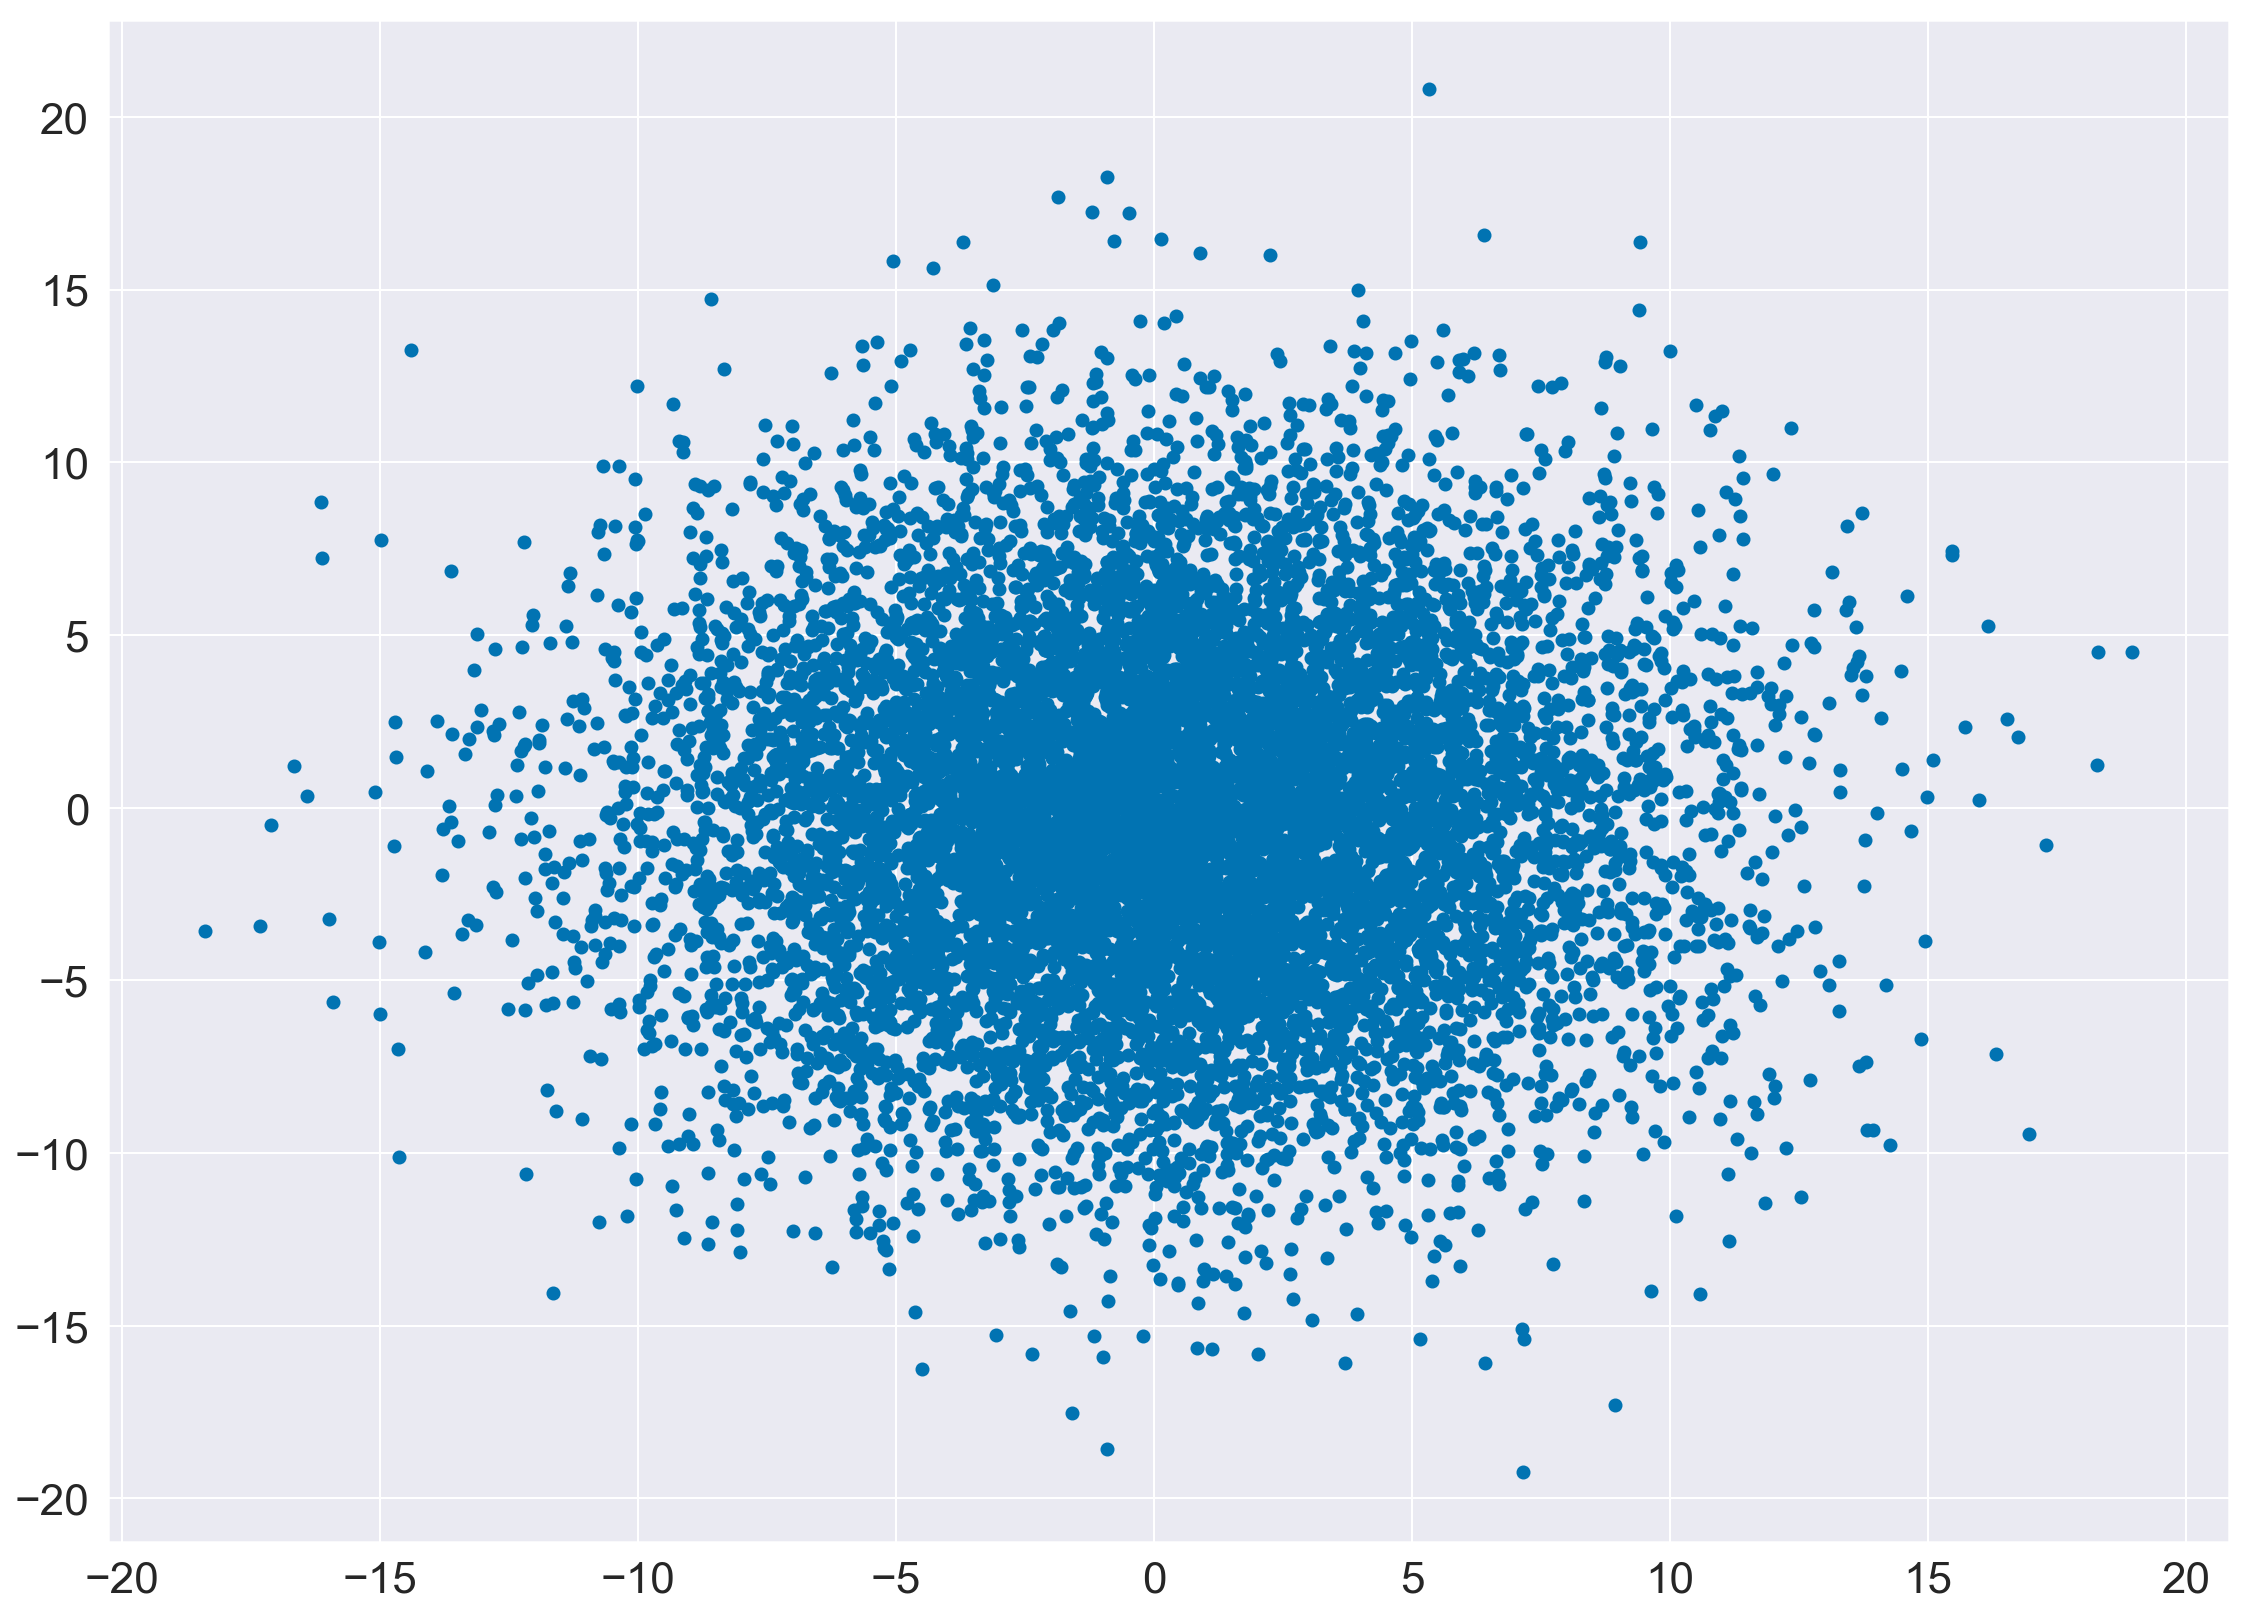

In [14]:
#make a simple scatterplot using matplotlib
plt.plot(randatax, randatay, 'o')

## Exercise:

Make a histogram and a KDE plot for this distribution. Post in http://bit.ly/DSCVizPlots

use the histogram estimator in 2D, using hexagonal binning, with lower limit of 2 objects to make a bin.



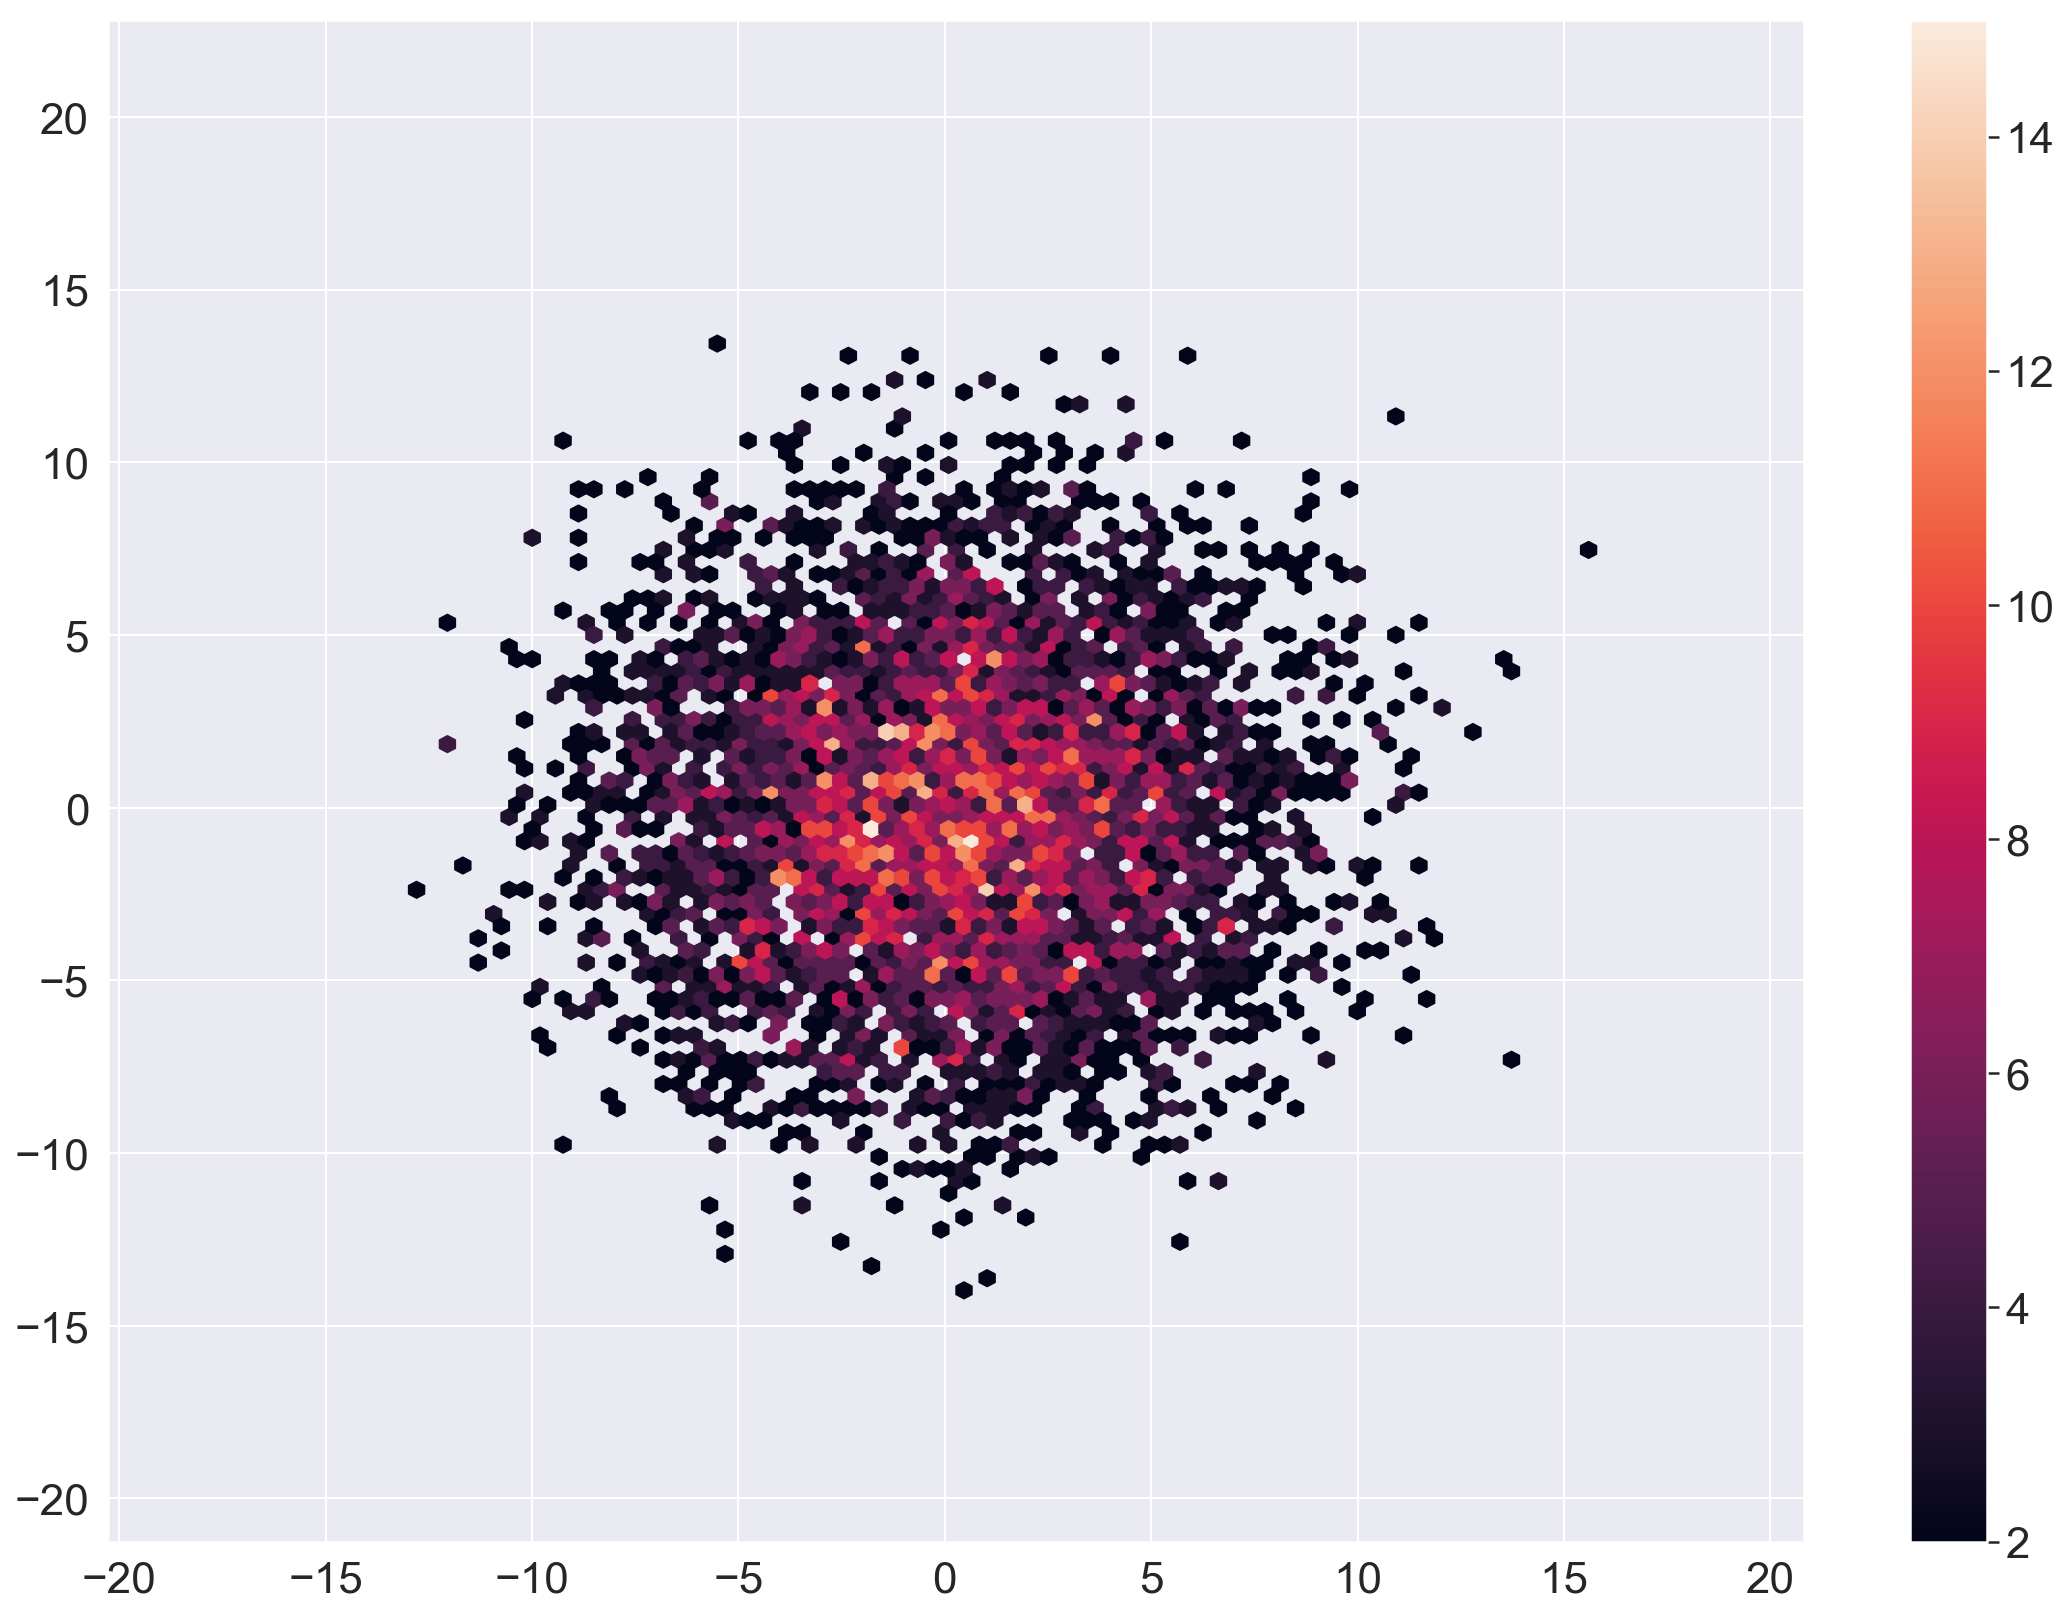

In [15]:
plt.hexbin(randatax, randatay, min cnt=2);
plt.colorbar();

and now use KDE to estimate the density of the data, in 2D this makes a contour plot. A clear advantage of this KDE is now that it is clear that the center of the underlying distribution of the data is not centered at (0, 0), which was not clear from a simple scatter plot, or even a histogram.

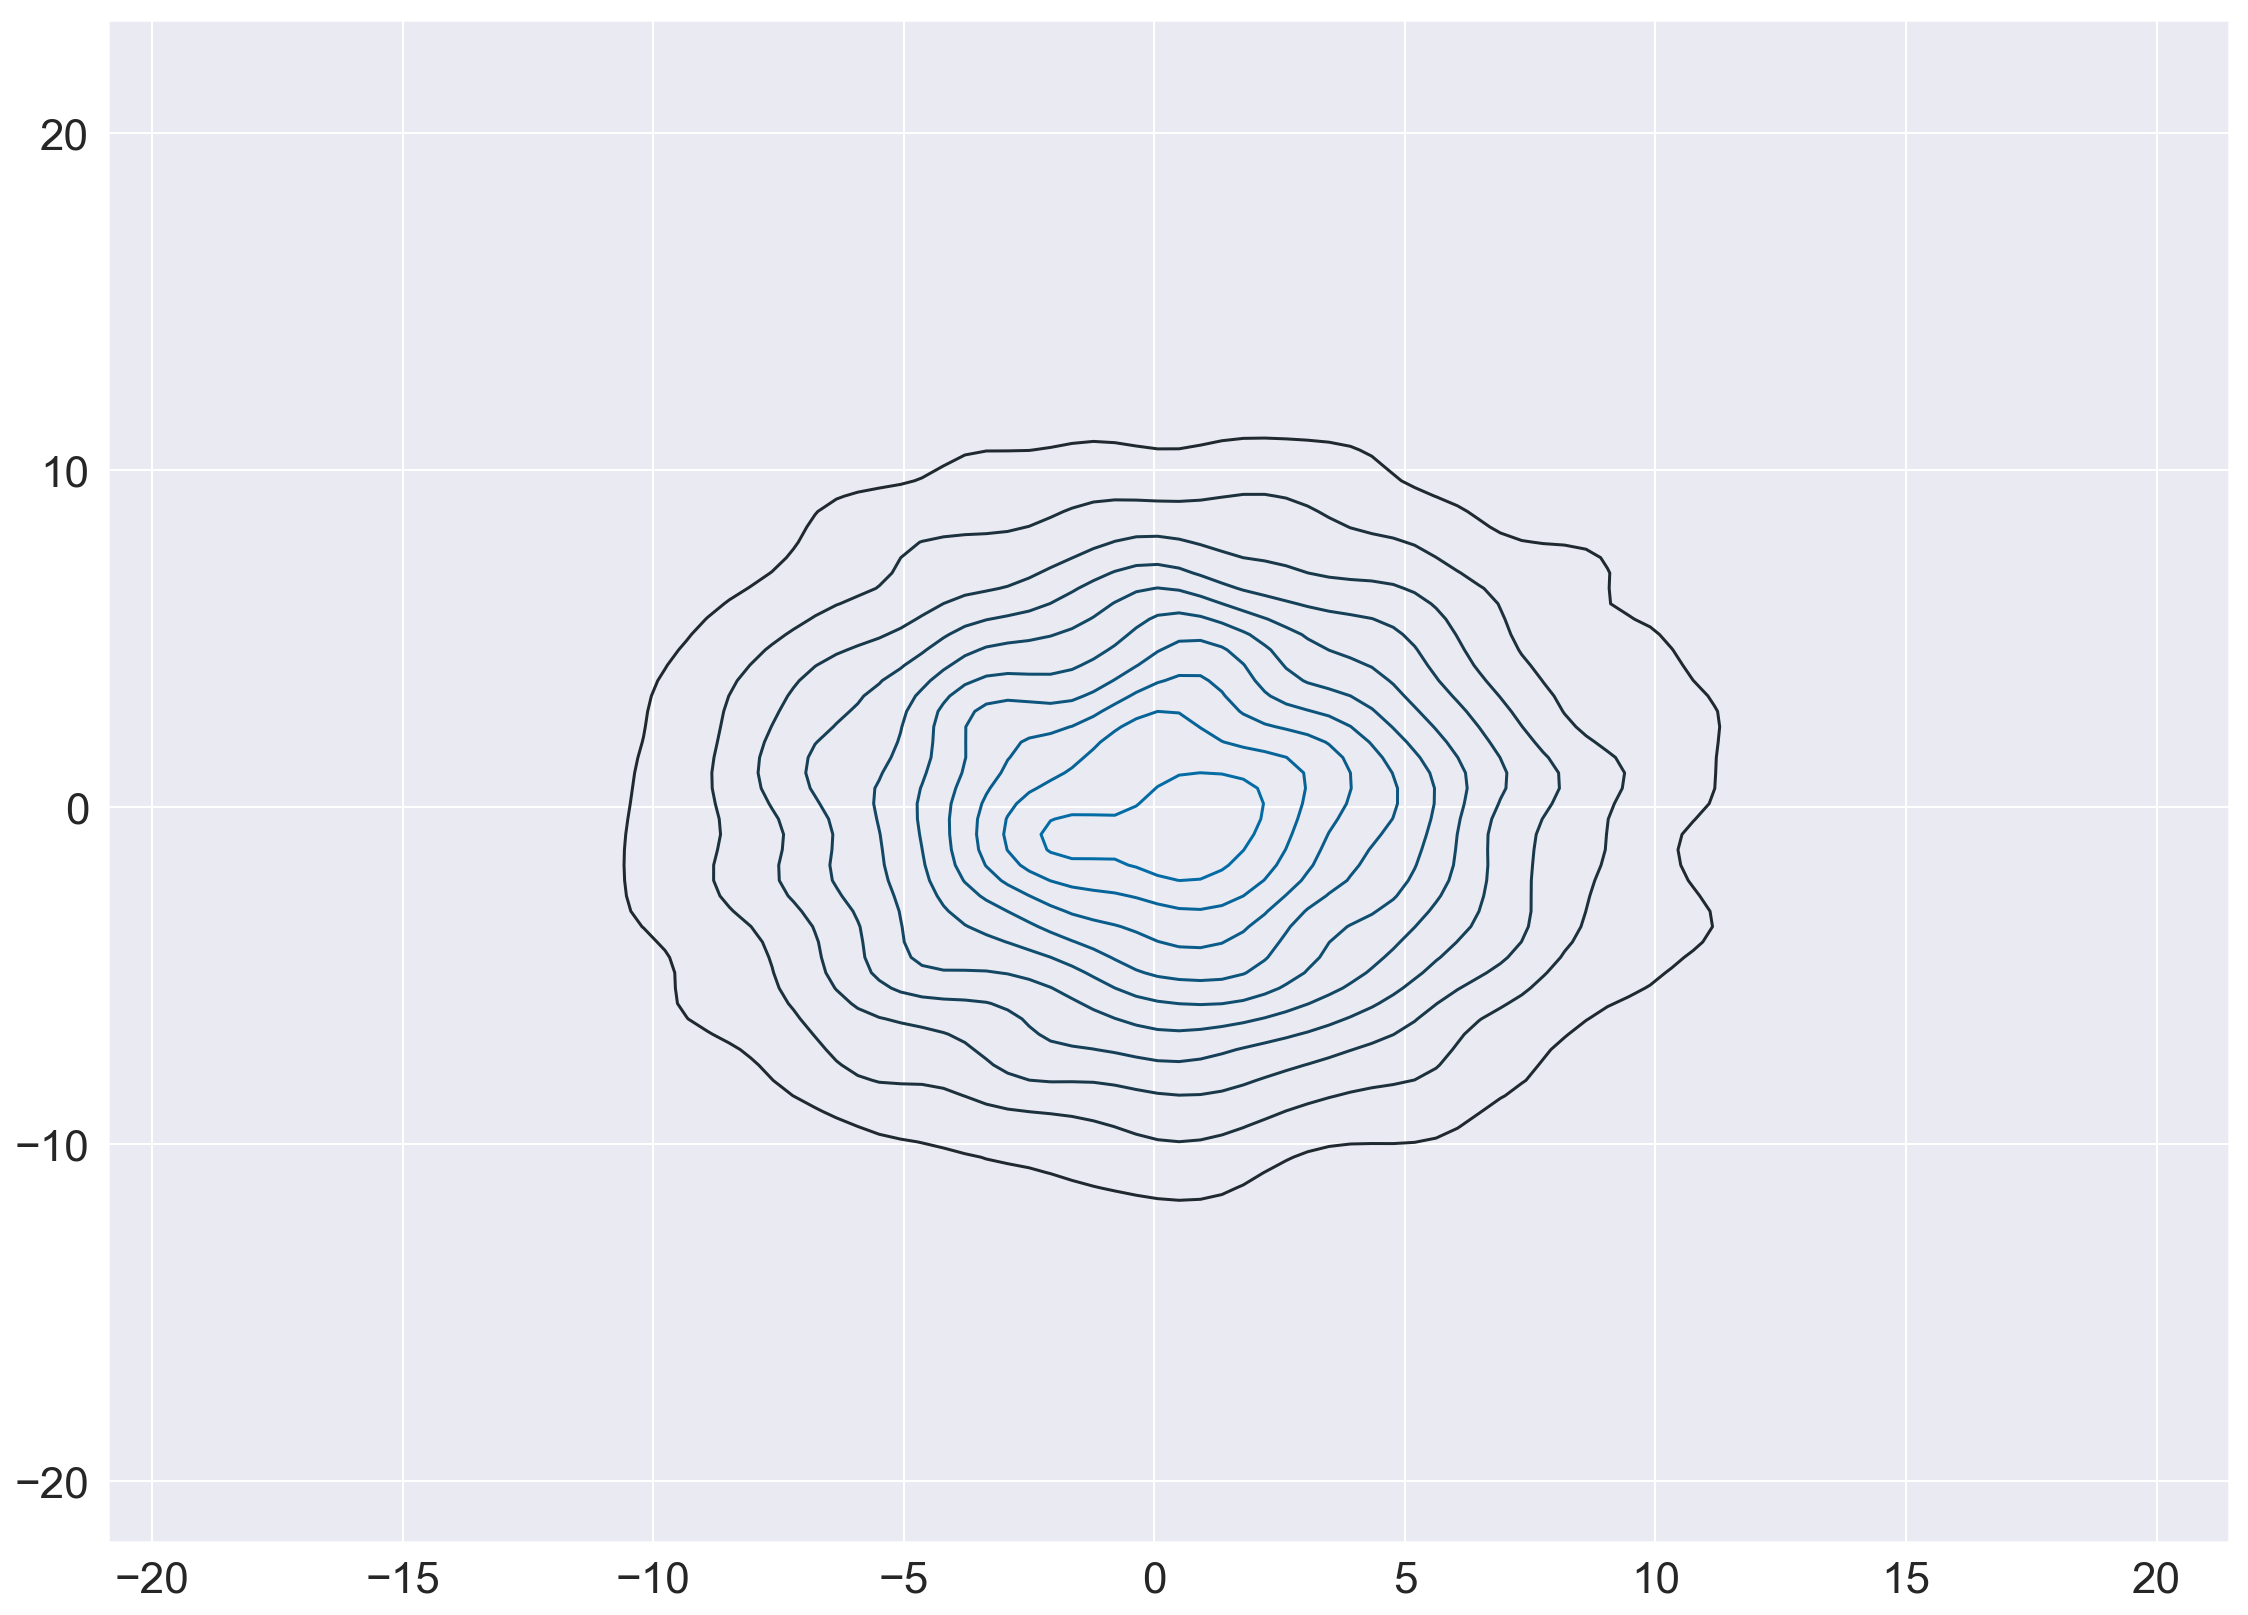

In [16]:
sns.kdeplot(randatax, randatay)

One thing to note is that the optimal risk of the KDE estimator in d-Dimensions is $R = \mathcal{O}(1/n)^{4/4+d}$, which converges more and more slowly as d increases (and does not converge in the limit of $d$ ->  $\infty$). This is known as the statistical curse of dimensionality.

## Data Exploration

The other main reason we use visualization is to explore our dataset, and check for correlations, relationships, and feature degeneracies. This is what we'll look at in this section.

Let's now go back to our `iris` dataset

The simplest thing we could do to explore the data is to pick 2 features and plot them against each other.

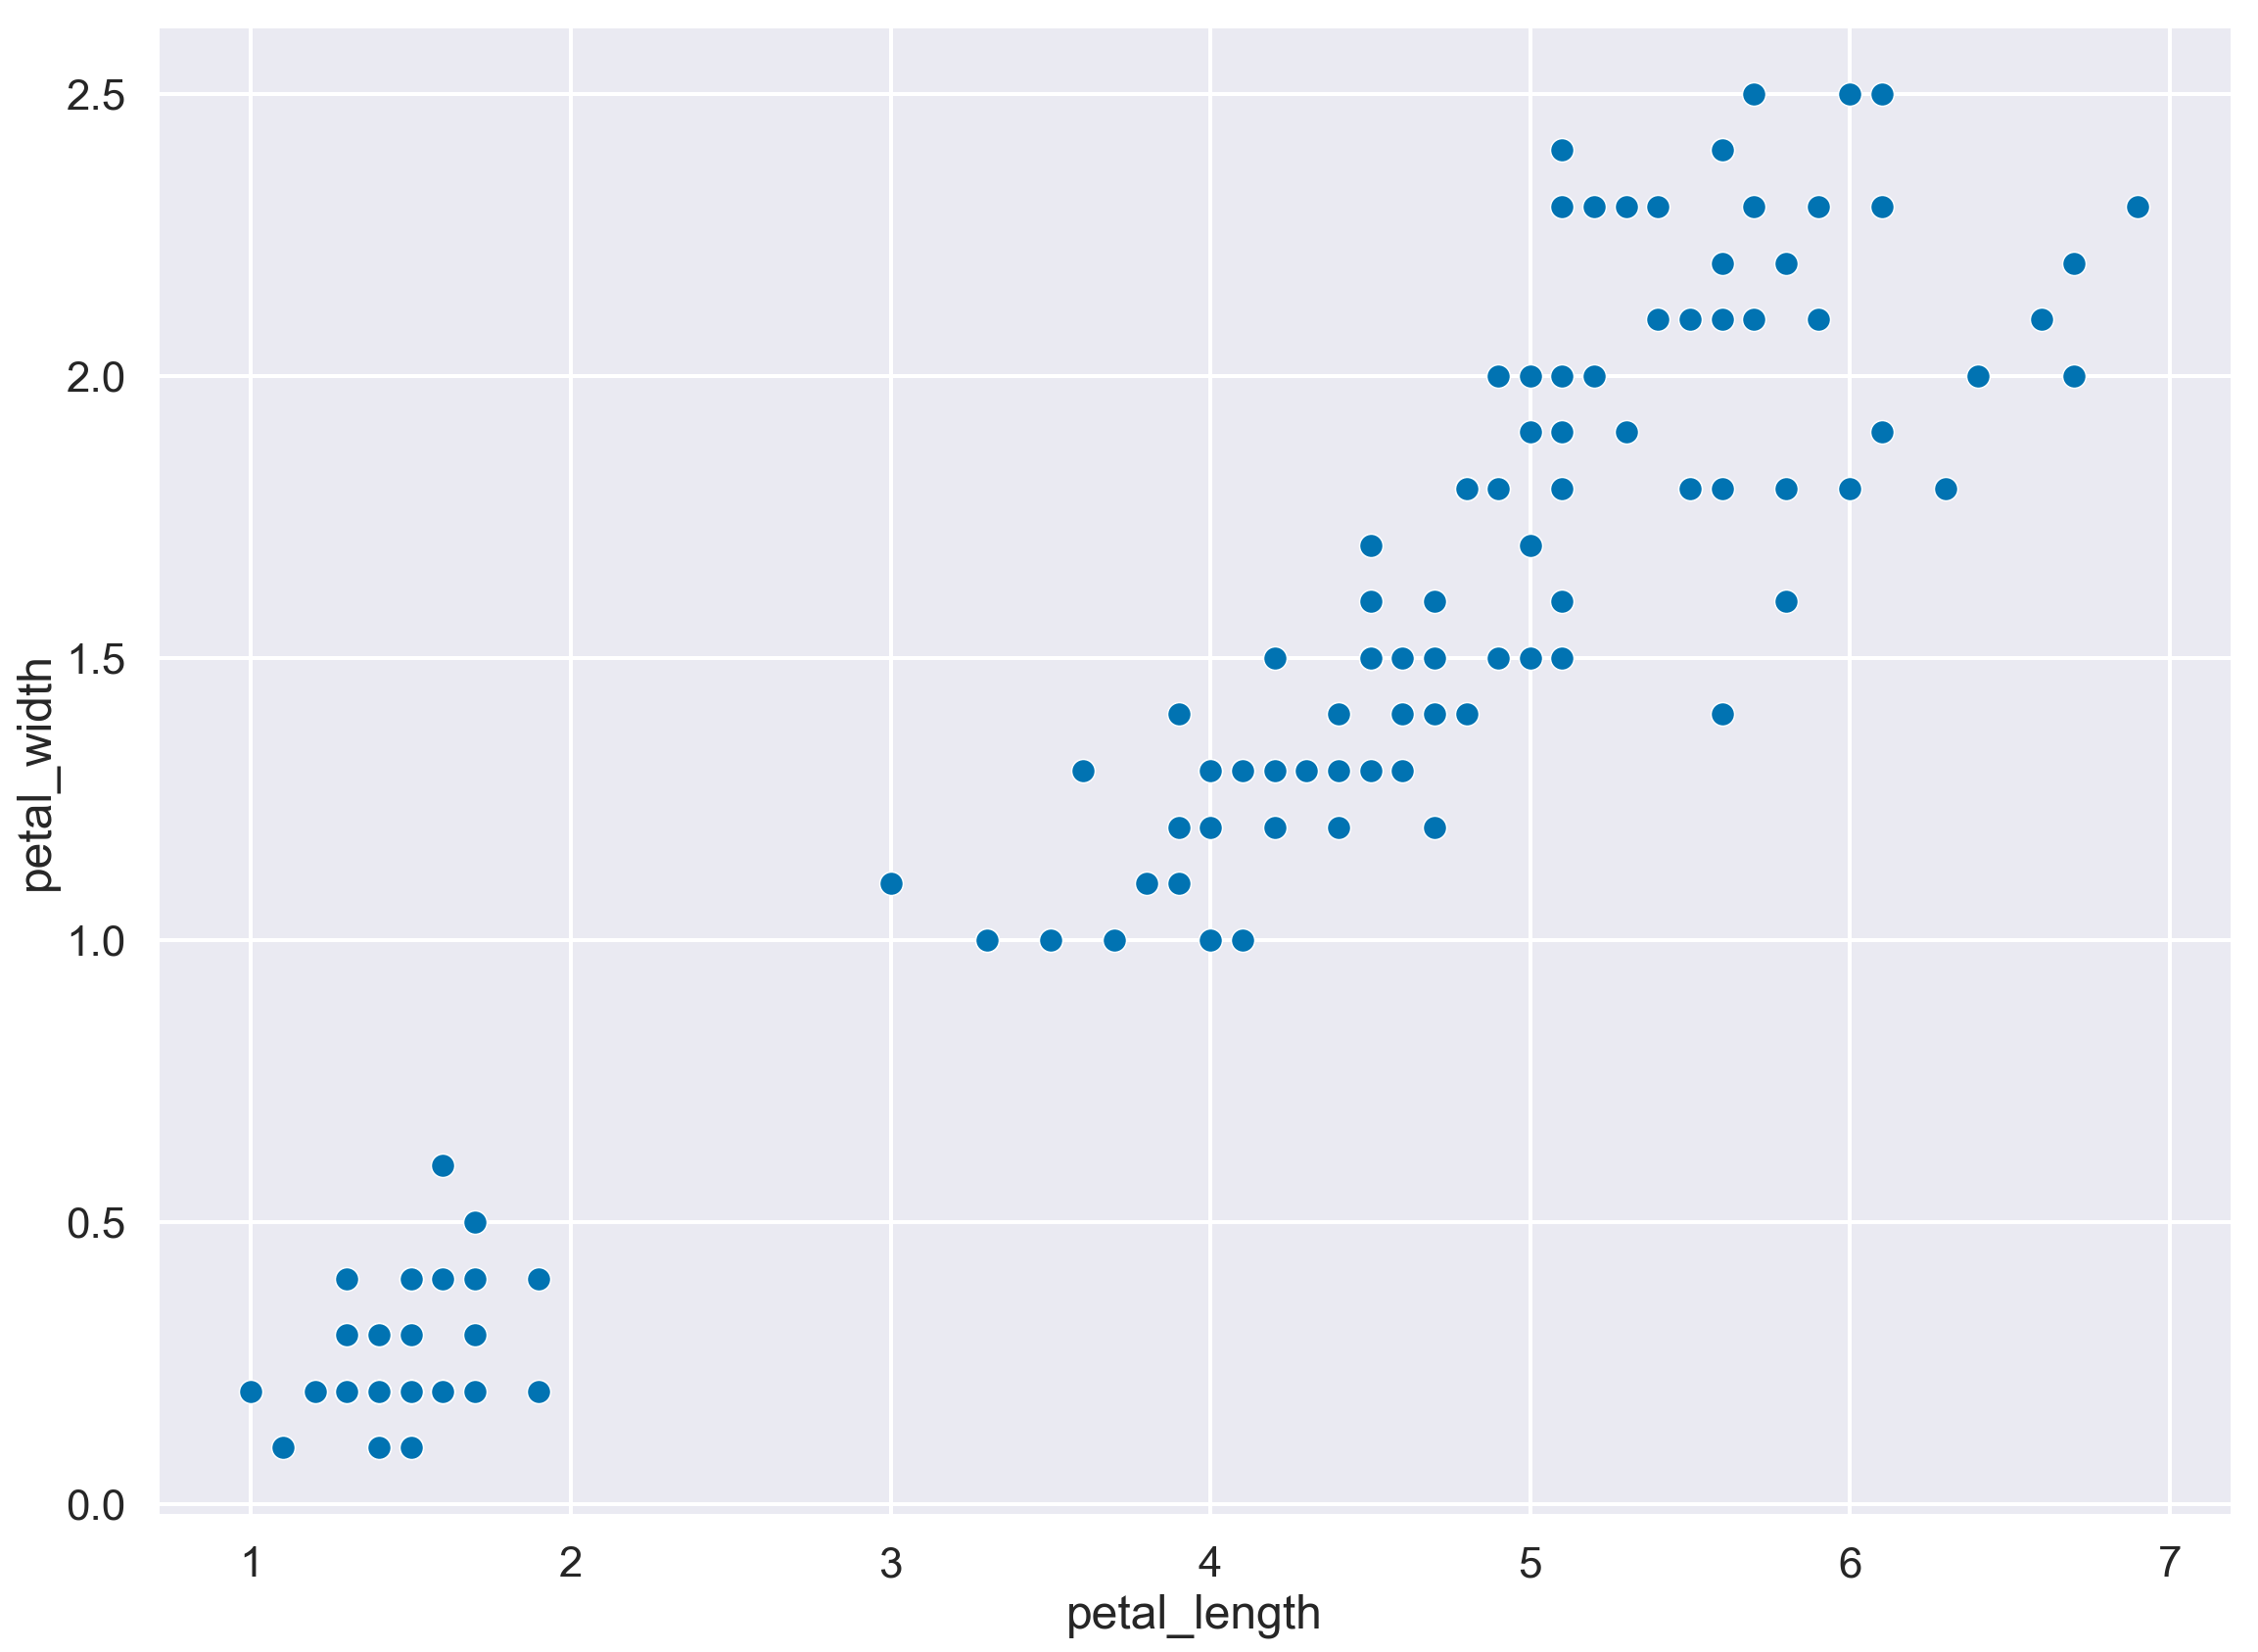

In [22]:
sns.scatterplot(iris['petal_length'], iris['petal_width'])

One simple conclusion that one could argue for looking at this is that there is a clear positive correlation. Let's see if we can unpack more information about the data.

Since this is labeled data, we can plot each label (aka class, outcome), in a different color:

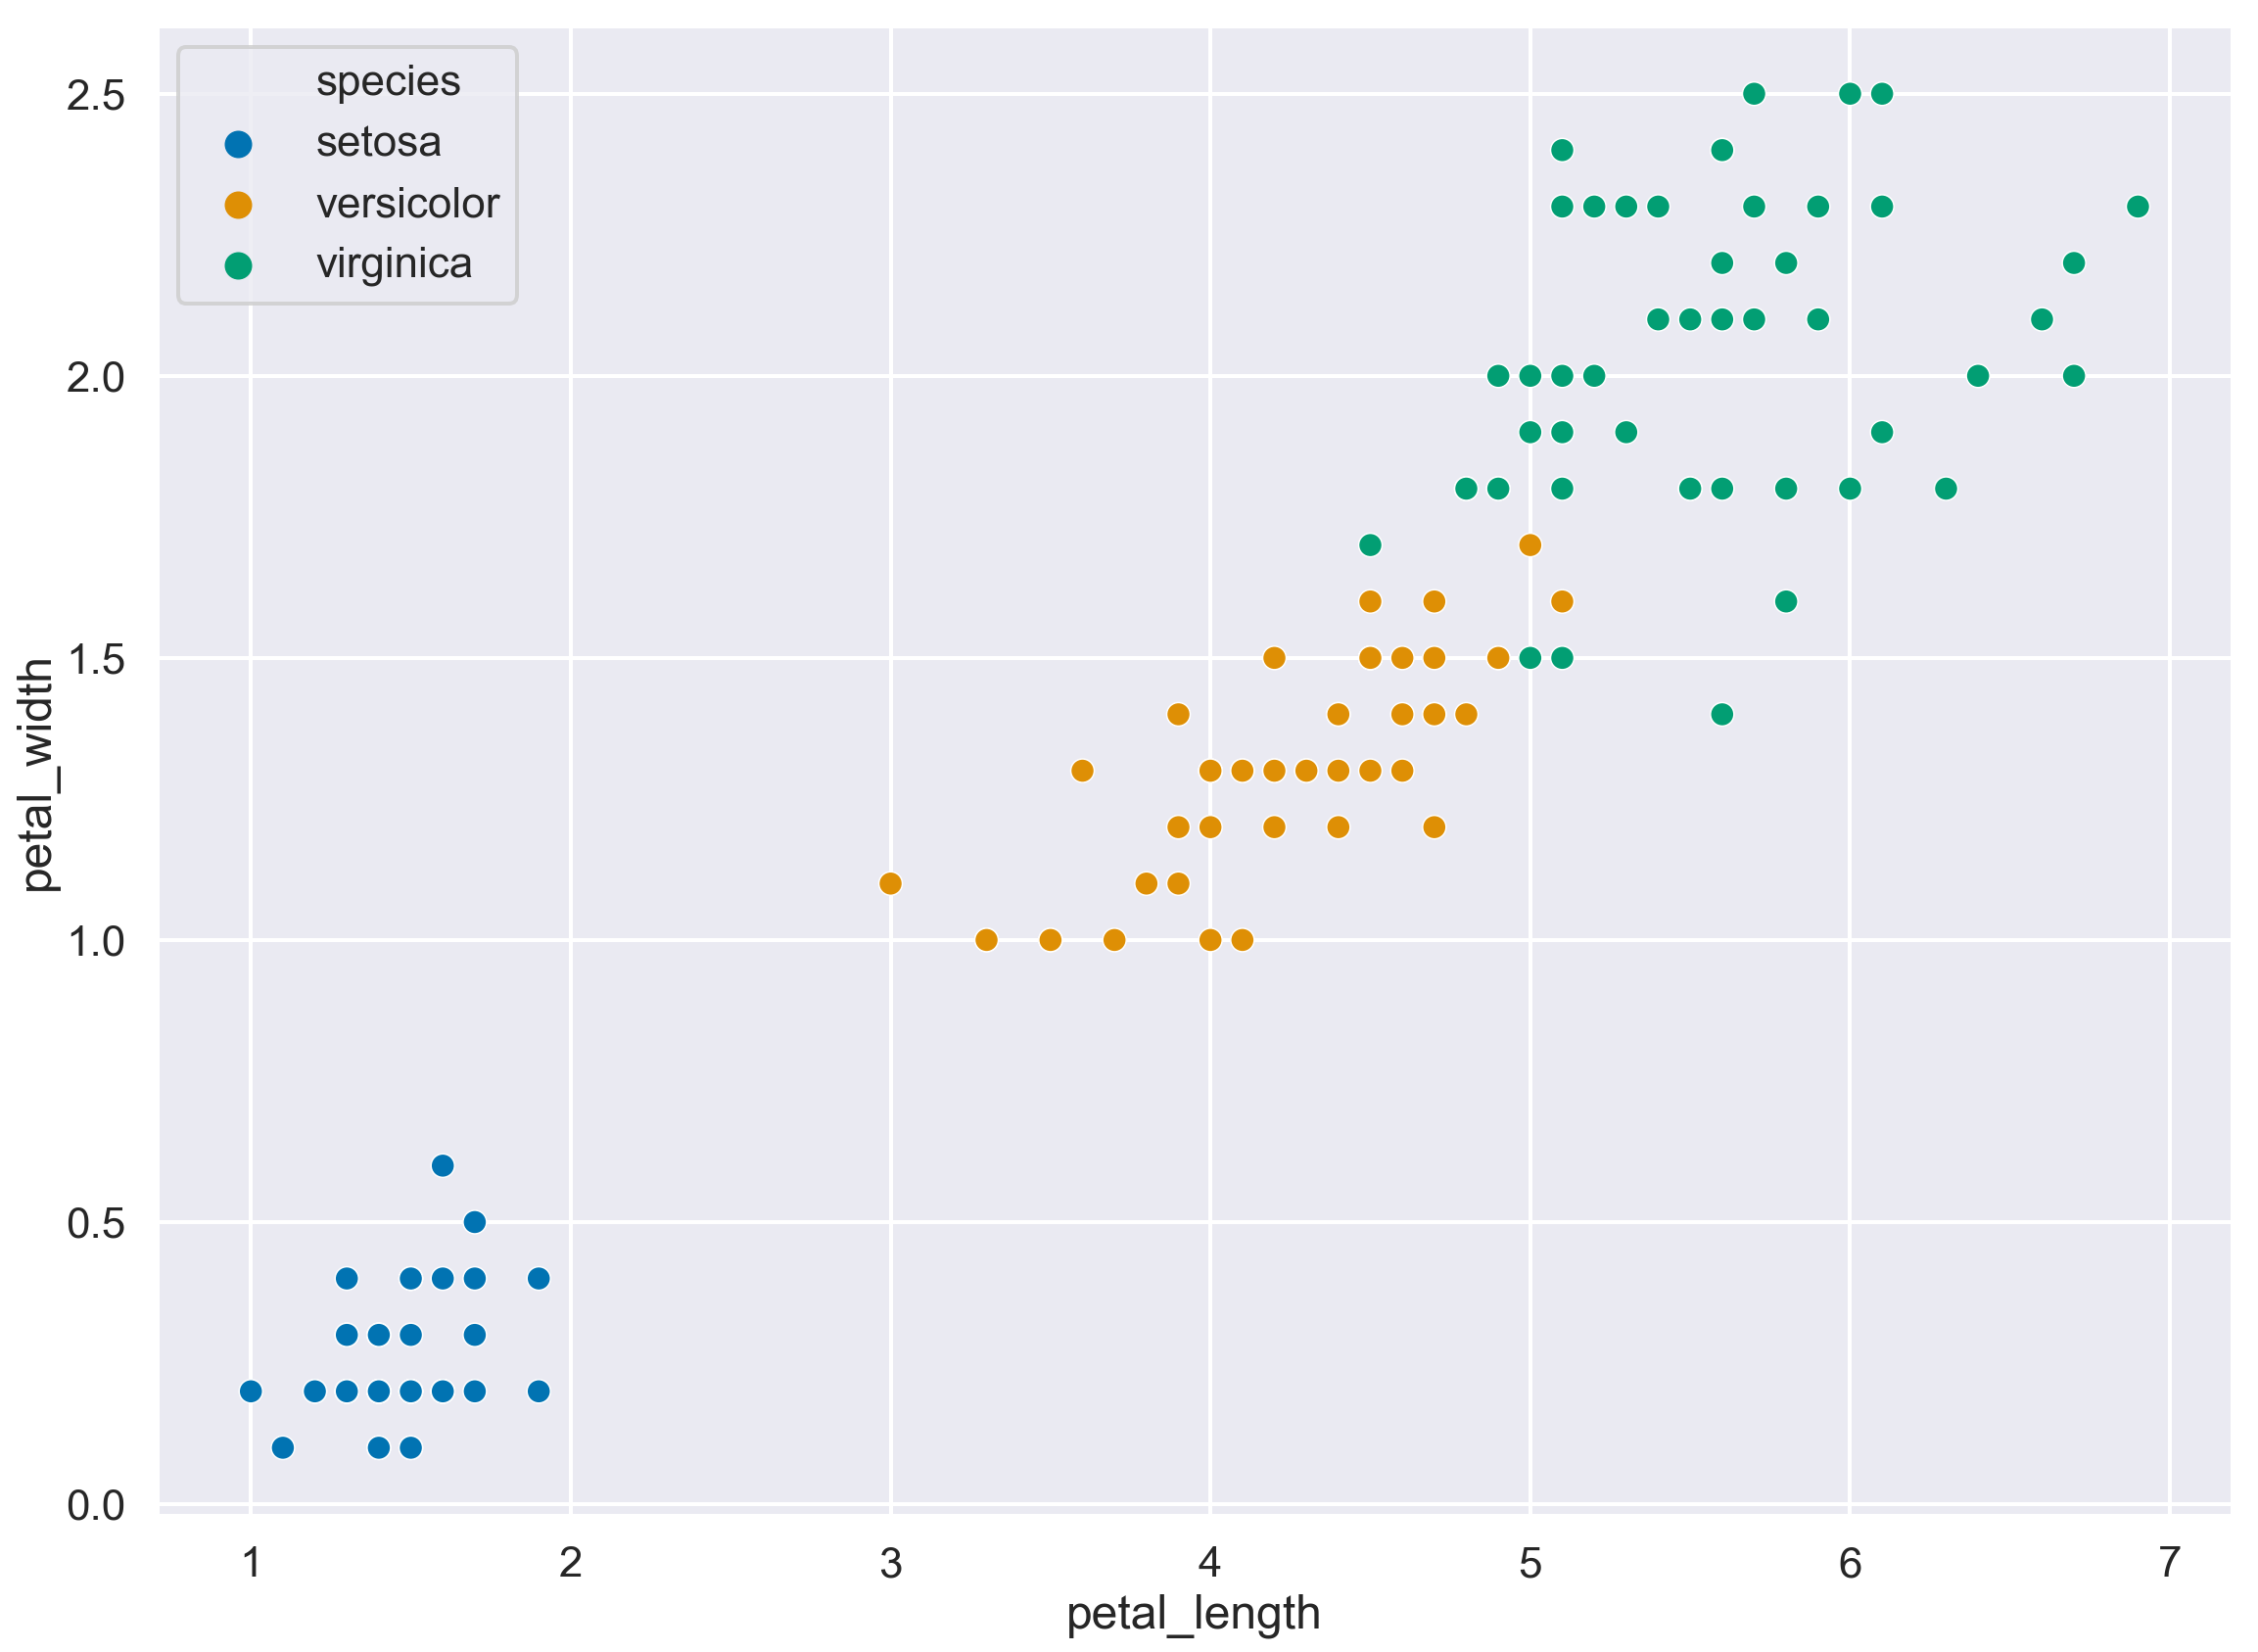

In [23]:
sns.scatterplot(iris['petal_length'], iris['petal_width'], hue=iris['species'])

This tells us more, e.g. the type of species generally has different petal lengths and widths. 

We can visualize a simple linear regression model to make predictions for each of the 3 different classes by running

In [ ]:
plt.plot(x, y, 'o')

In [ ]:
!pip install --upgrade seaborn
import seaborn as sns
sns.scatterplot

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


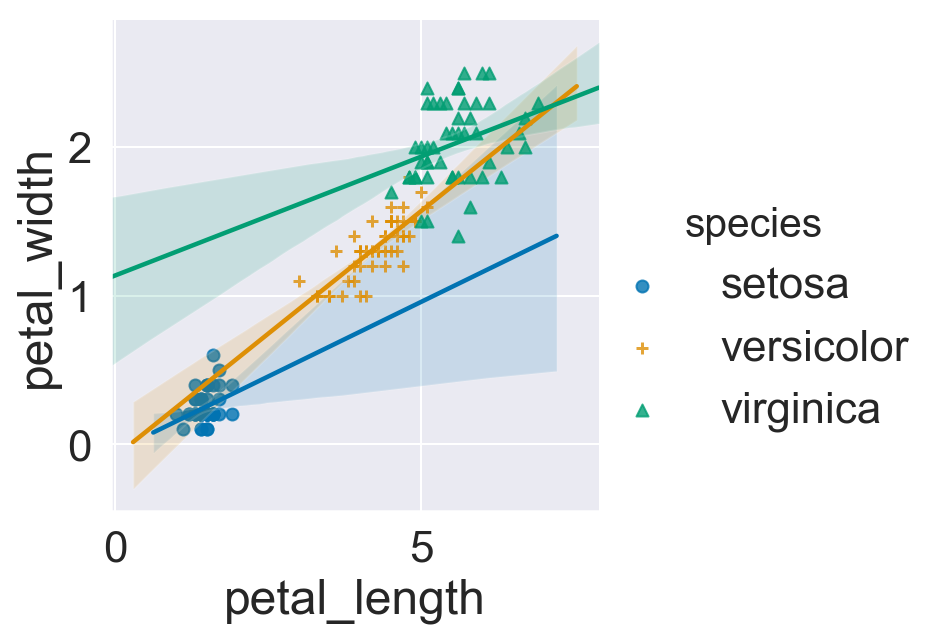

In [23]:
a = sns.lmplot('petal_length', 'petal_width', iris, hue='species', markers=['o','+','^'])

Let's look at a new dataset, this one, called anscombe, is composed of 4 distribution, each has the same summary statistics (same mean, same variance, etc.) but looks shockingly different.

In [25]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

We can again run a simple linear regression model, which seems to be representative of the data:

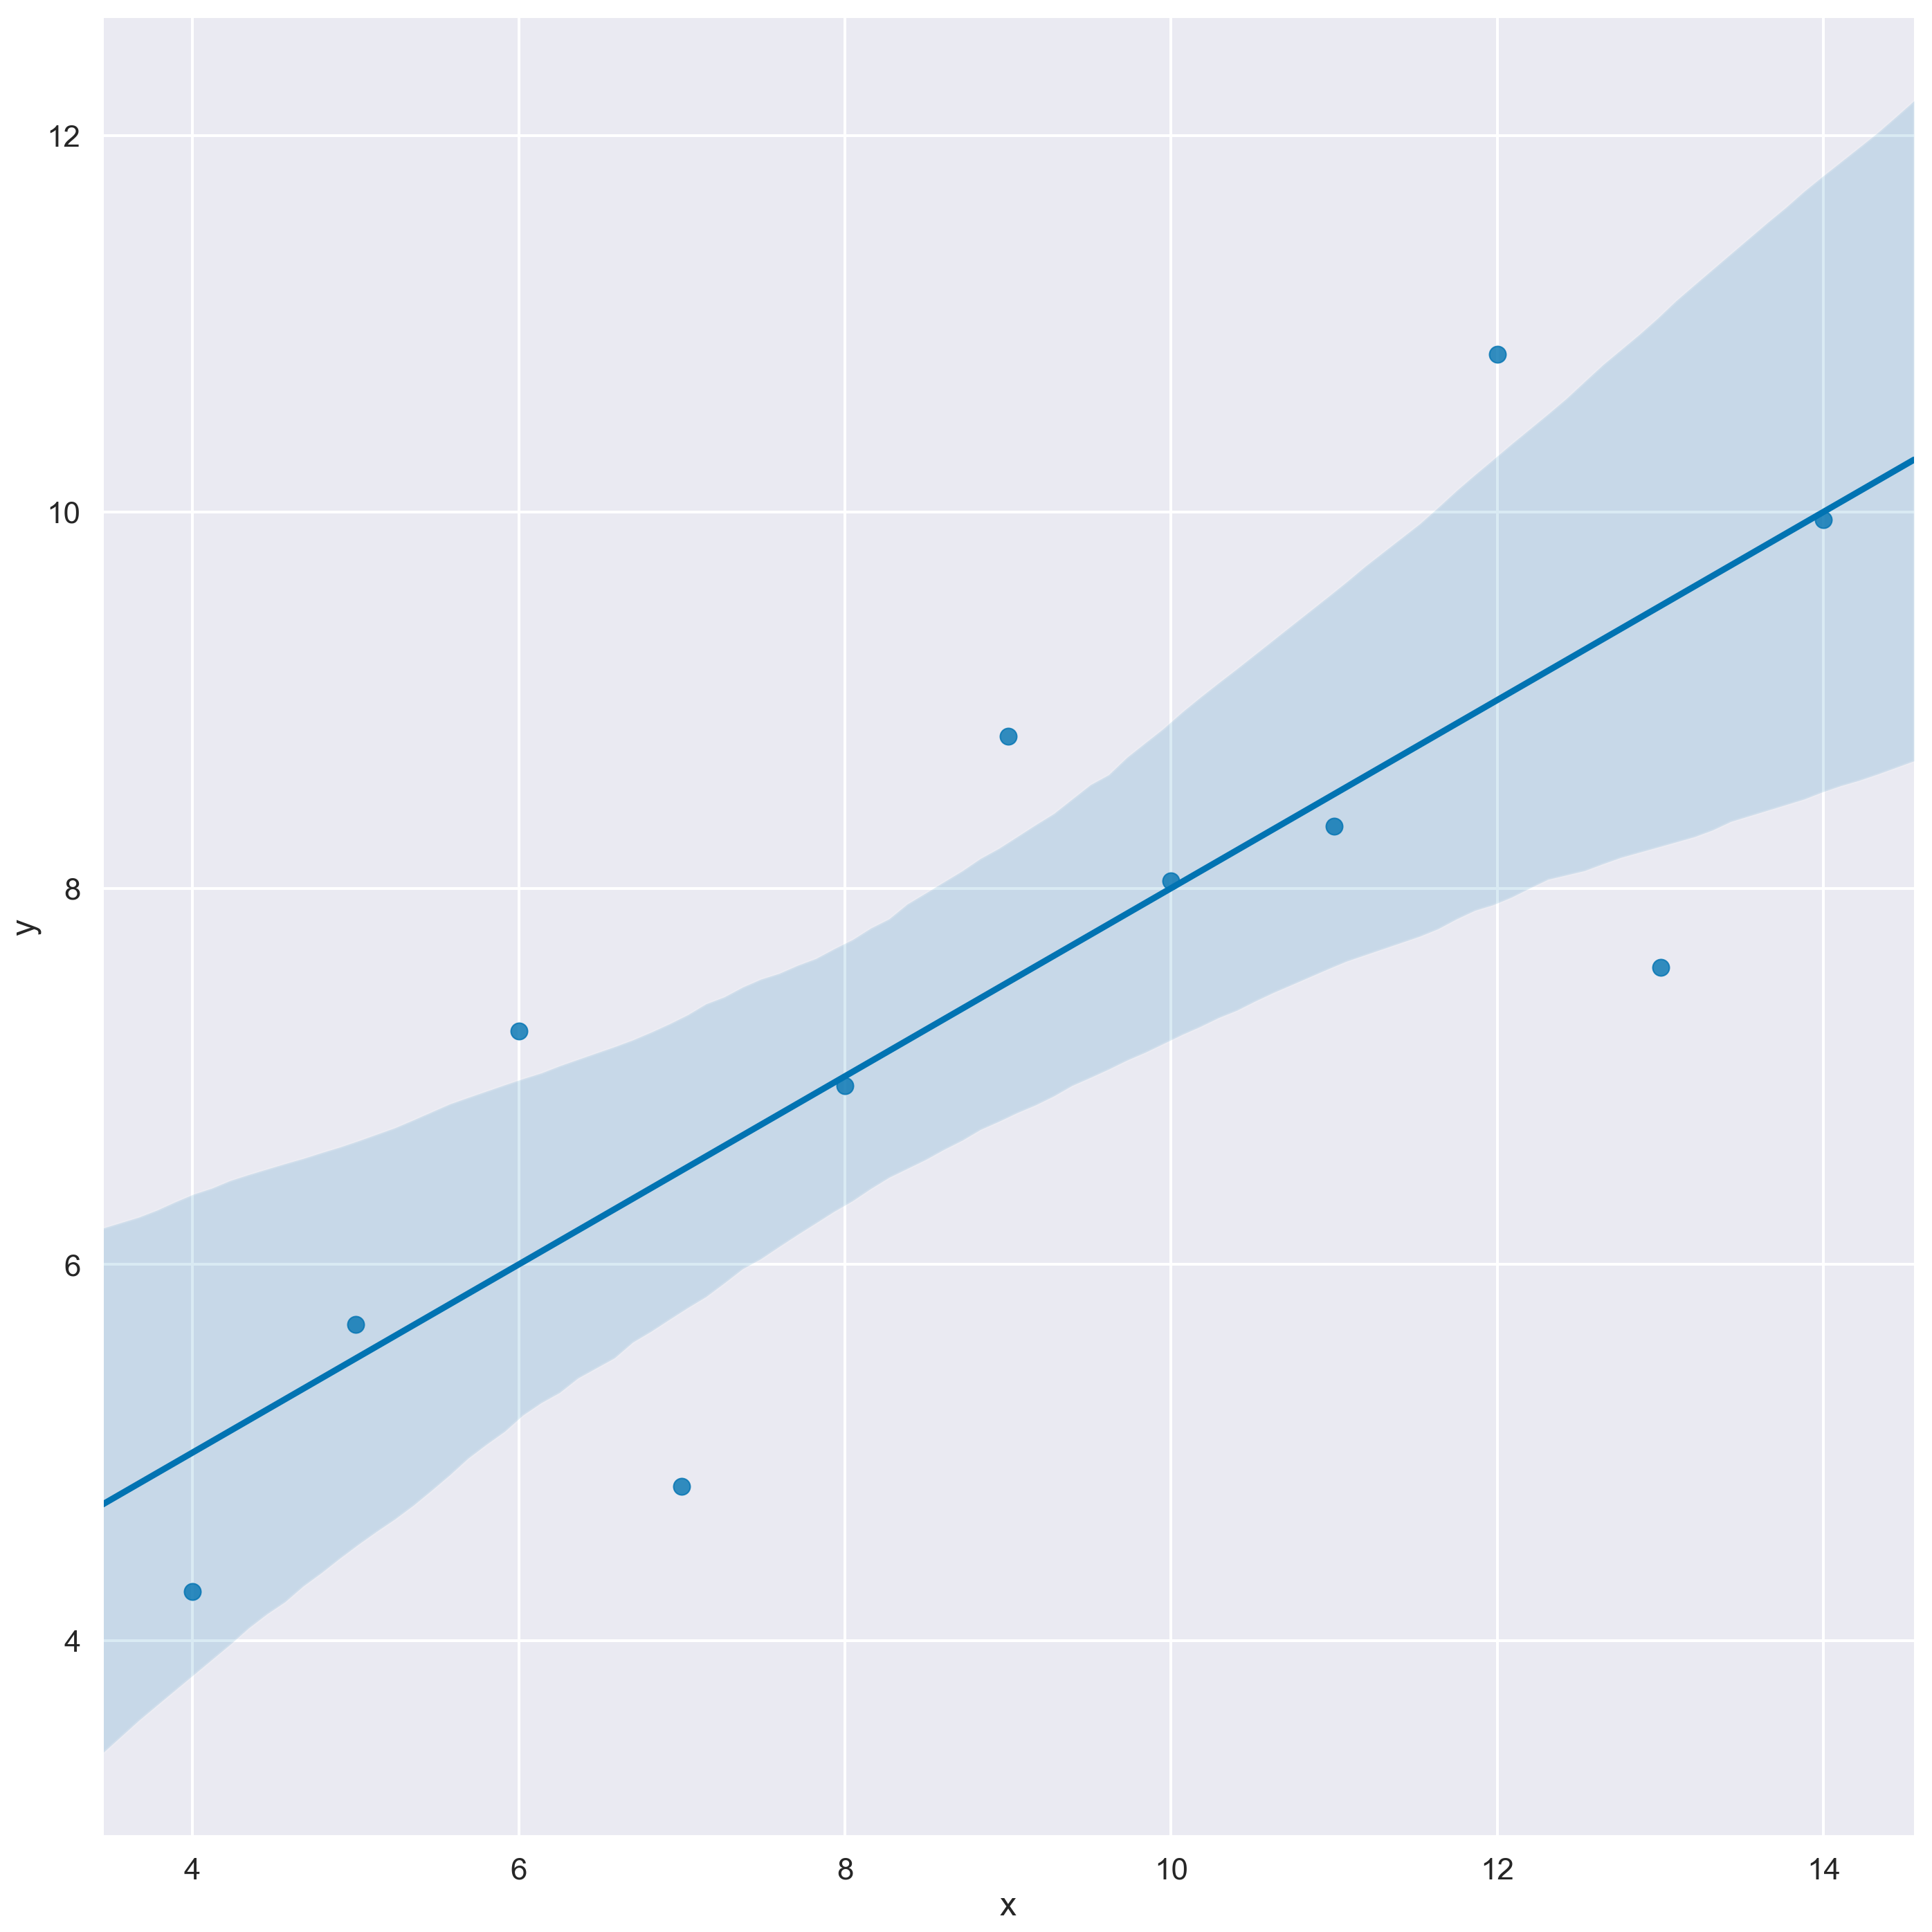

In [26]:
sns.lmplot('x', 'y', anscombe[anscombe['dataset']=='I'], height=20)

We can use `sns.residplot` to look at the residuals from this linear regression model, this makes is clear to see whether our model is biased, and how big the variance of it is.

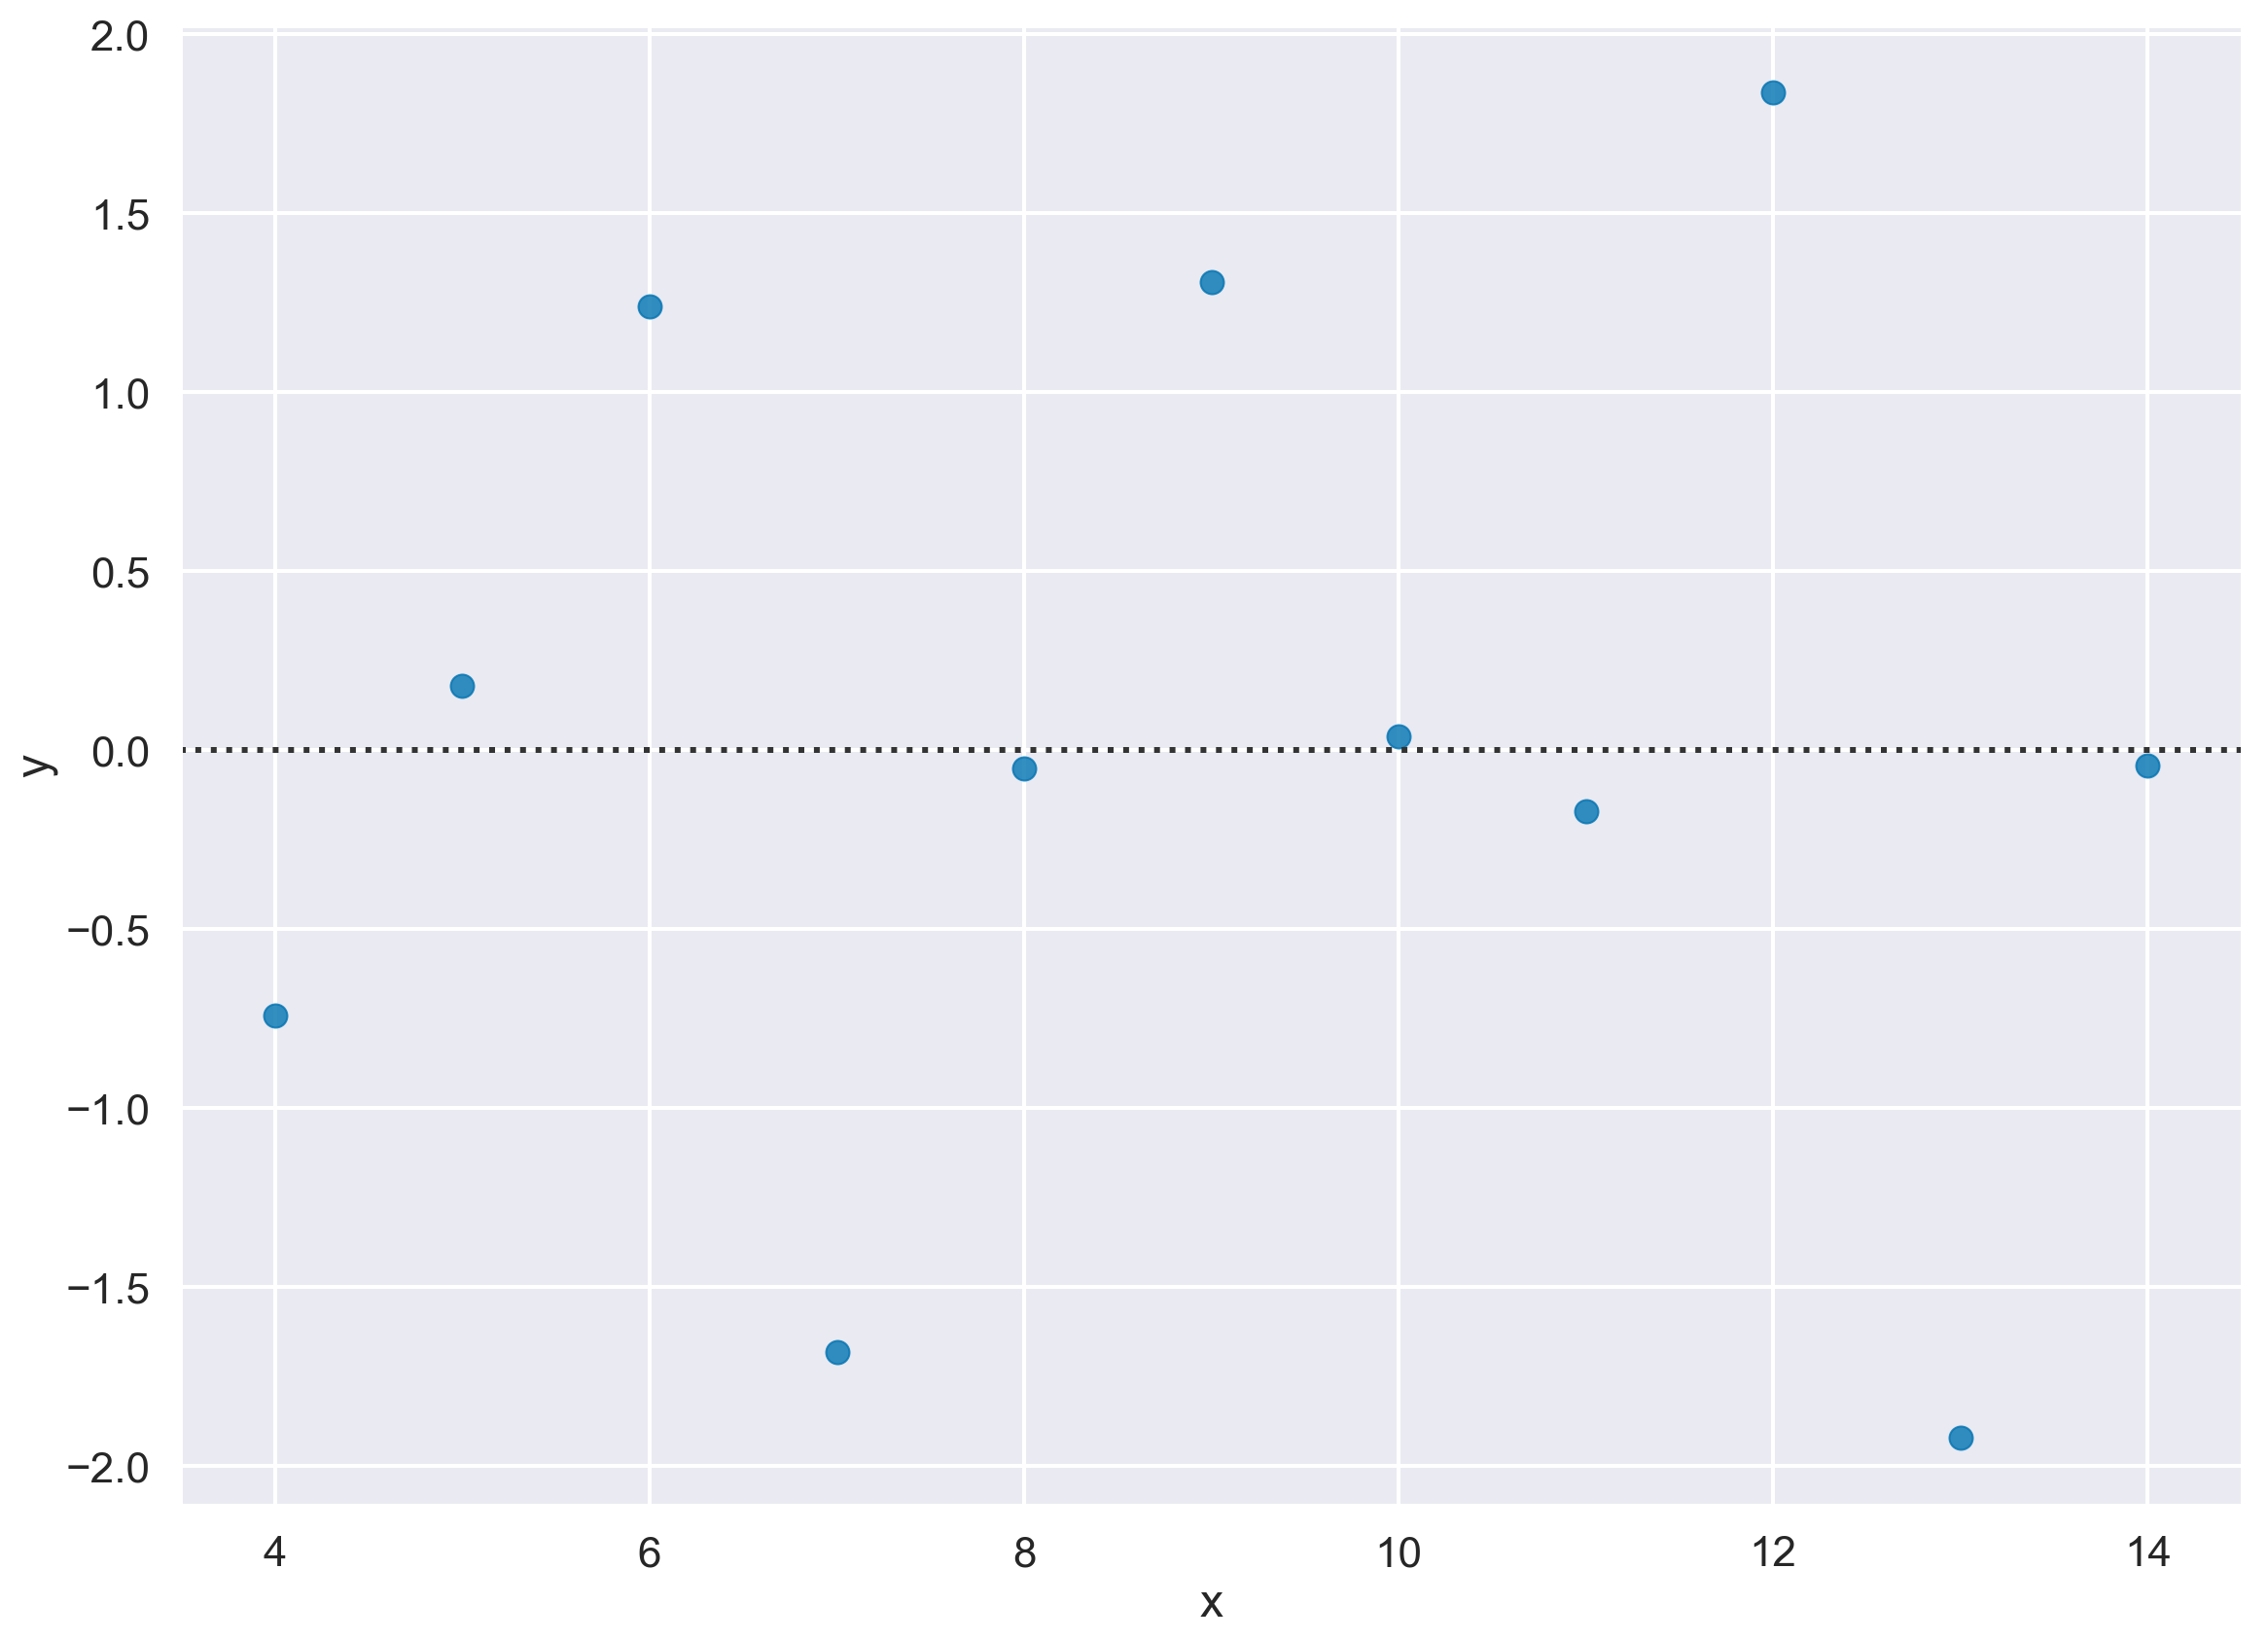

In [27]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"));


Now let's look at the second distribution:

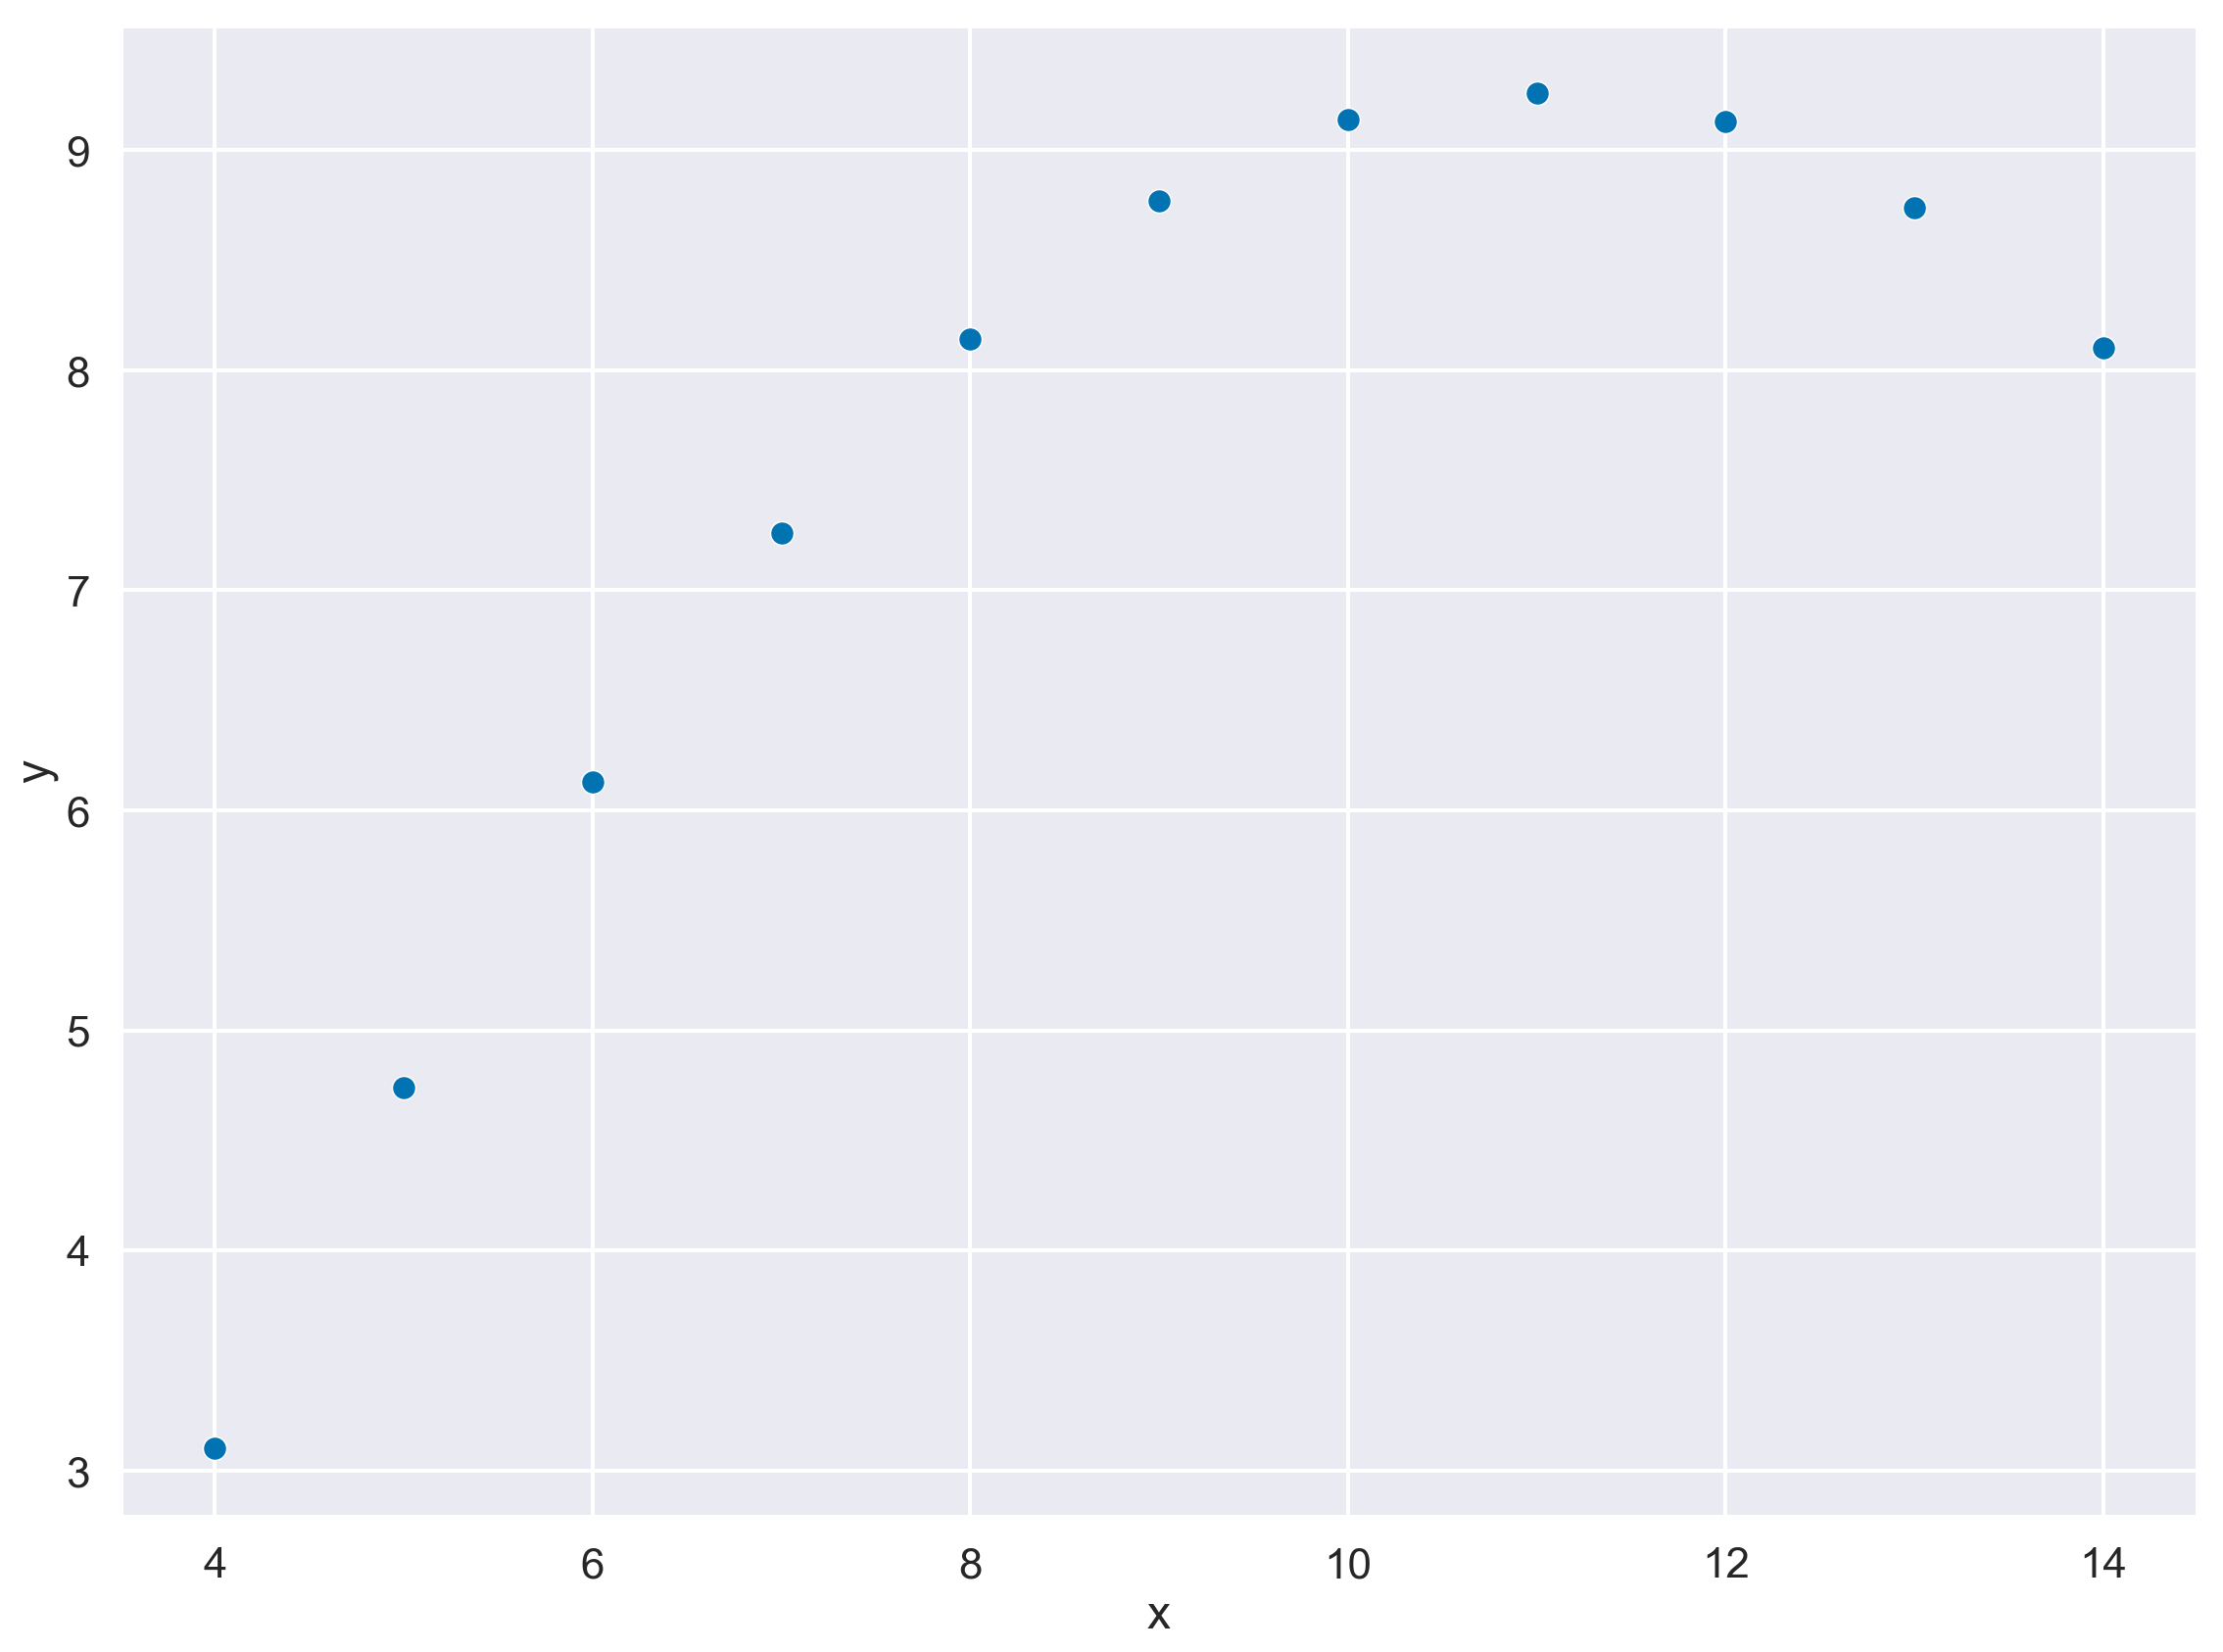

In [30]:
sns.scatterplot(anscombe[anscombe['dataset']=='II']['x'], anscombe[anscombe['dataset']=='II']['y'])

This is clearly not linear, but rather looks like a second order polynomial, we can visualize a second order fit by running:

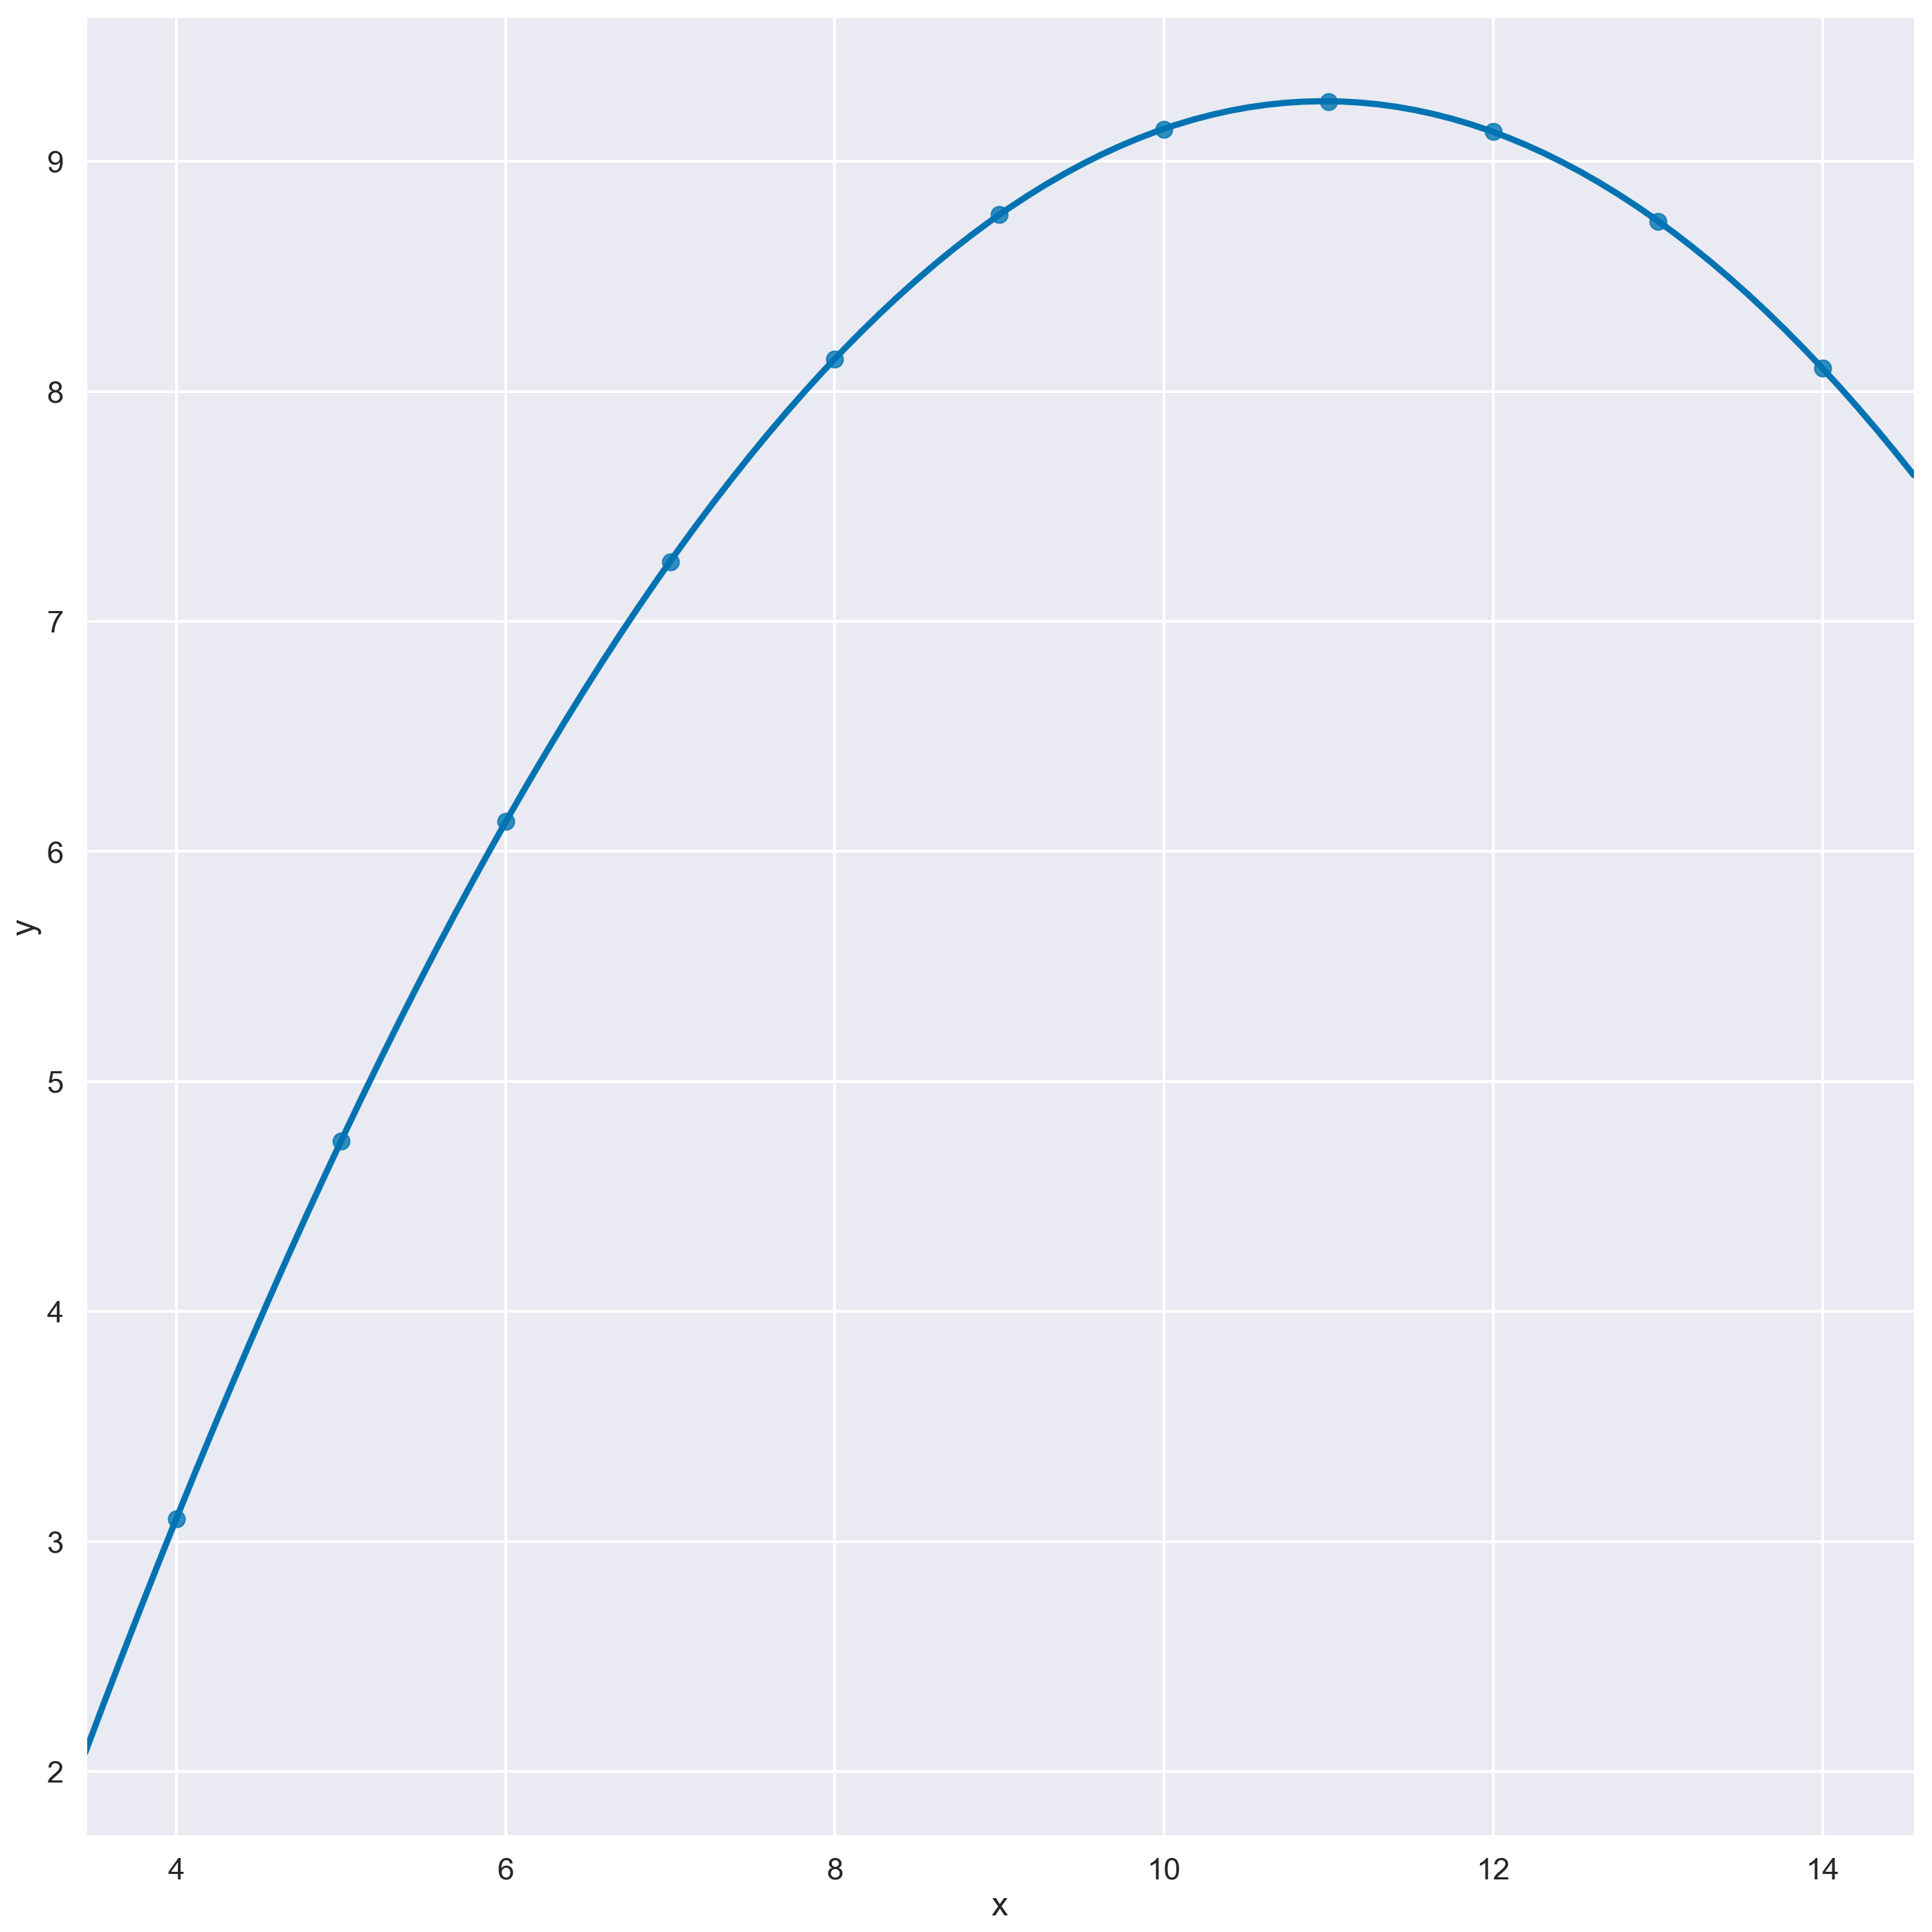

In [31]:
sns.lmplot('x', 'y', anscombe[anscombe['dataset']=='II'], height=20, order=2)

which looks perfectly representative of the data

Now the third distribution, which has one extreme outlier and is otherwise linear:

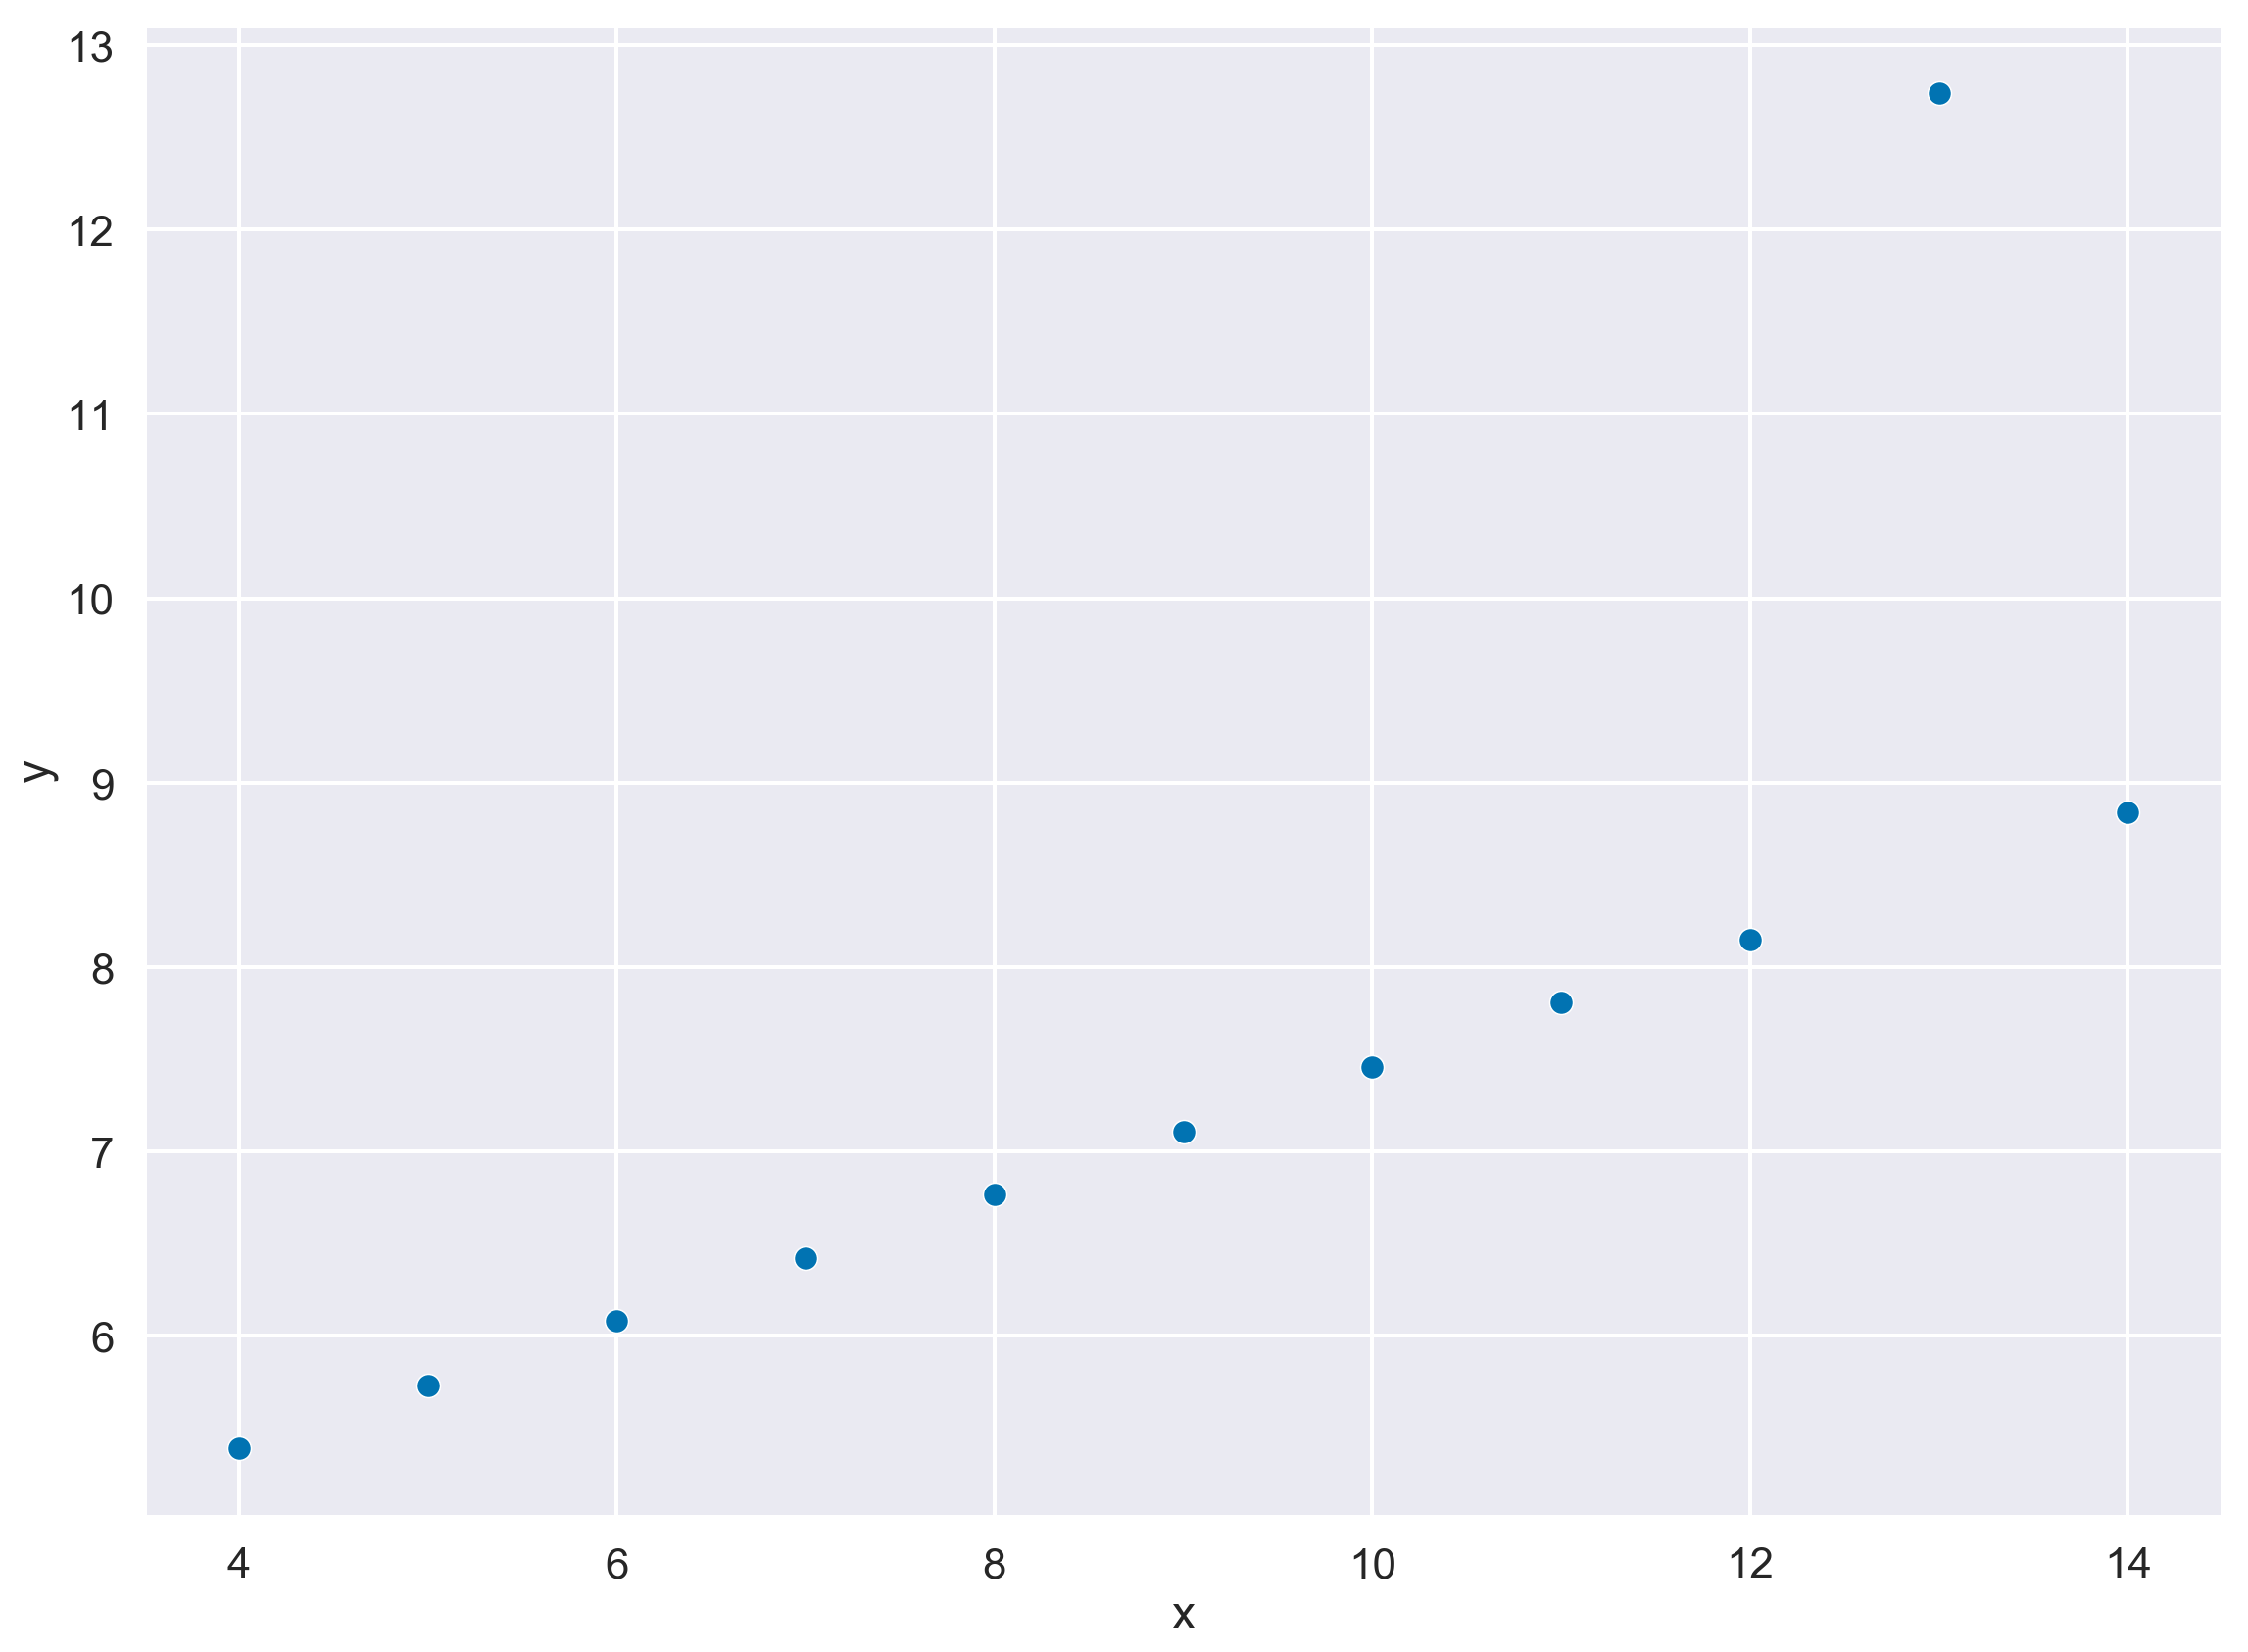

In [33]:
sns.scatterplot(anscombe[anscombe['dataset']=='III']['x'], anscombe[anscombe['dataset']=='III']['y'])

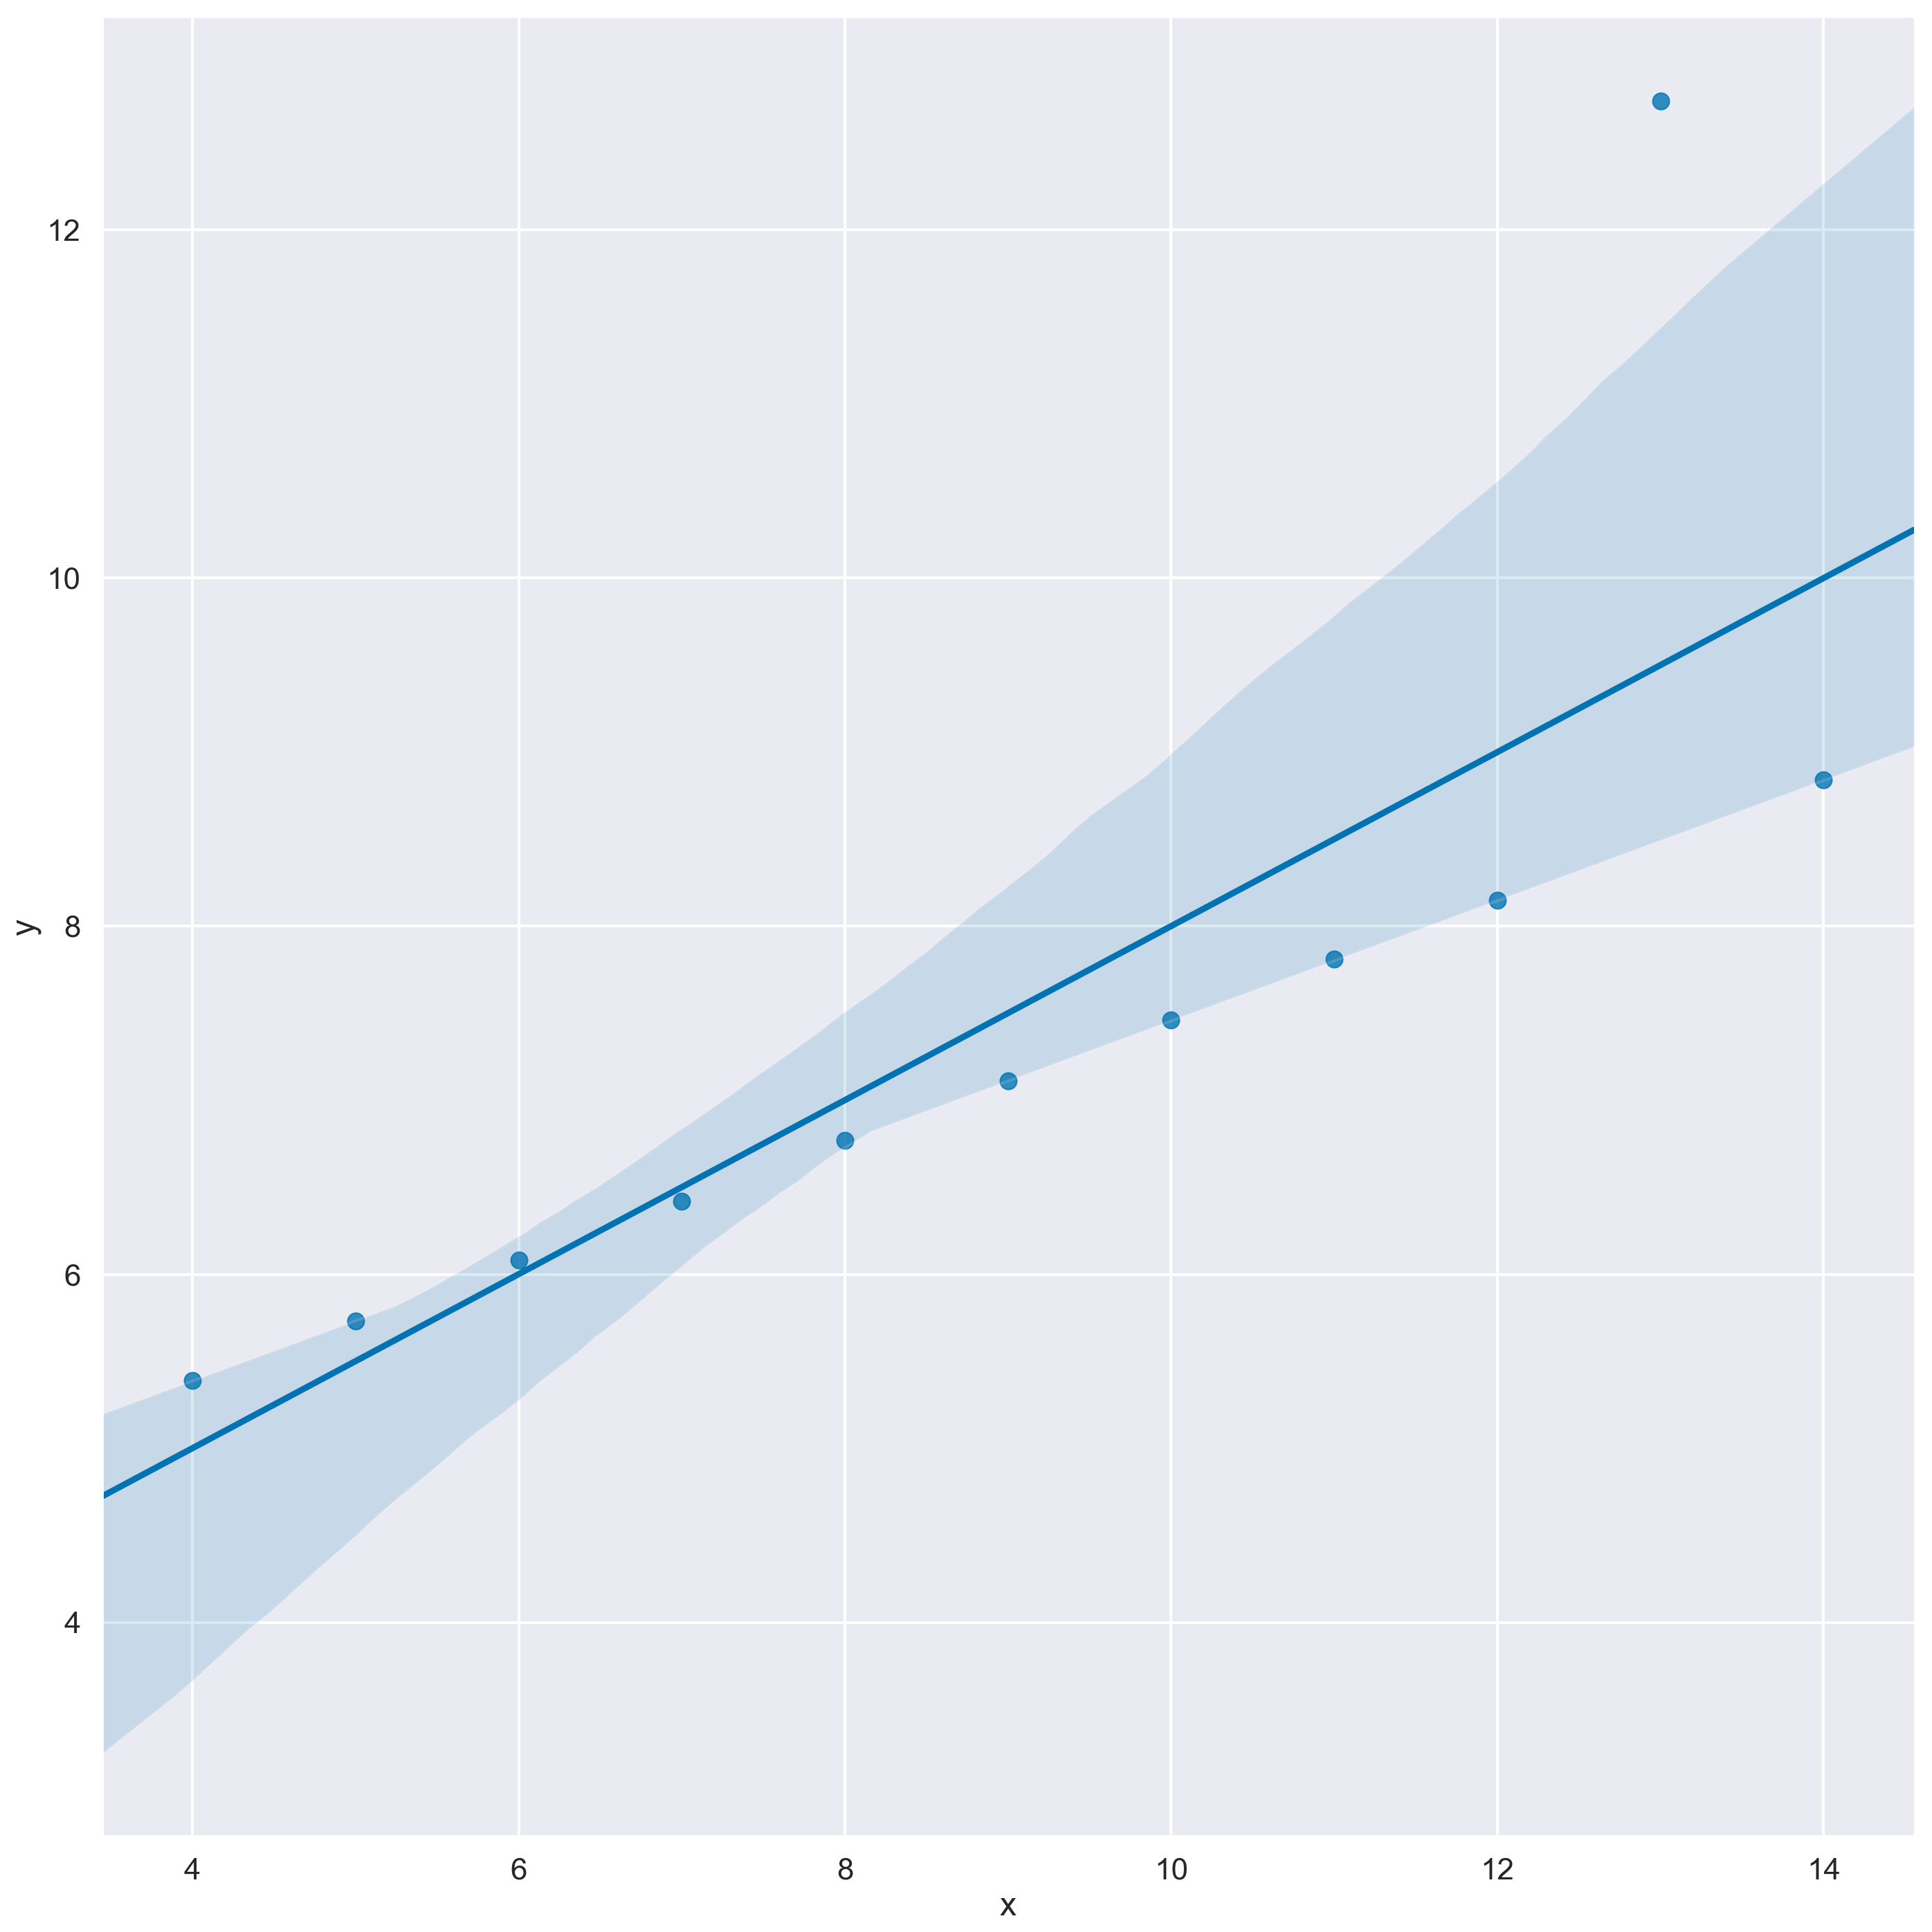

In [32]:
sns.lmplot('x', 'y', anscombe[anscombe['dataset']=='III'], height=20)

This linear fit is heavily influenced by the outlier, seaborn provides functionality to run a robust fit, that is less sensitive to outliers:

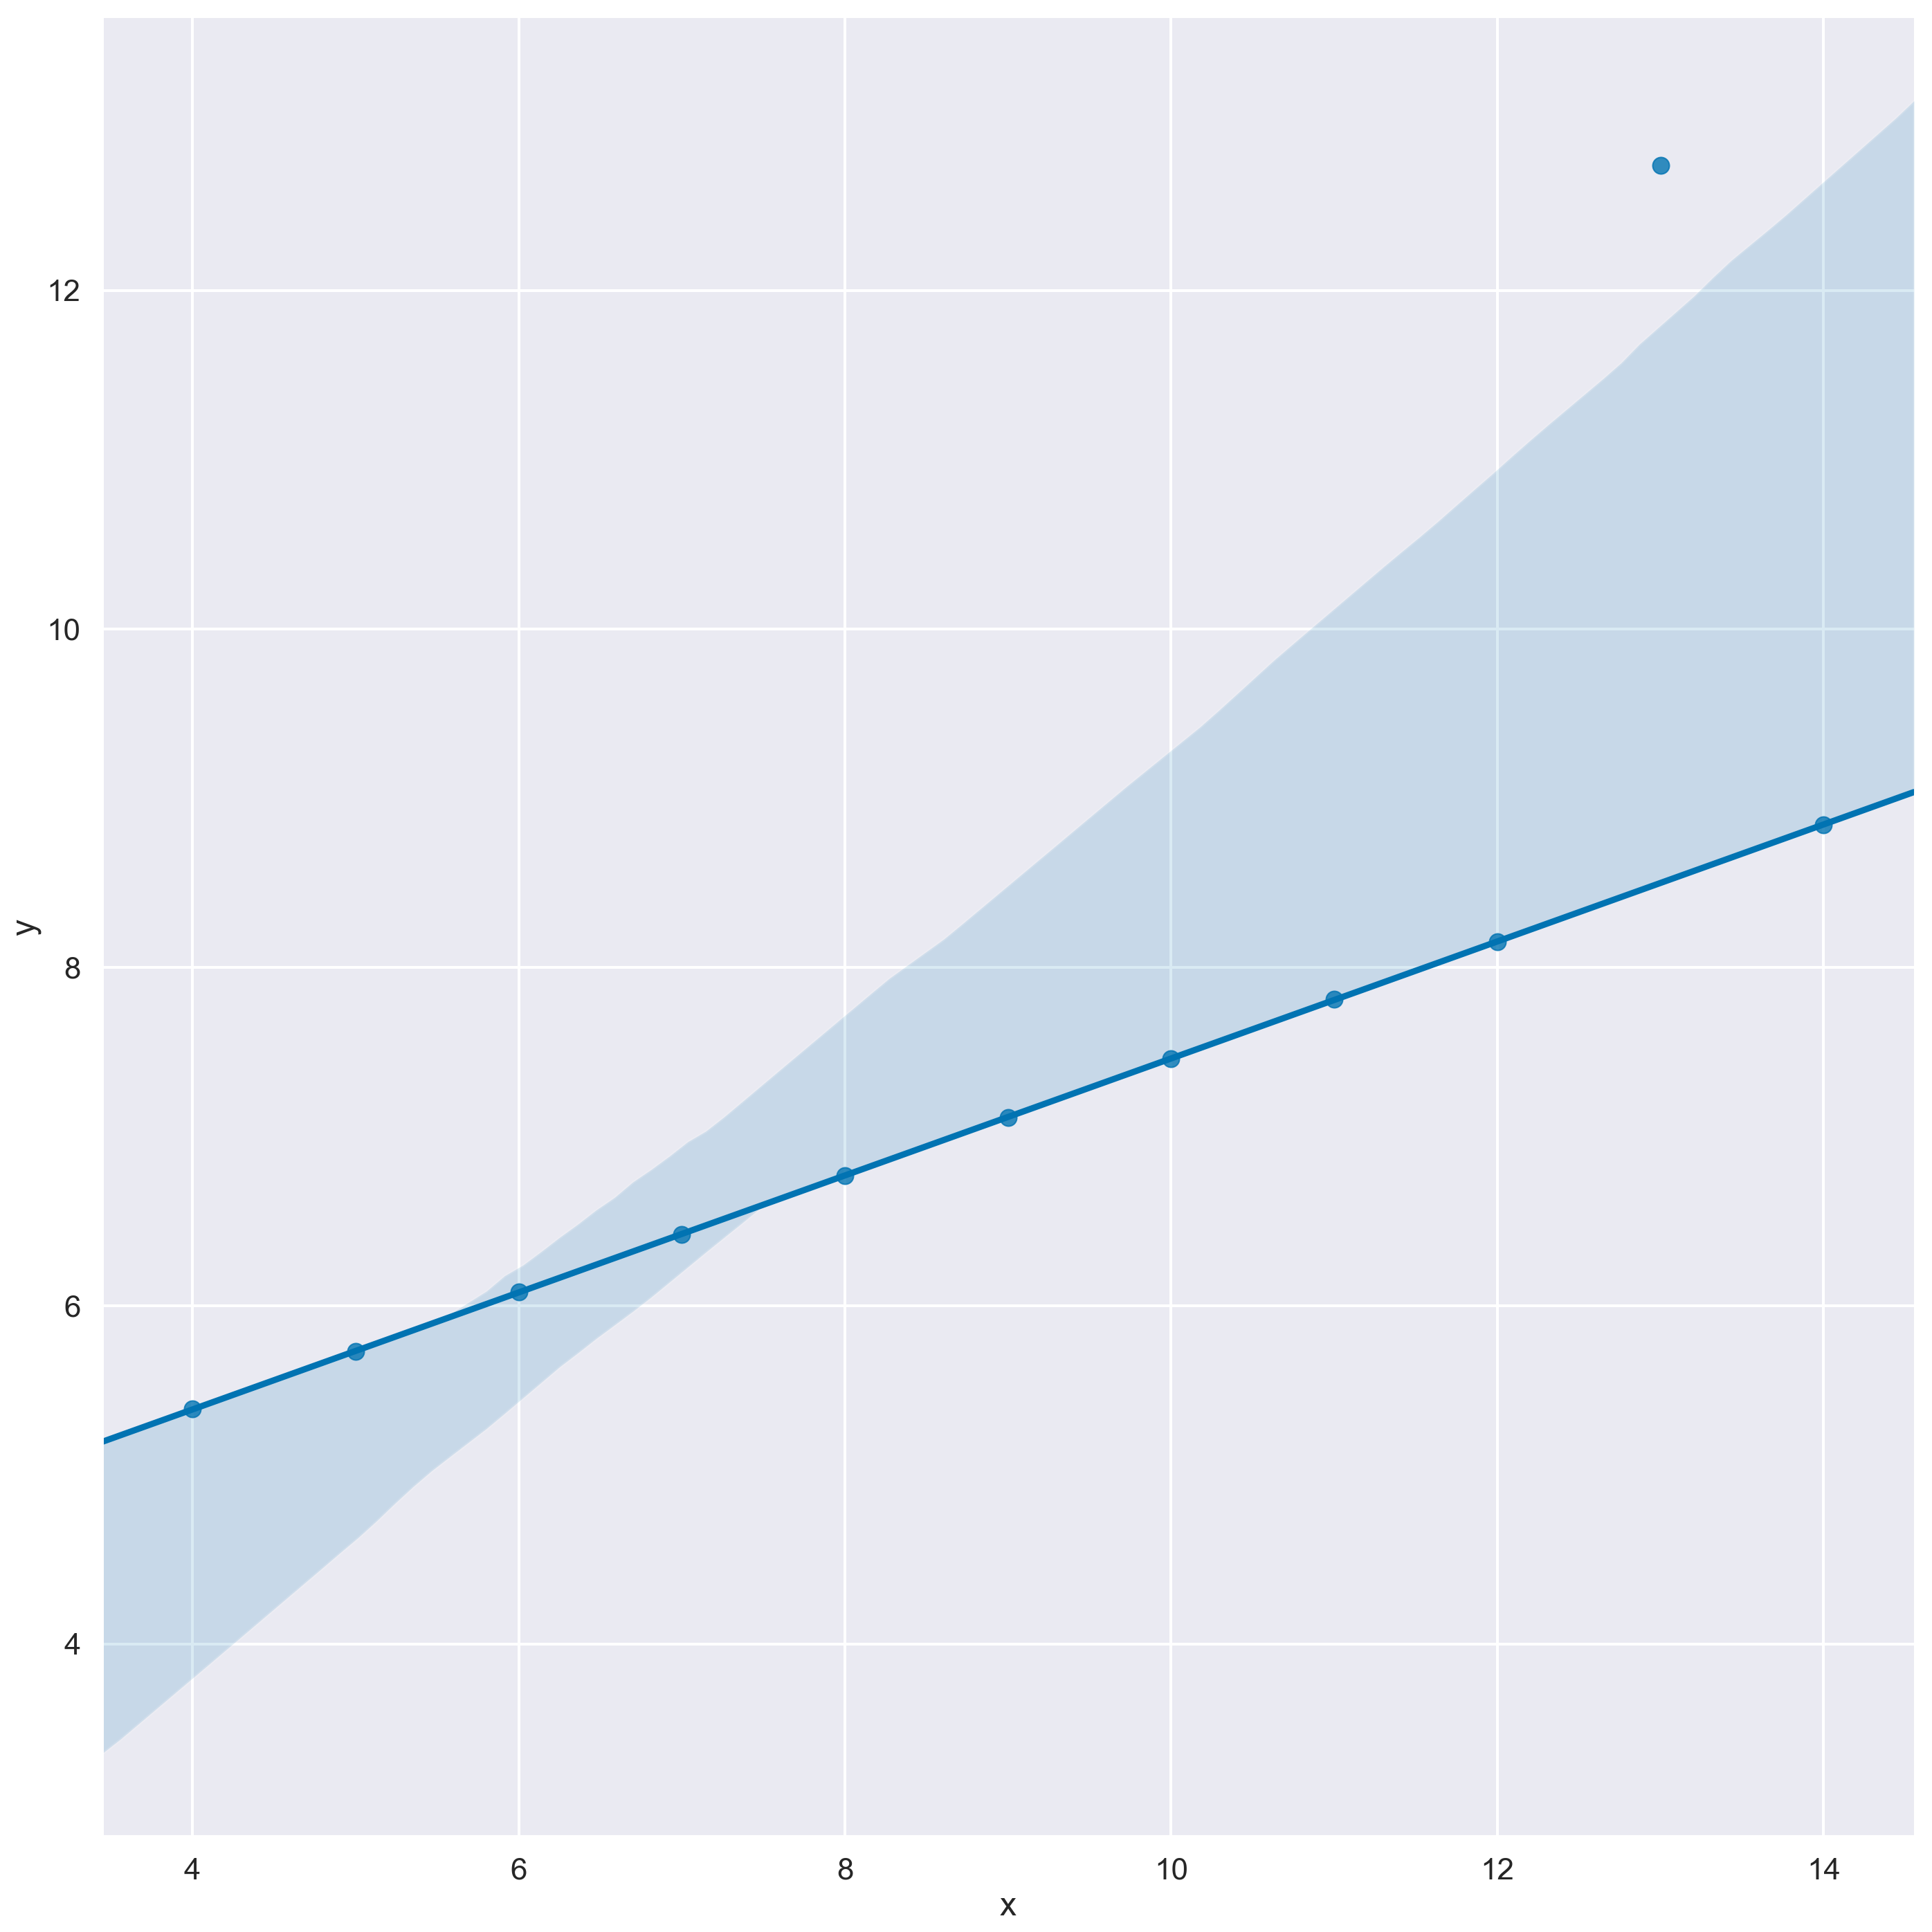

In [34]:
sns.lmplot('x', 'y', anscombe[anscombe['dataset']=='III'], height=20, robust=True)

Back to `iris`, there are simple seaborn functions that make automatic KDEs and in high dimensions:

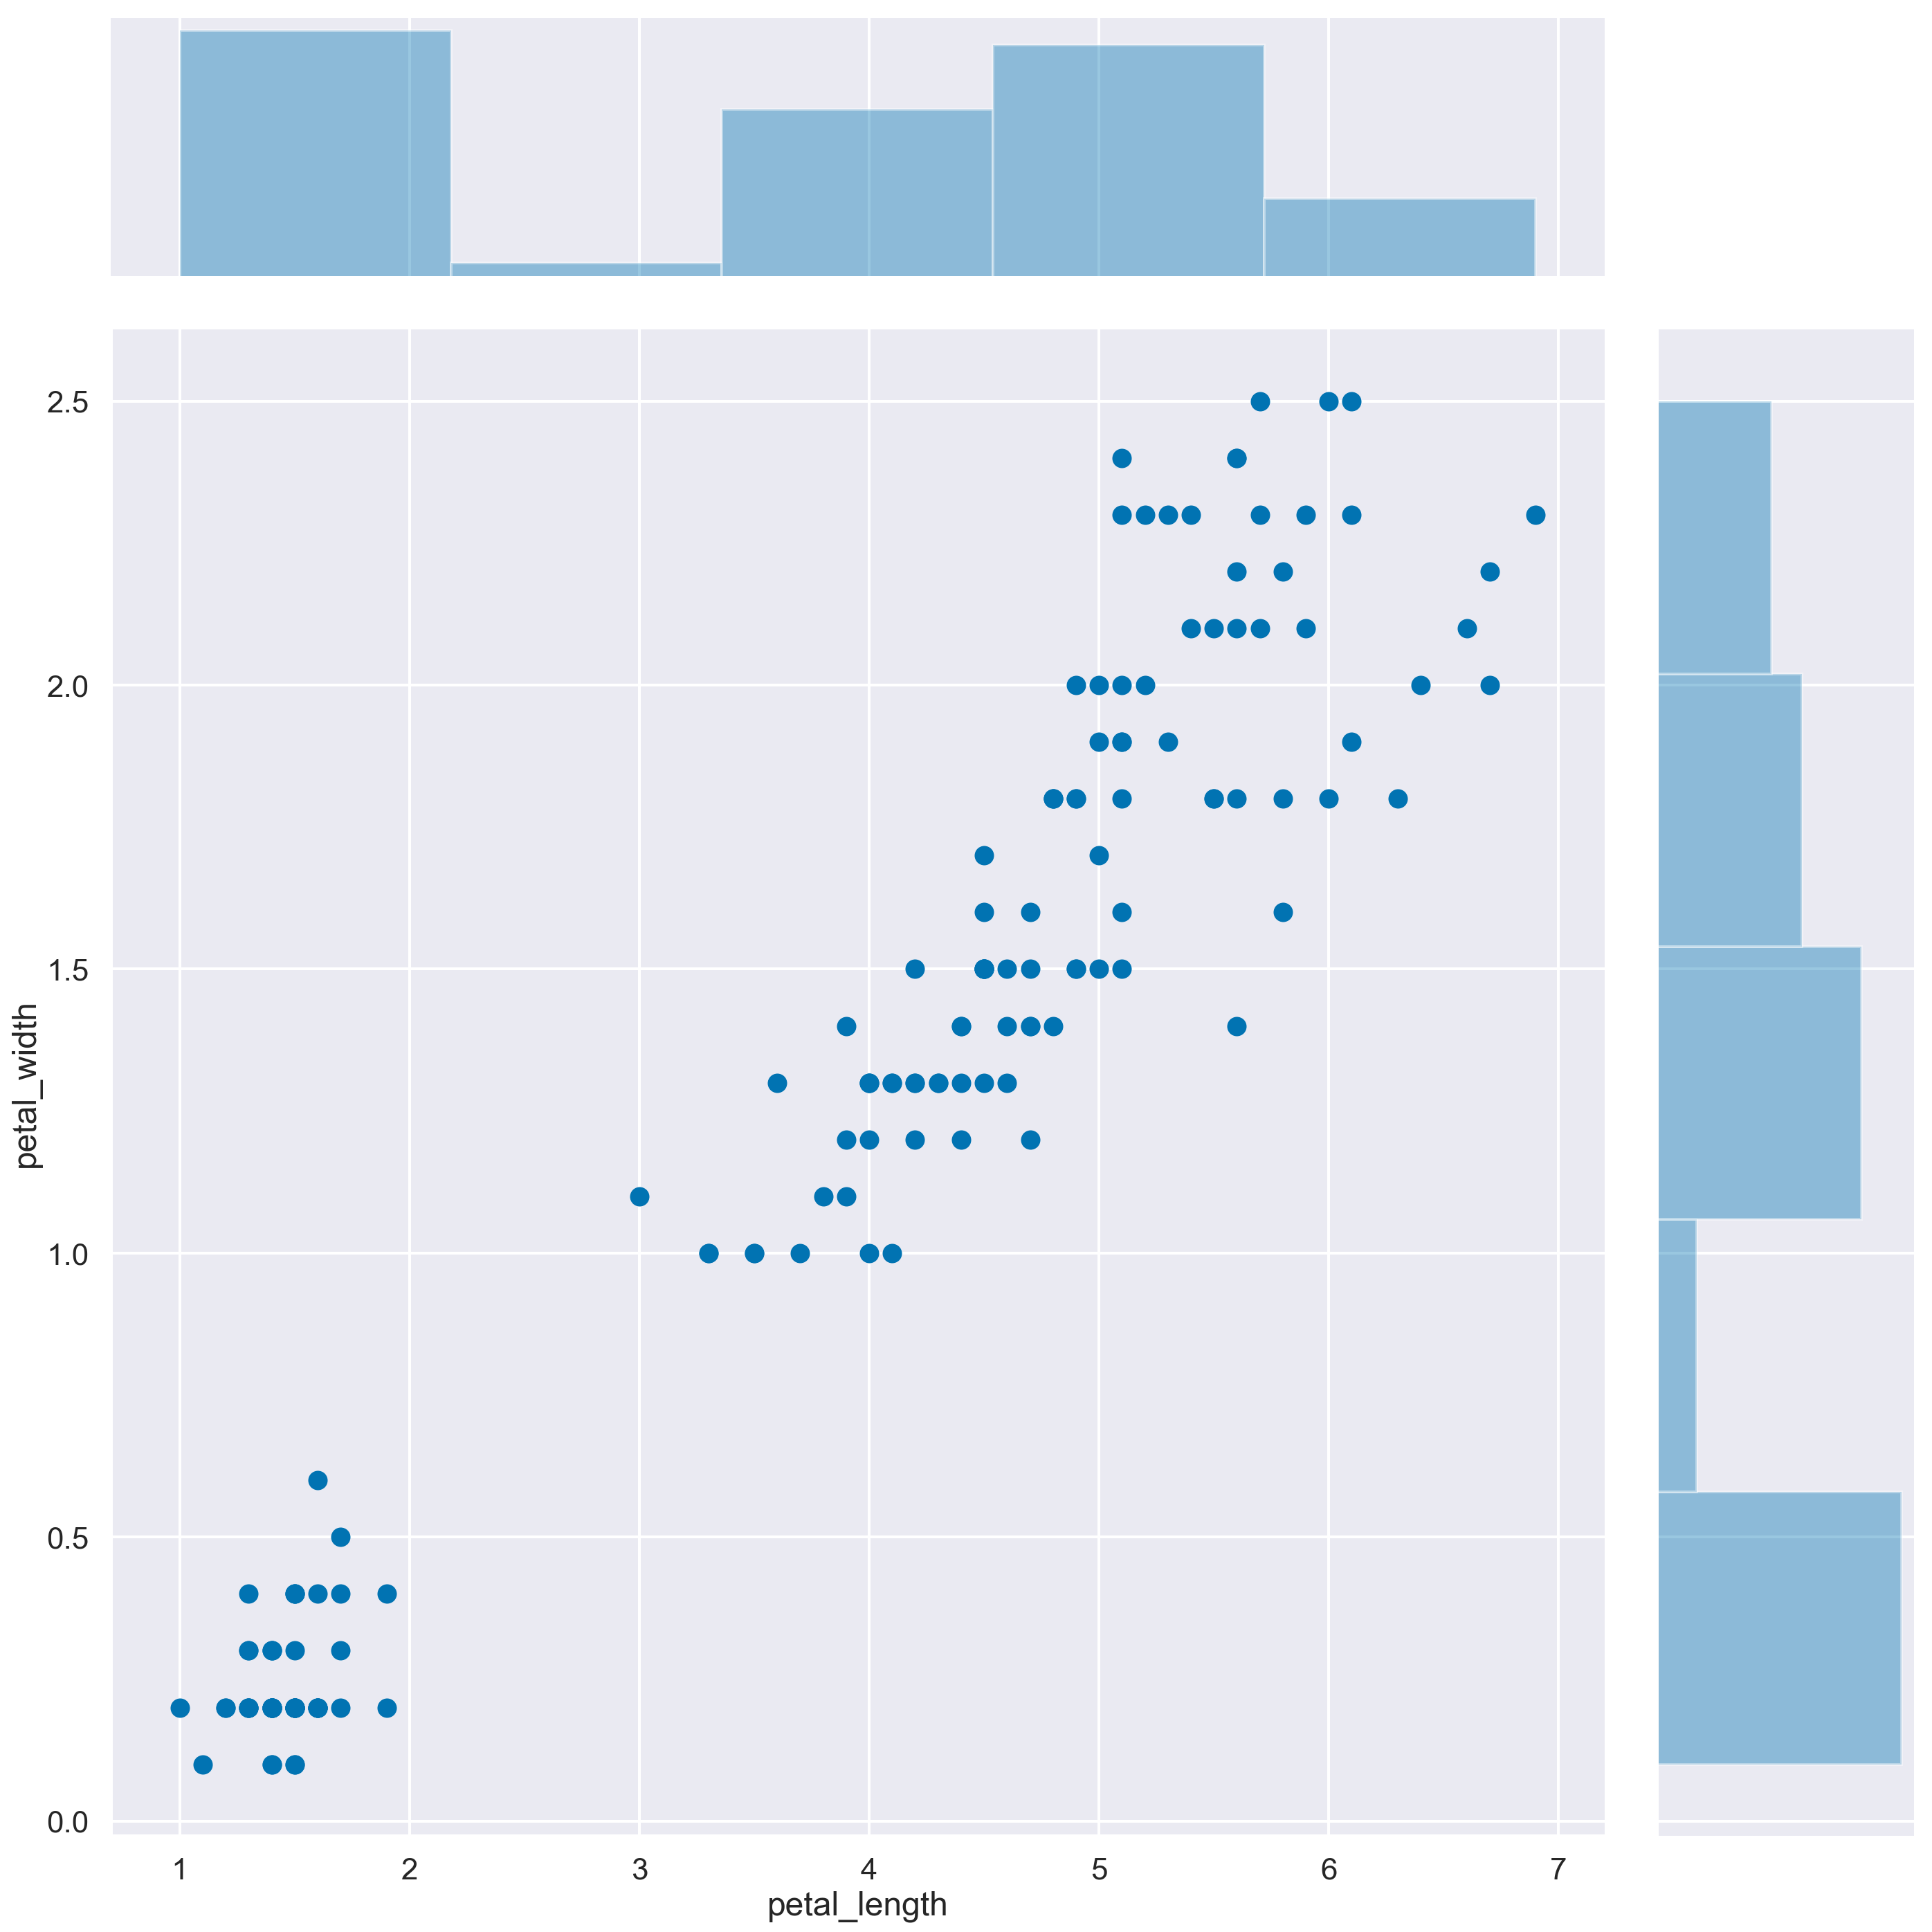

In [35]:
sns.jointplot('petal_length', 'petal_width', iris, height=20)

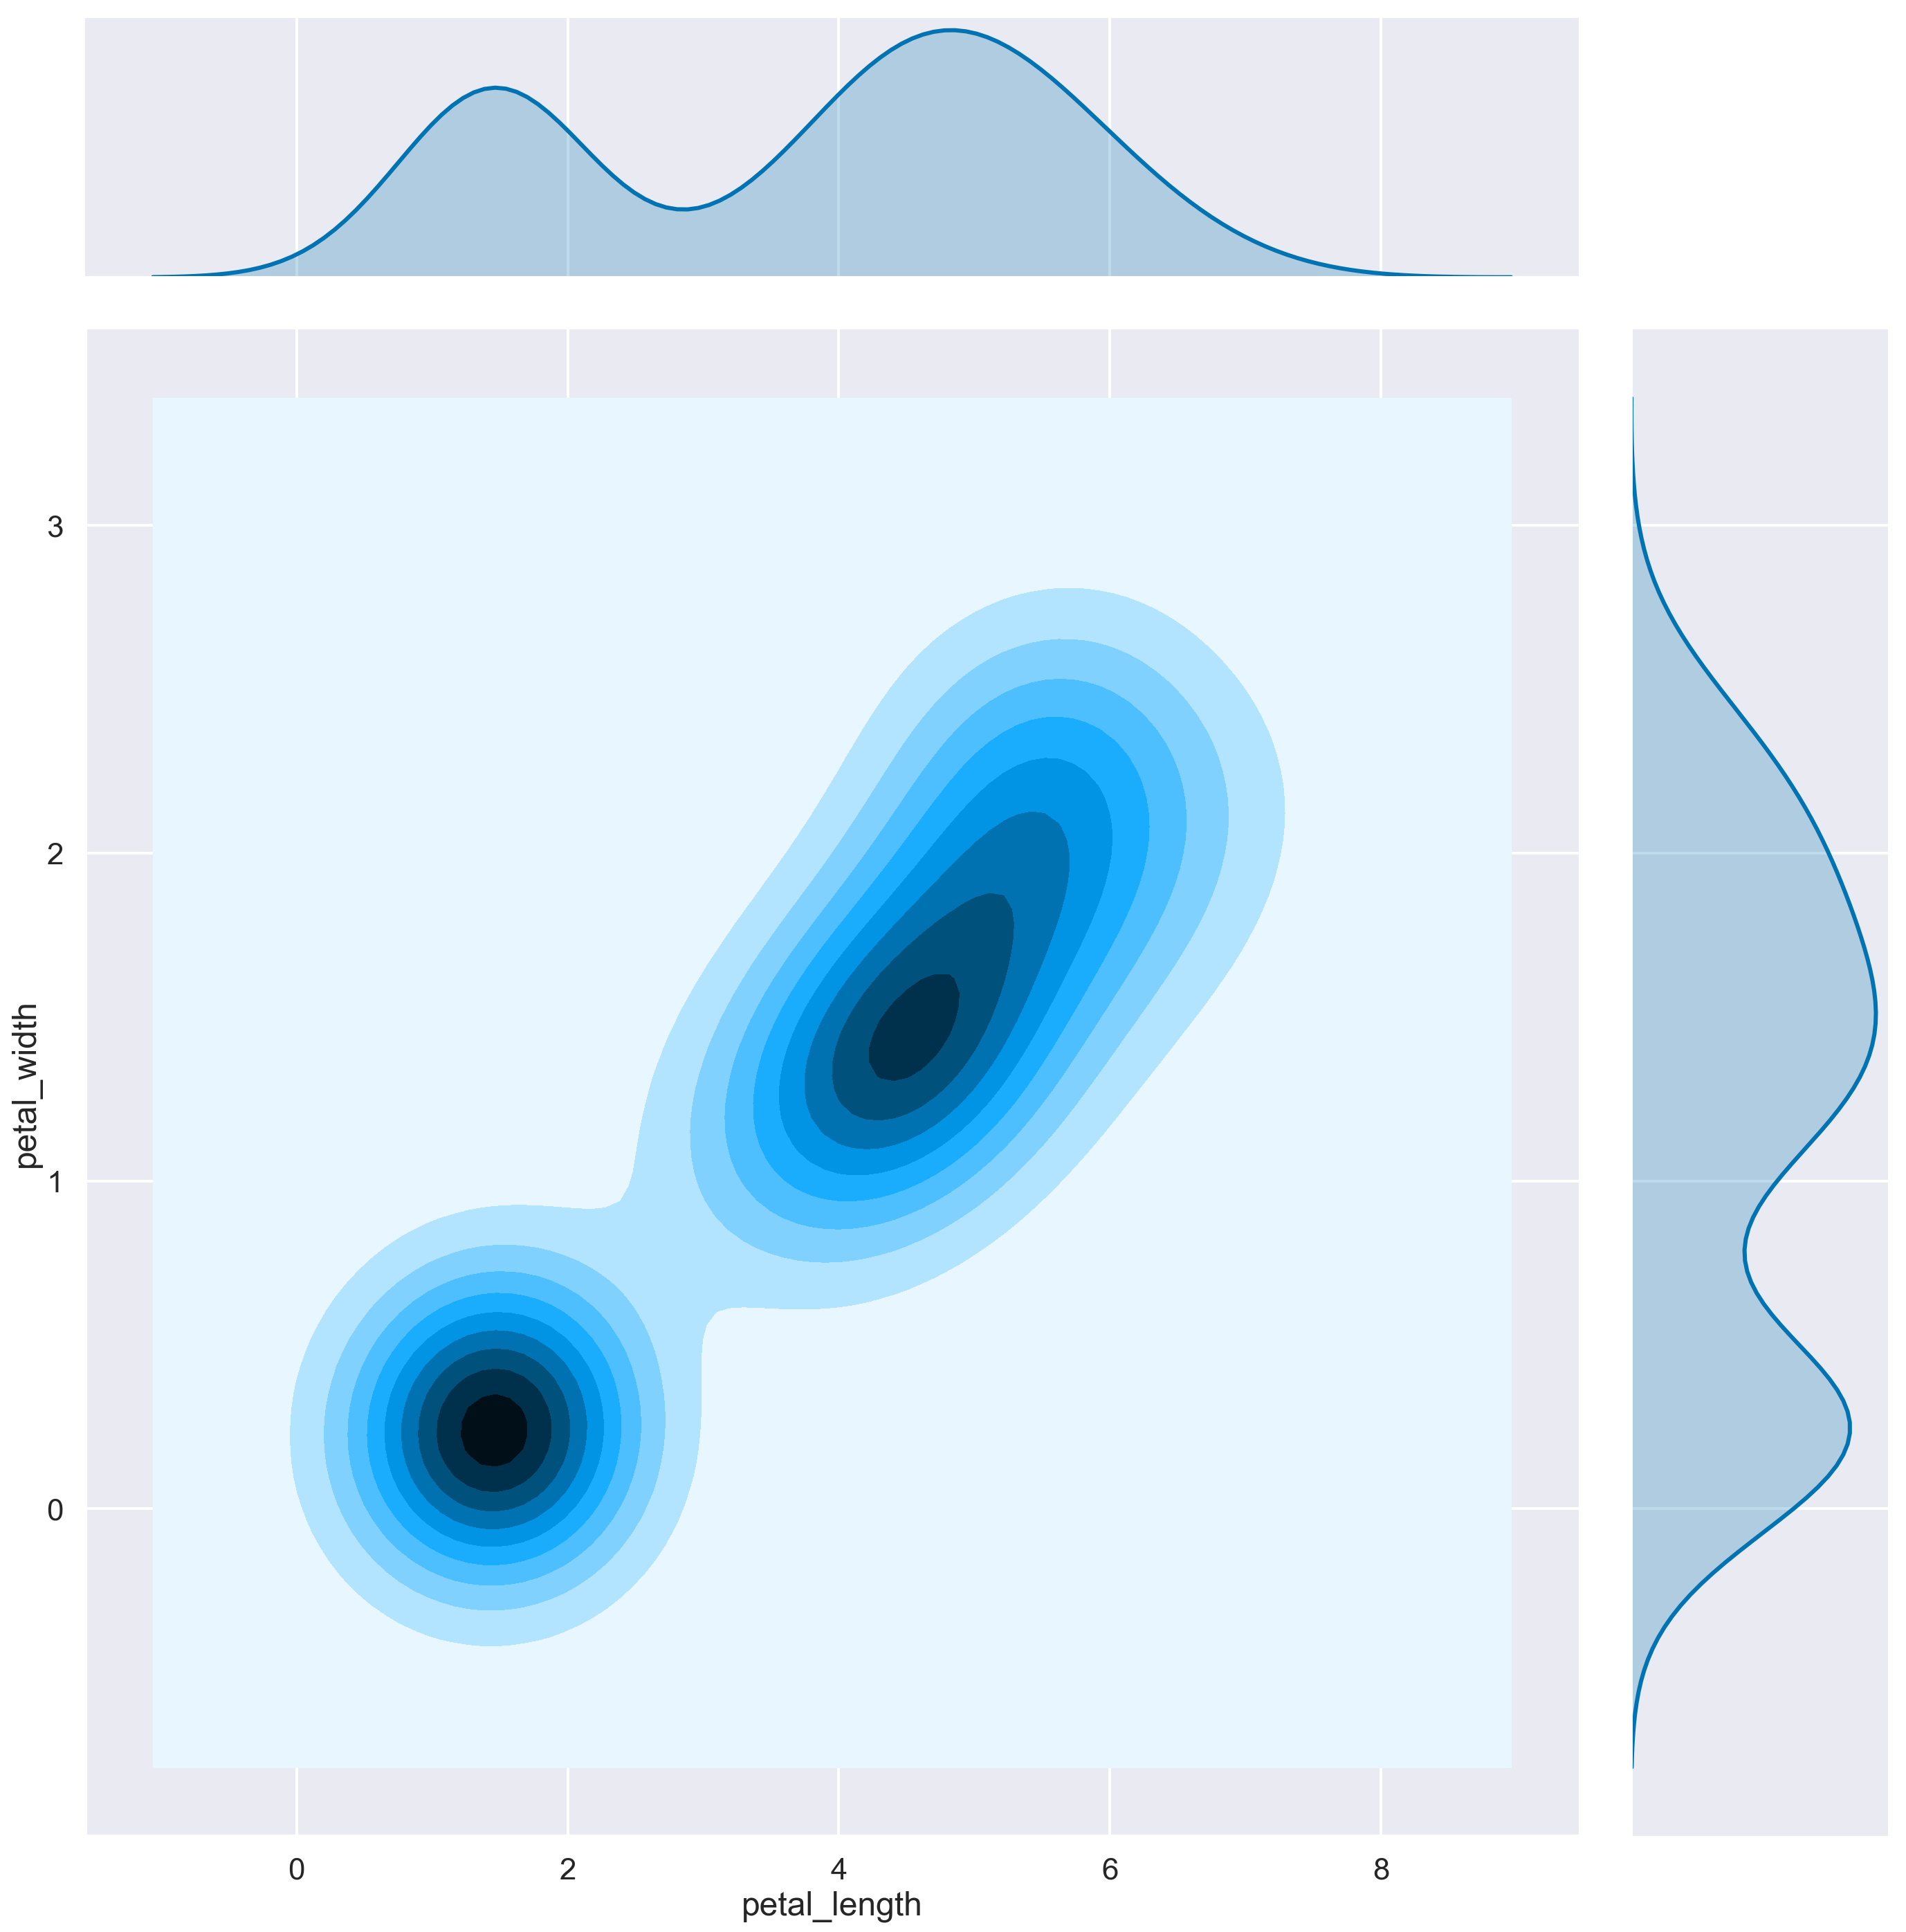

In [36]:
sns.jointplot('petal_length', 'petal_width', iris, height=20, kind='kde')

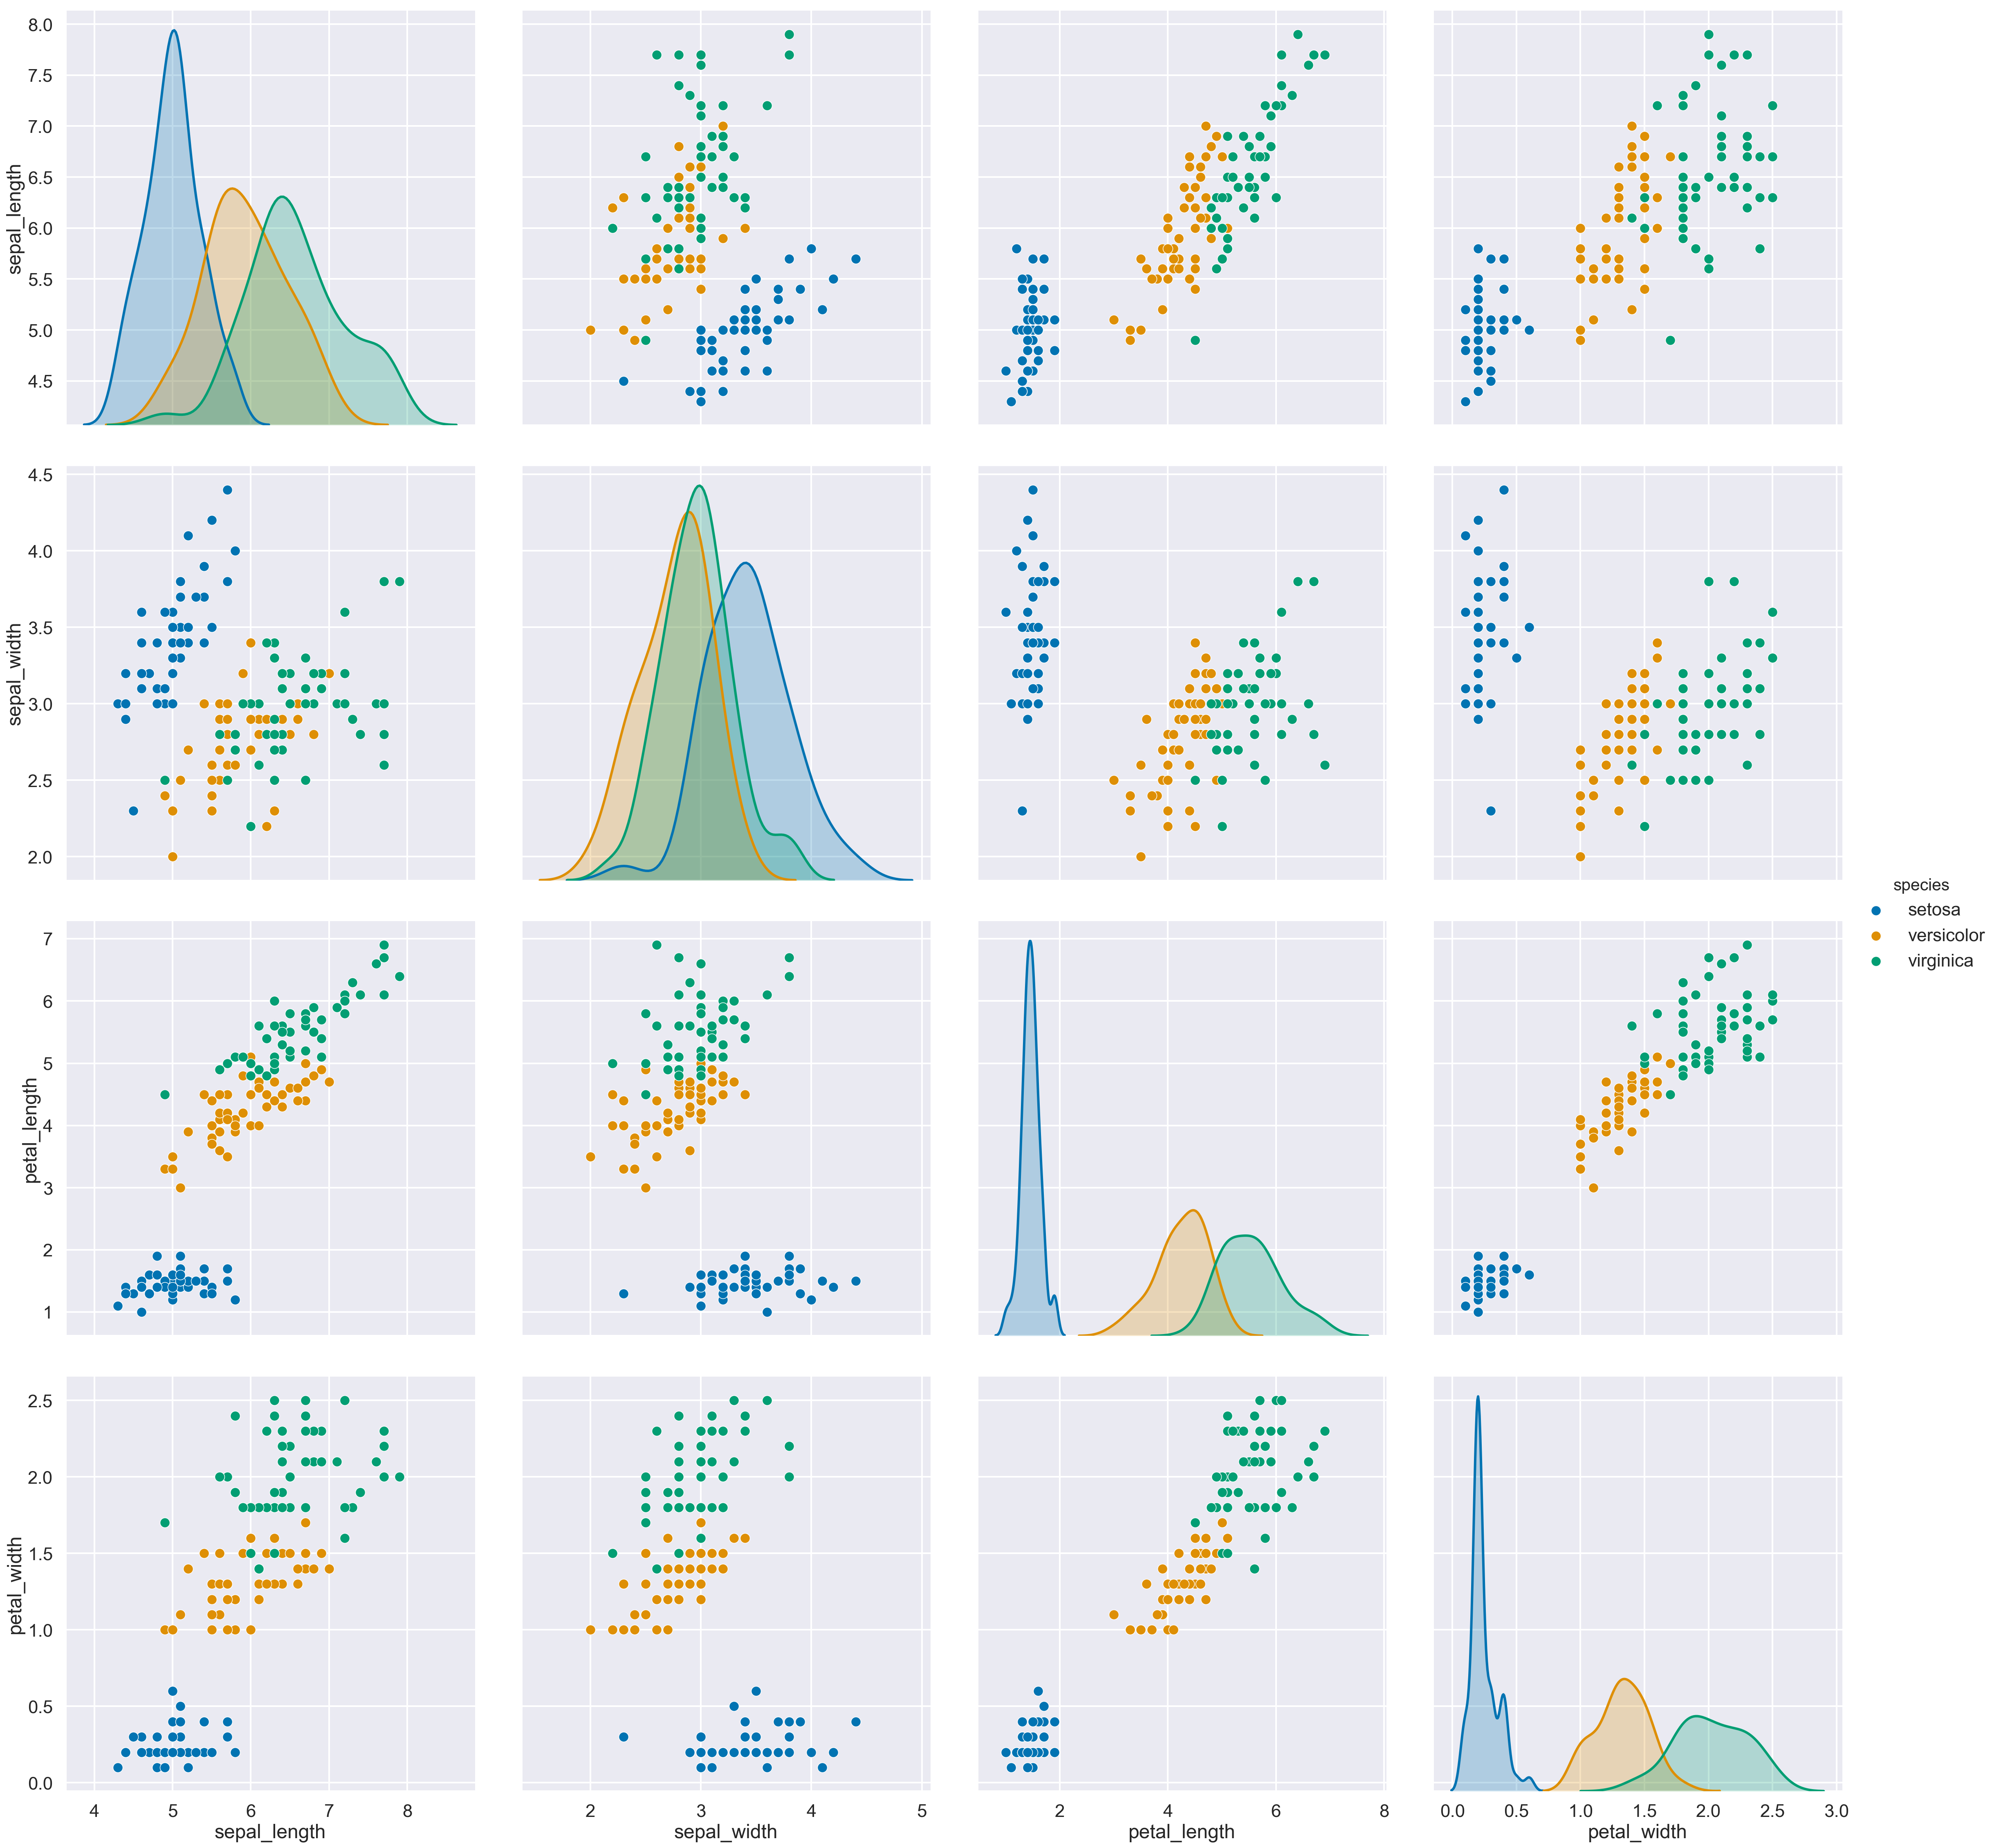

In [37]:
sns.pairplot(iris, height=8, hue='species')

How about categorical data? 

We can make boxplots and violin plots simply by running:

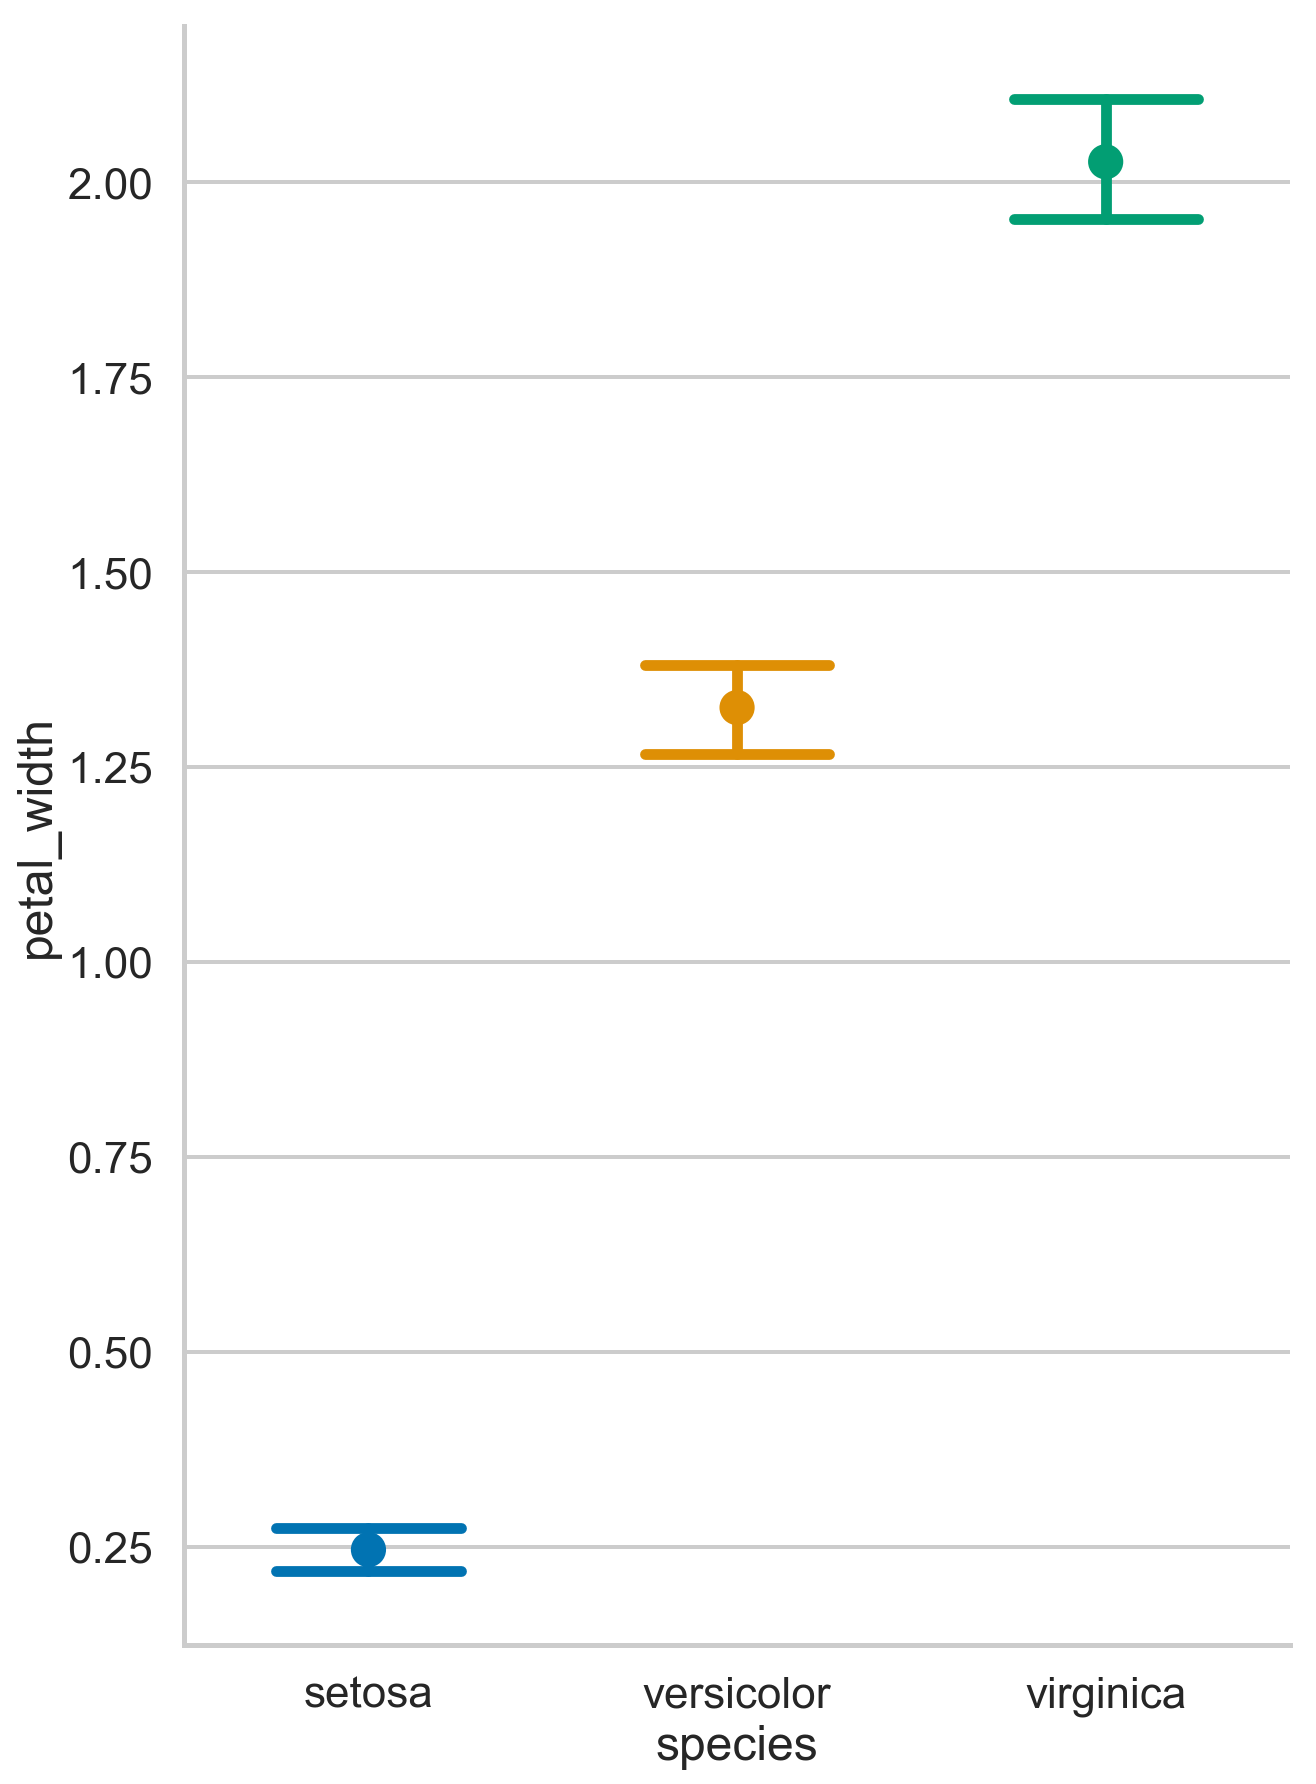

In [38]:
sns.set_style('whitegrid')
sns.catplot(y="petal_width", x="species", capsize=.5,
                palette=sns.palettes.color_palette('colorblind'), height=13, aspect=.75,
                kind="point", data=iris)

In [24]:
sns.__version__

'0.9.0'

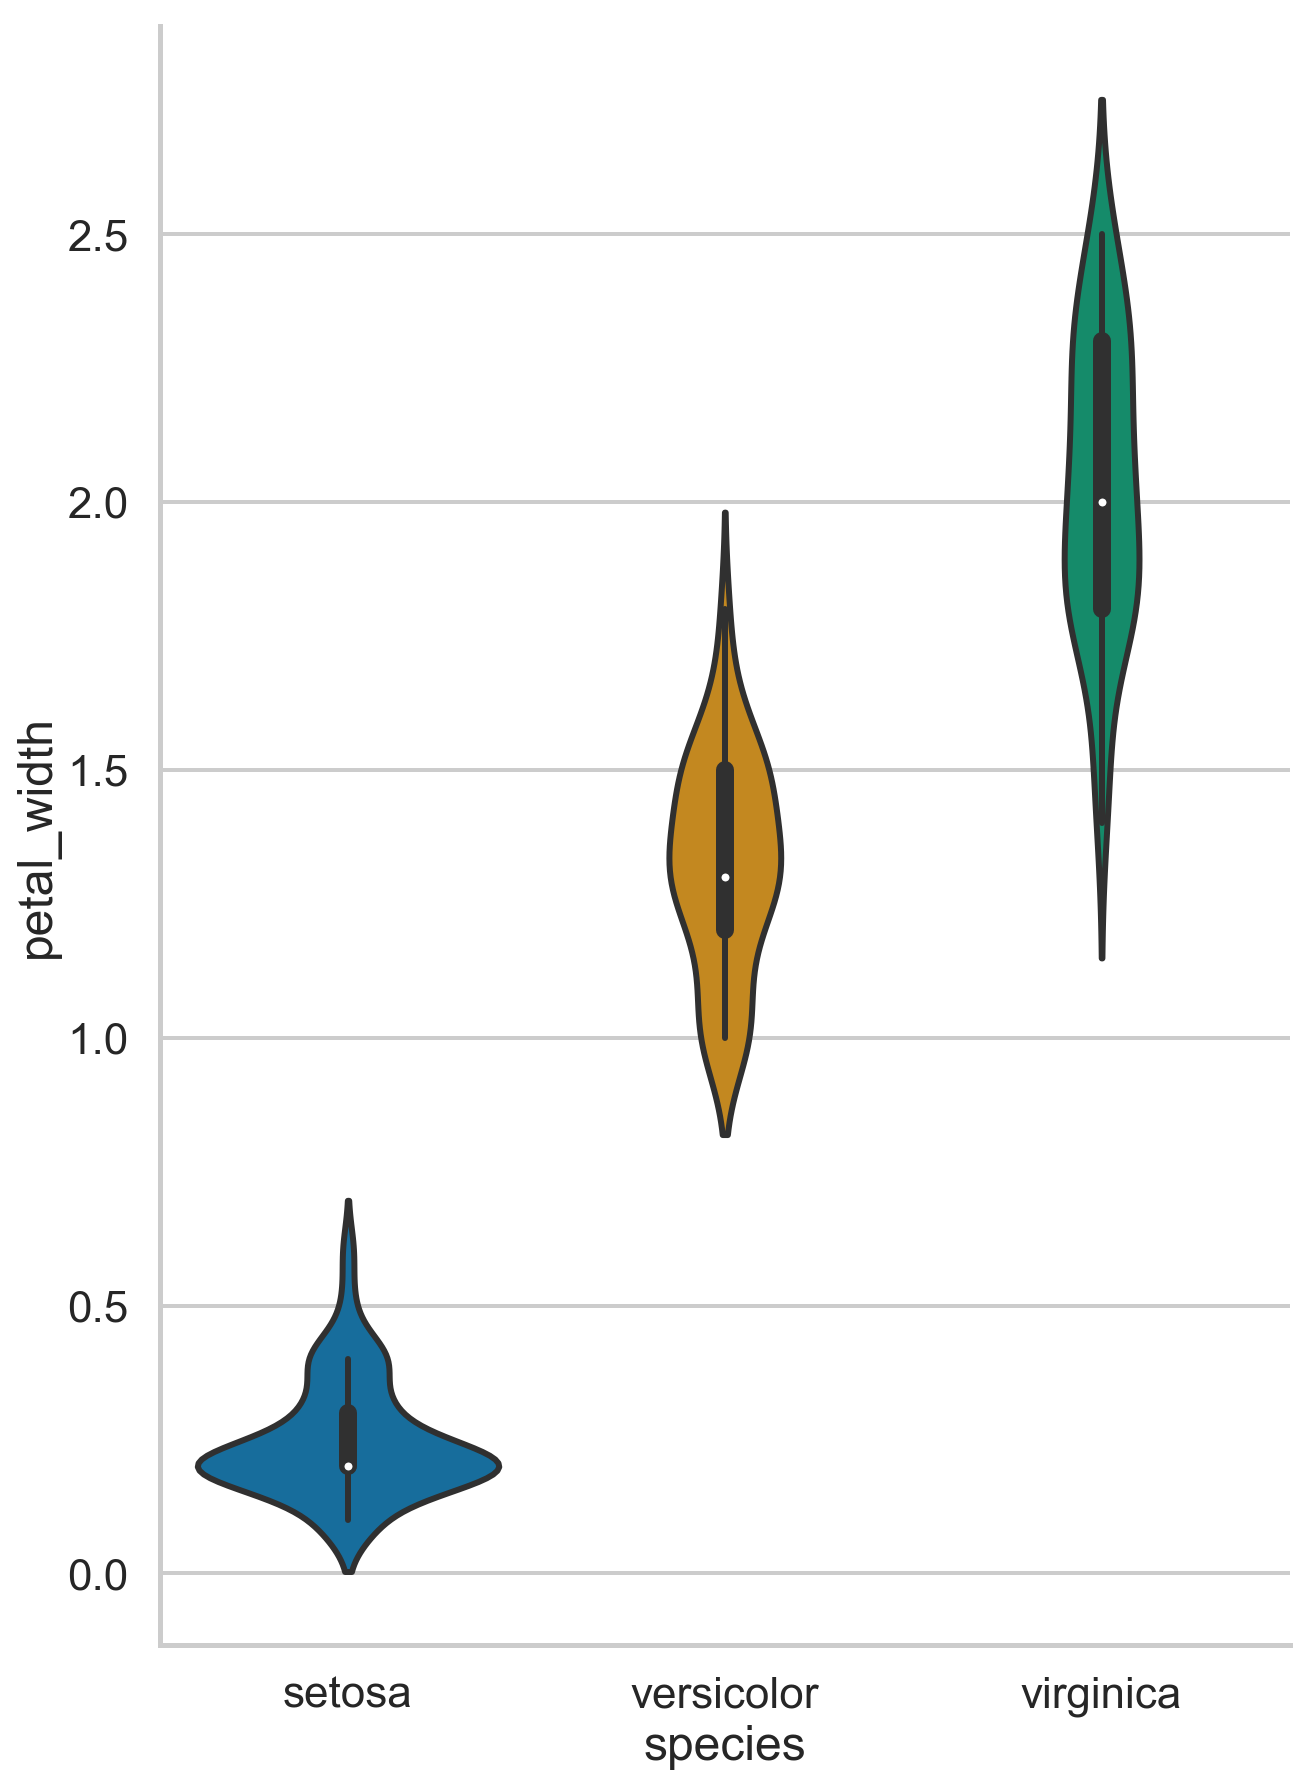

In [39]:
sns.set_style('whitegrid')
sns.catplot(y="petal_width", x="species", capsize=.5,
                palette=sns.palettes.color_palette('colorblind'), height=13, aspect=.75,
                kind="violin", data=iris)

## Custom projections:

In [ ]:
# skipping this

## Colorscales and Heatmaps

Now is an appropriate time to discuss colors and colorscales. In general, you should use either a diverging palette, which is neutral in the middle and goes to two very different extremes on either side; or a palette that changes uniformly in brightness. Most default colorscales in seaborn and matplotlib follow this rules, but this didn't use to be the case (rainbow/jet used to be the default, which is does not changes brightness uniformly)

You can make custom color palettes and use them very easily in seaborn, here are some examples:

In [28]:
sns.diverging_palette?

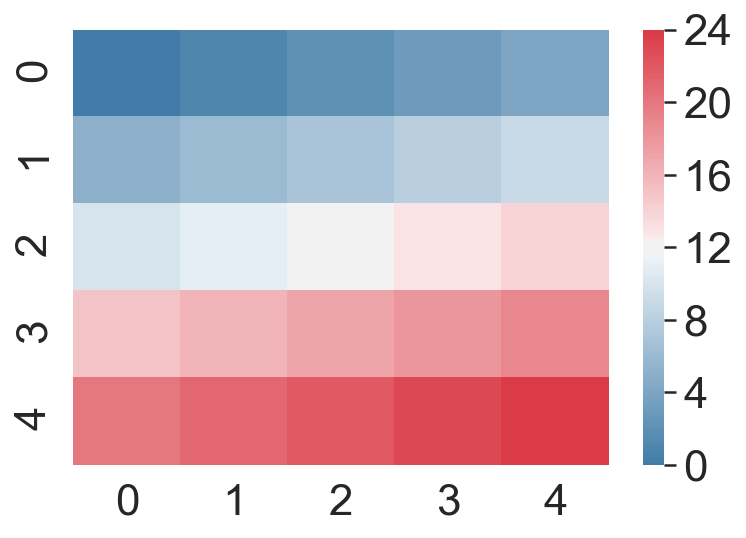

In [27]:
cmap =  sns.diverging_palette(240, 10, n=3, as_cmap=True)
sns.heatmap(arange(25).reshape(5, 5), cmap=cmap)

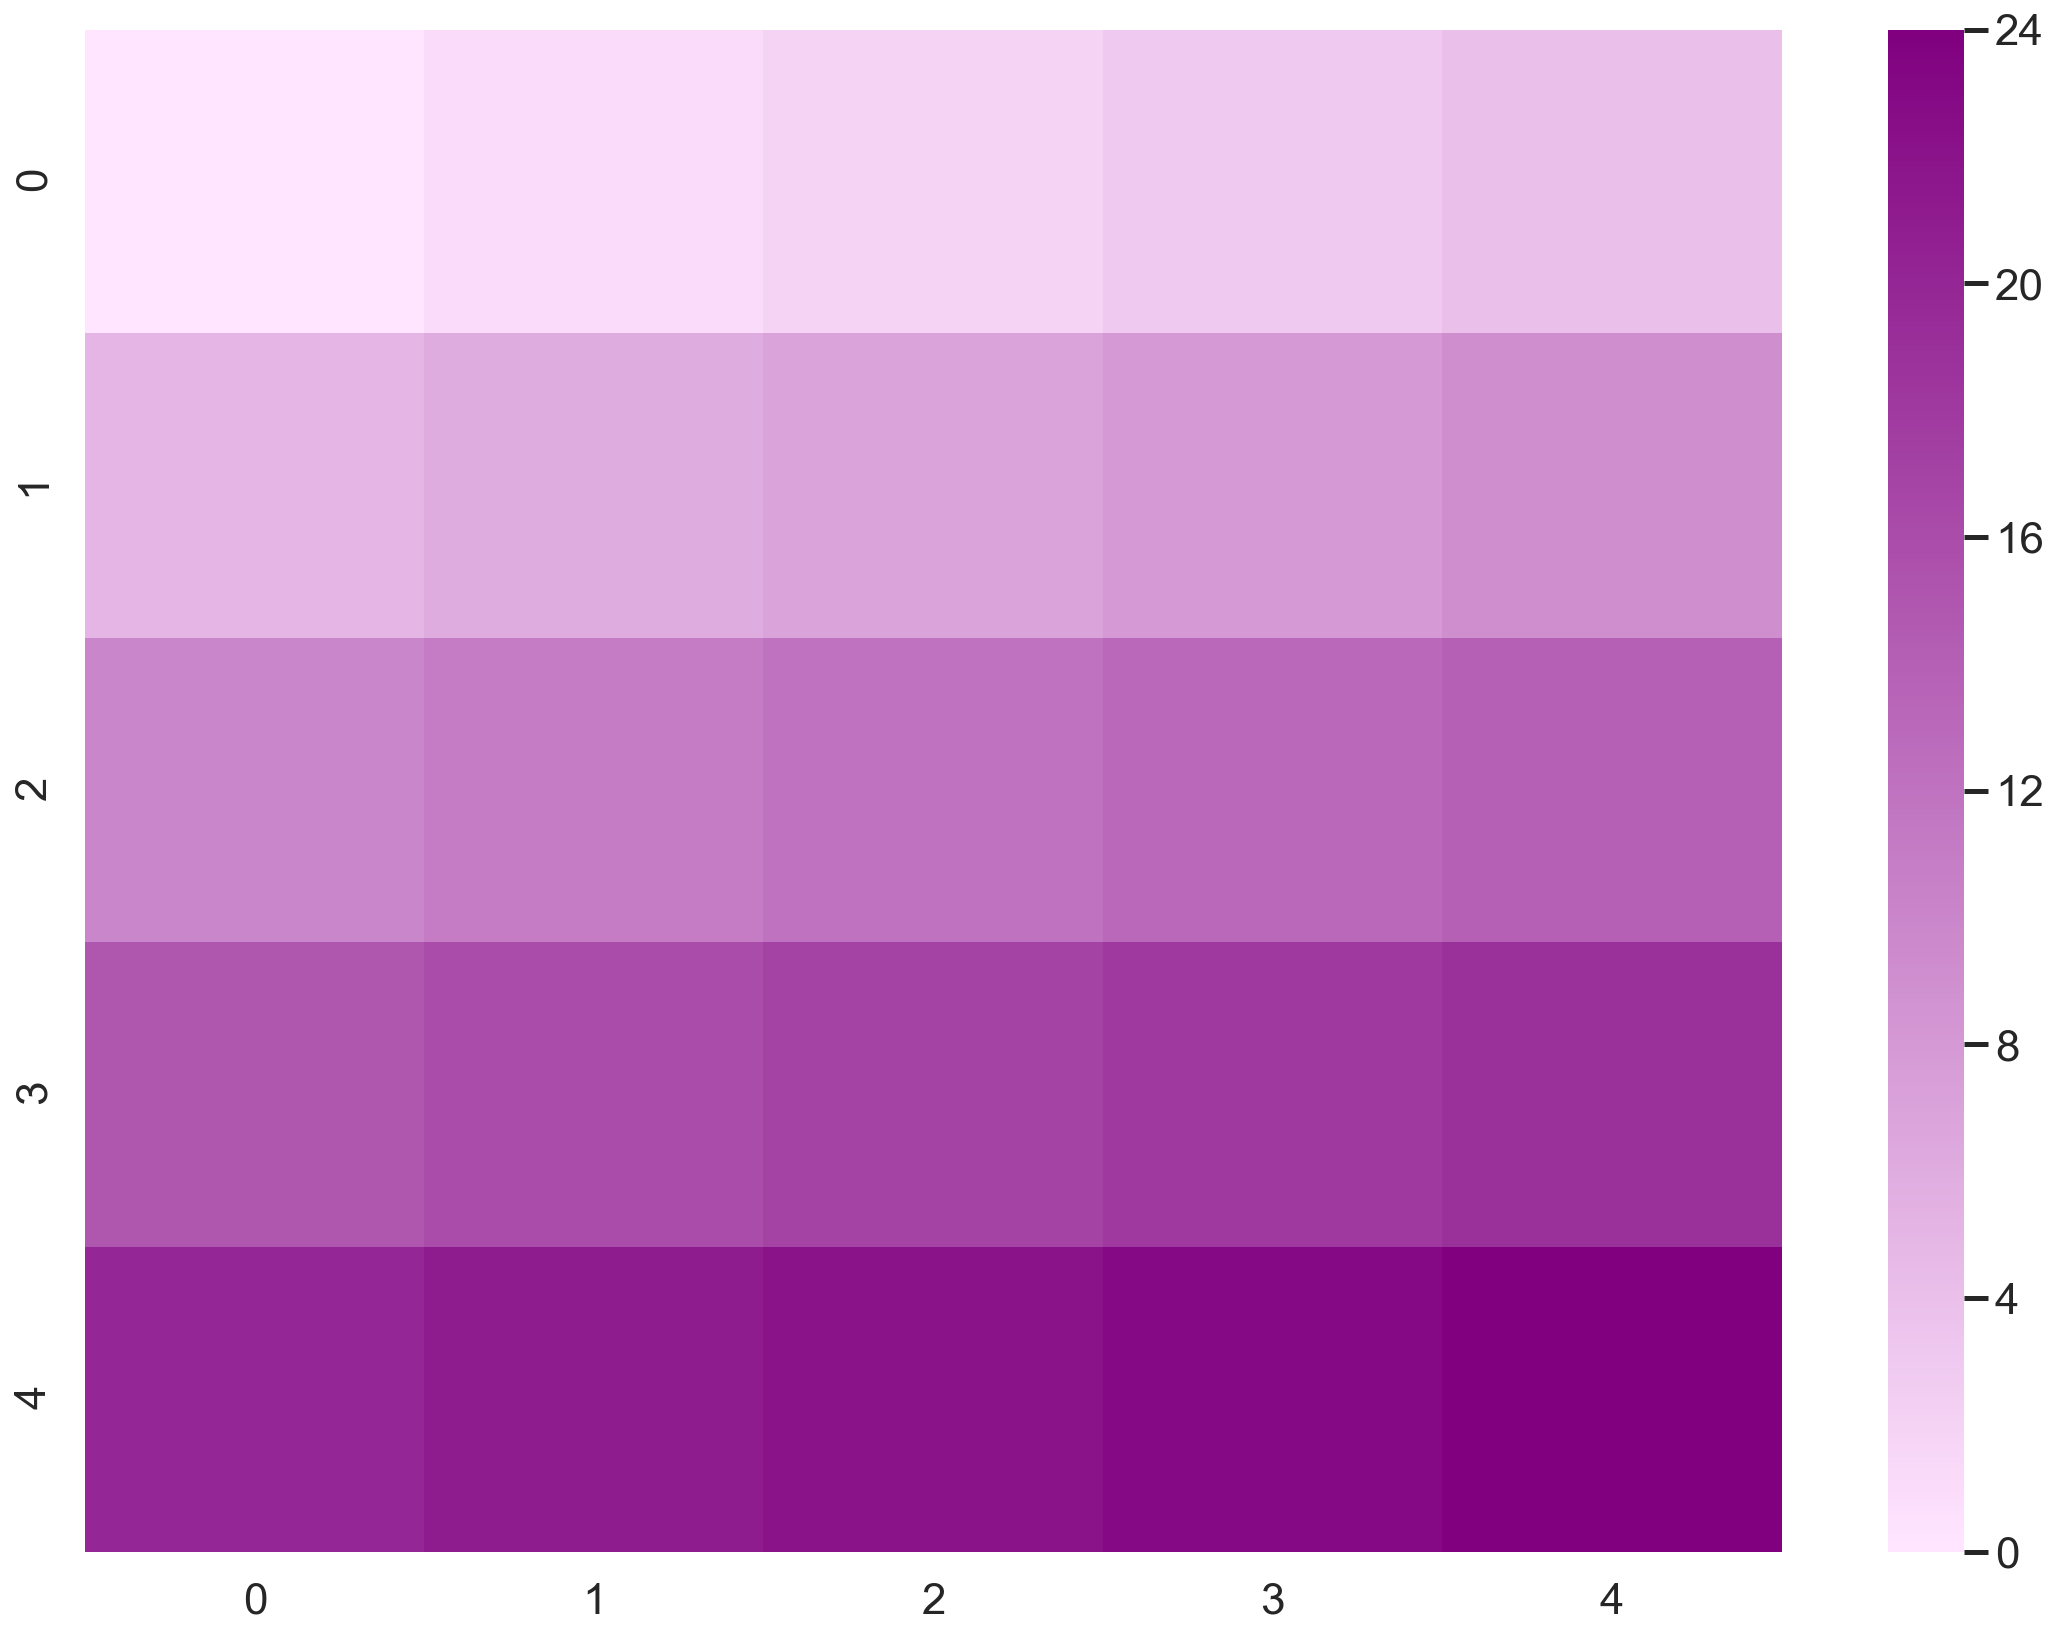

In [41]:
cmap =  sns.light_palette('purple', as_cmap=True)
sns.heatmap(arange(25).reshape(5, 5), cmap=cmap)

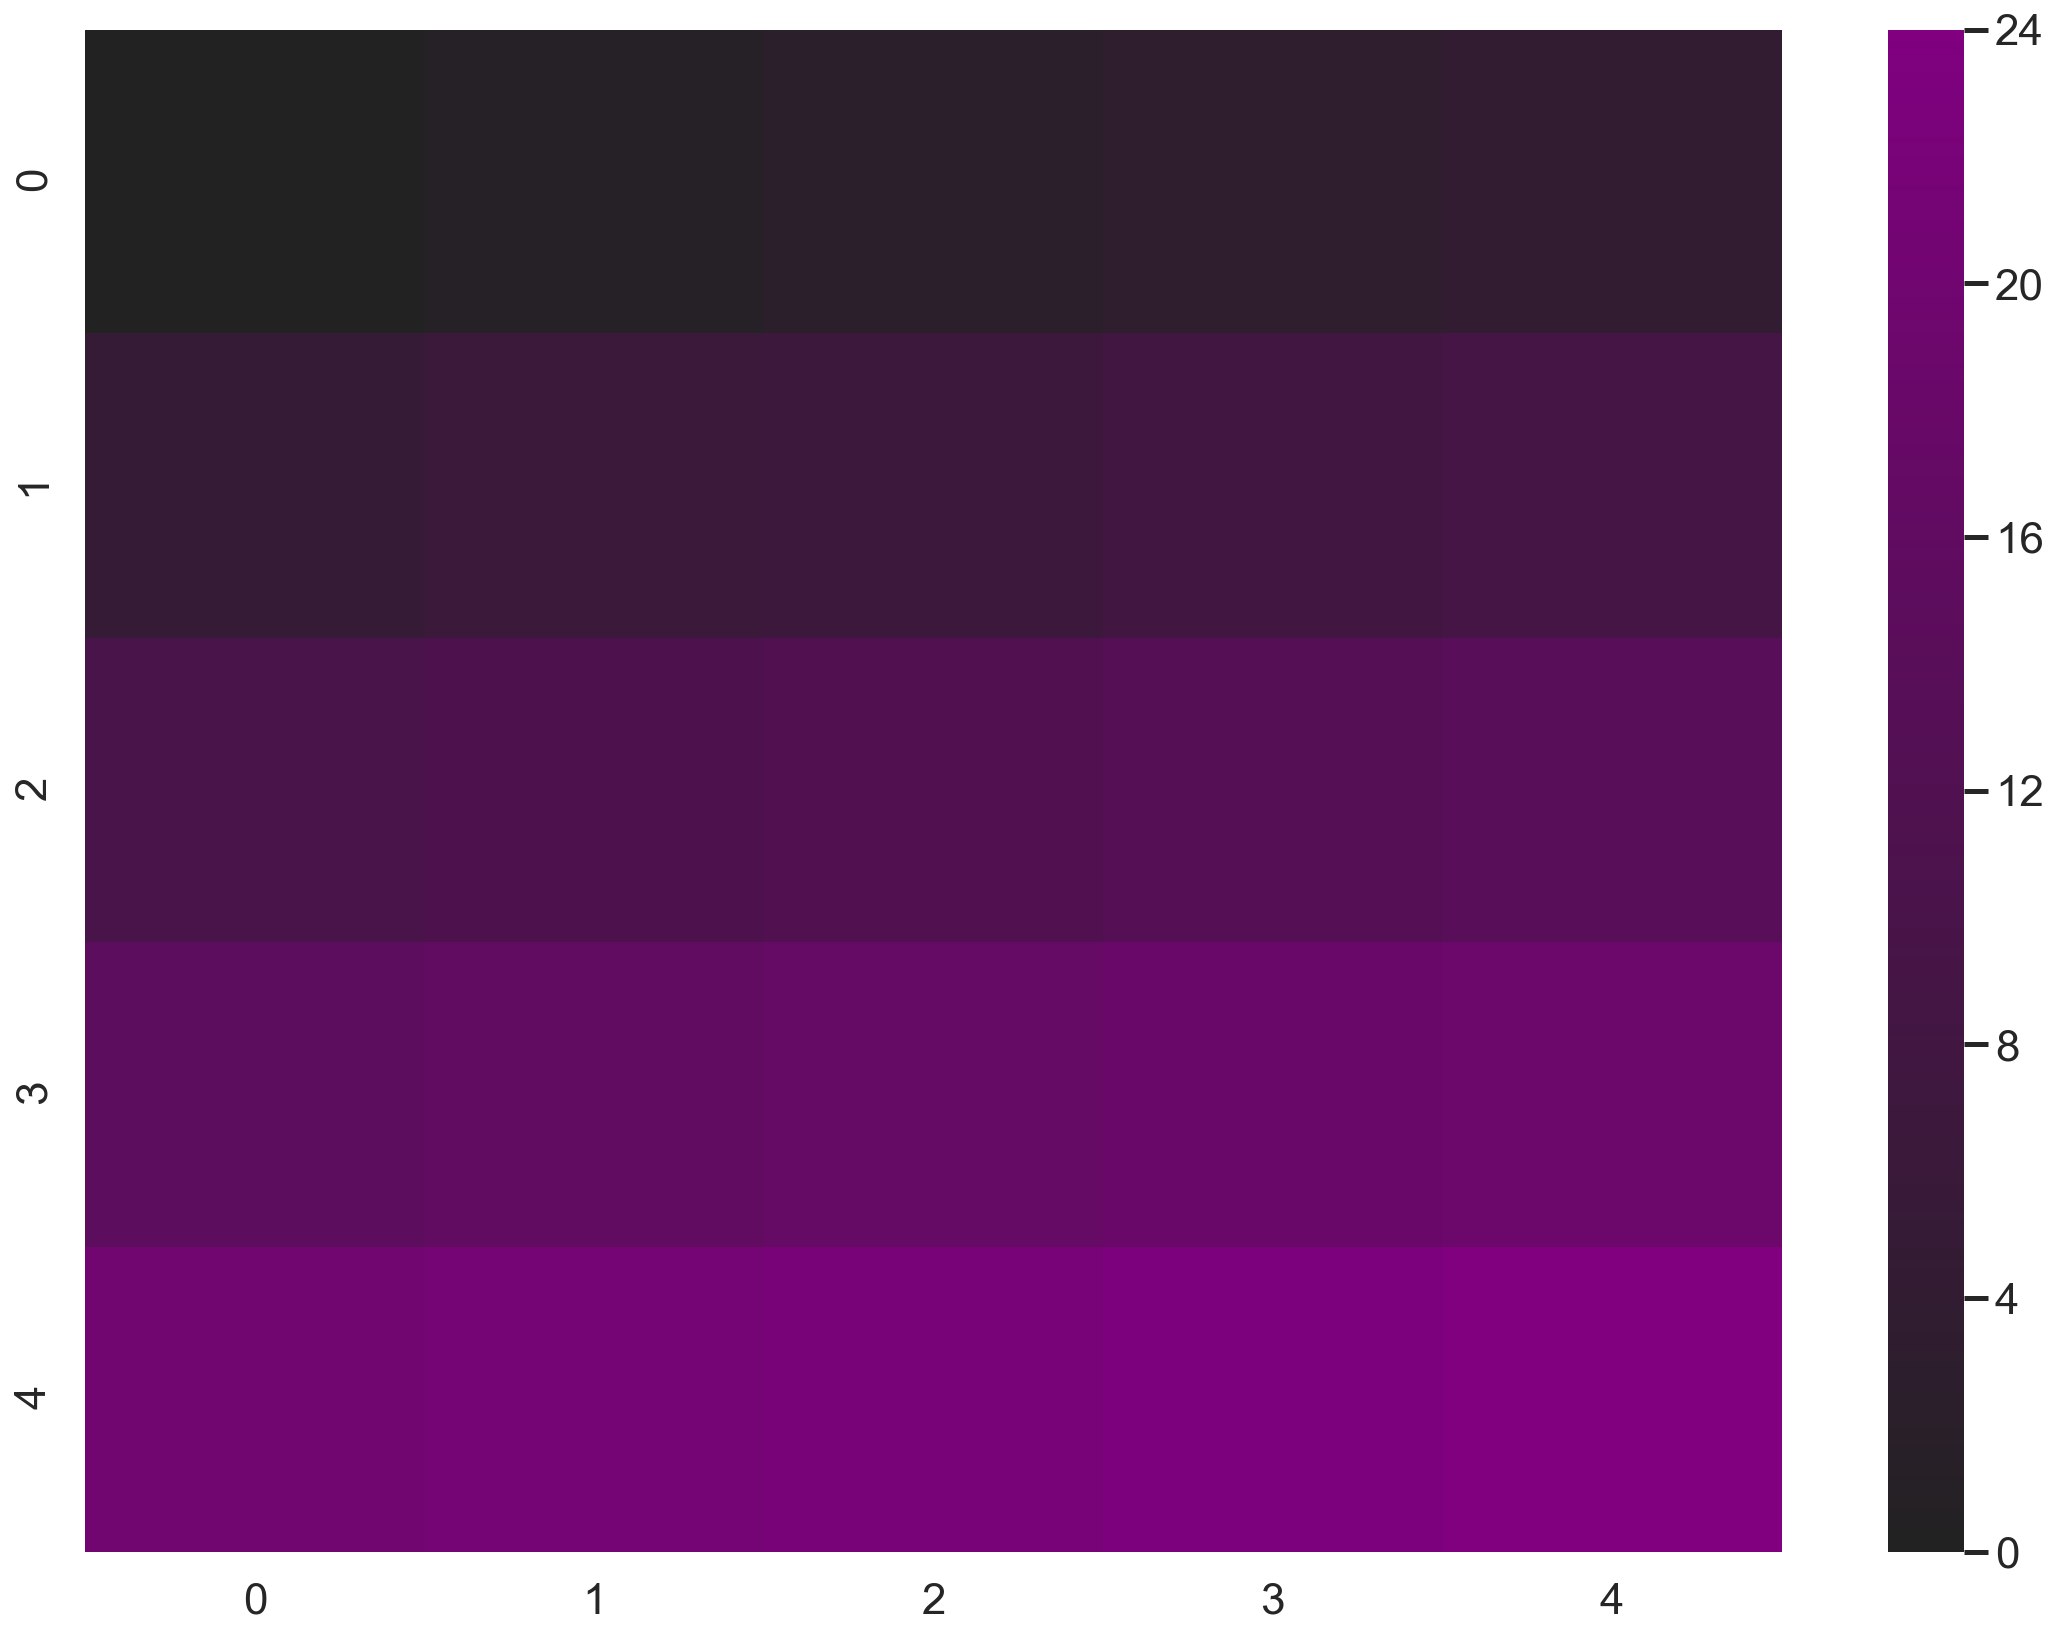

In [42]:
cmap =  sns.dark_palette('purple', as_cmap=True)
sns.heatmap(arange(25).reshape(5, 5), cmap=cmap)

Heatmaps are often used to find structure and correlations in the data. Seaborn provides simple functions to do this:

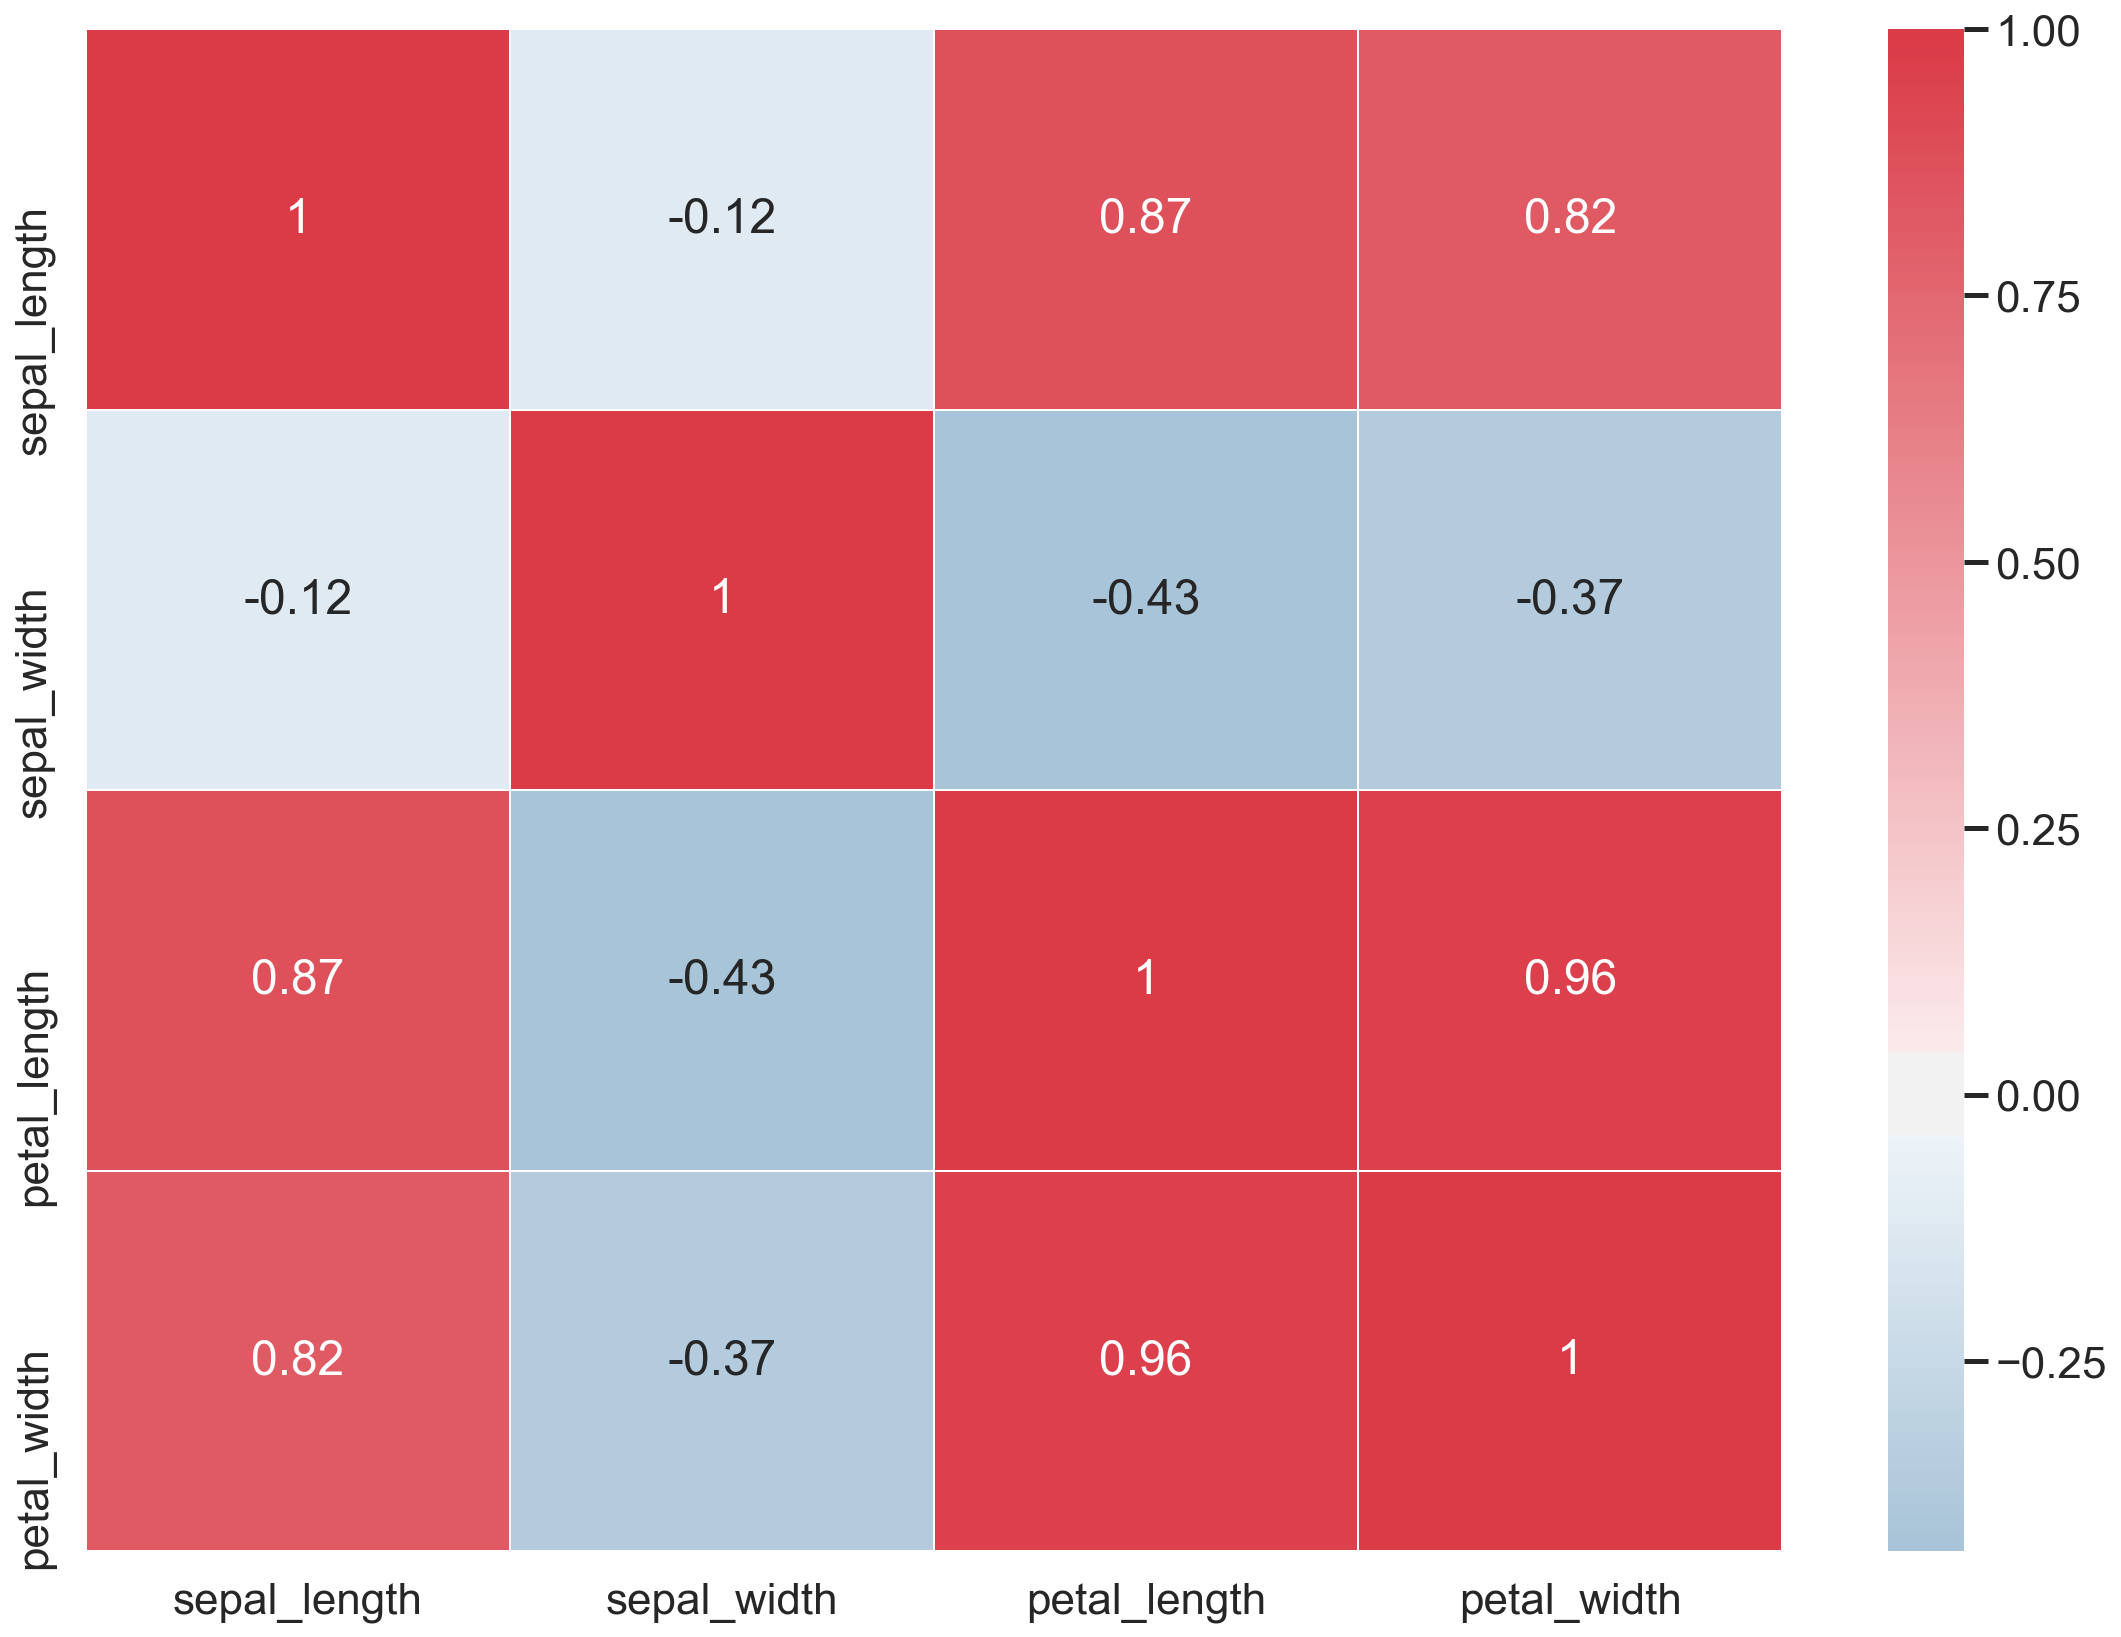

In [43]:
sns.heatmap(iris.corr(), cmap=sns.diverging_palette(240, 10, n=9, as_cmap=True), 
               annot=True,
               linewidth=.5, center=0)

or as a `clustermap`

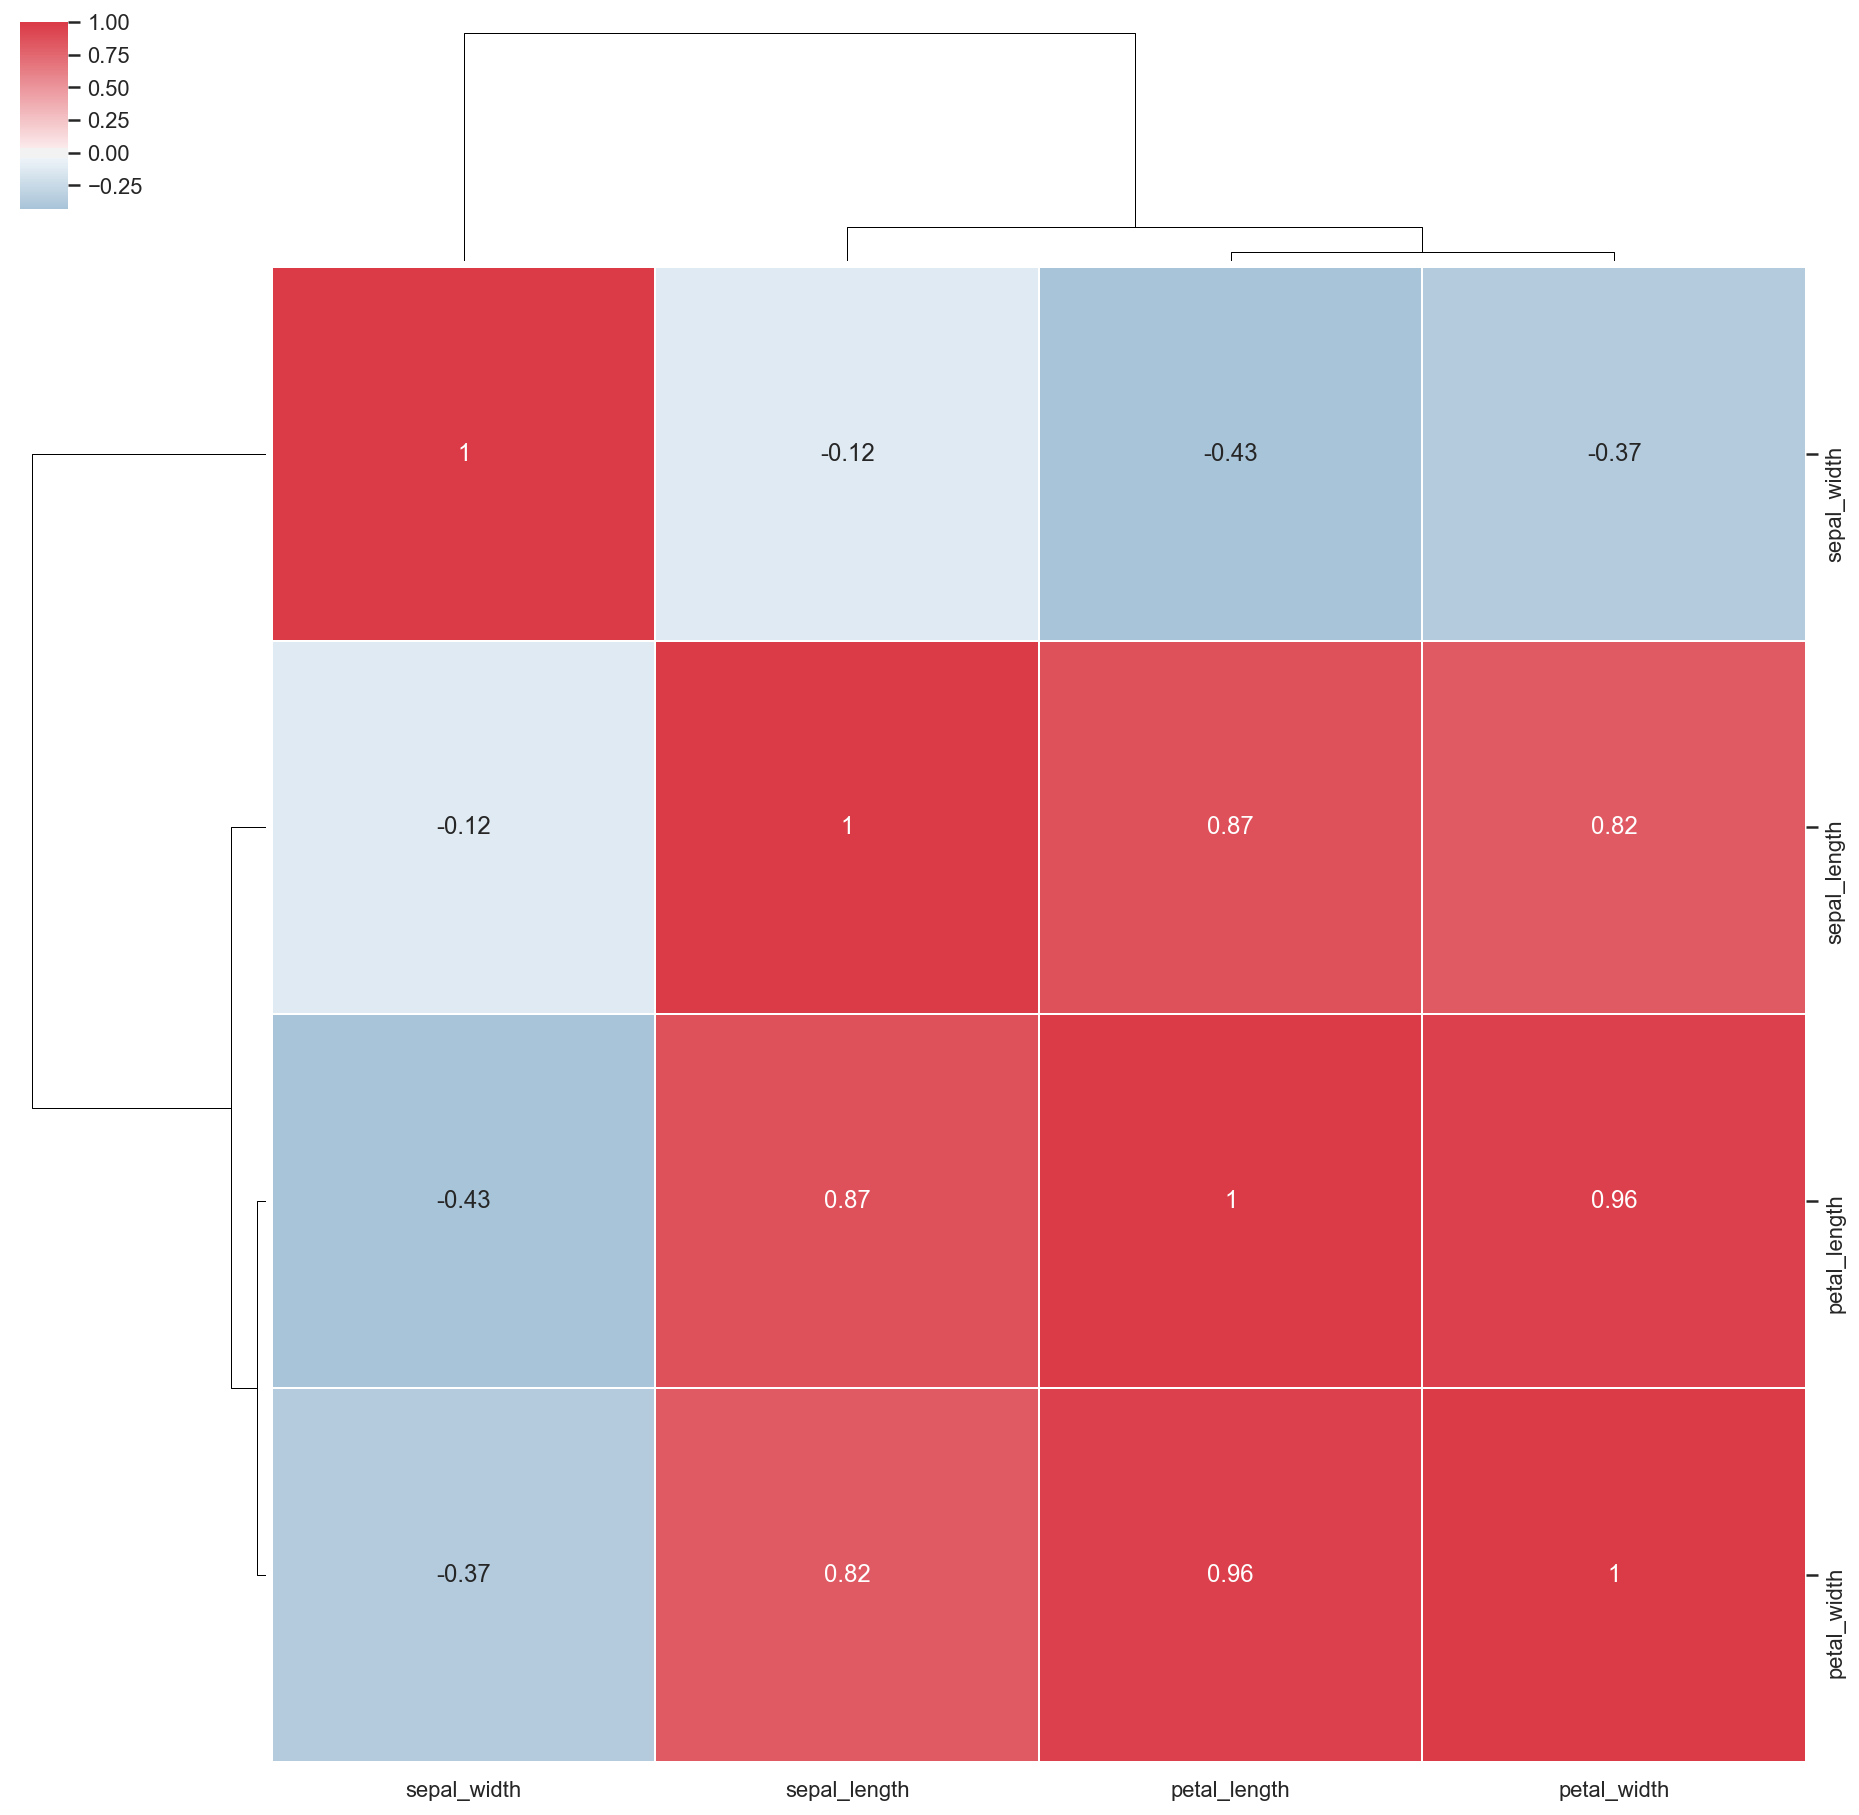

In [44]:

sns.set_context('notebook')

sns.clustermap(iris.corr(), cmap=sns.diverging_palette(240, 10, n=9, as_cmap=True), 
               annot=True, figsize=(16,16),
               linewidth=.5, center=0)

In [45]:
sns.set_style('darkgrid')
sns.set_context('poster')

### Exercise:

How many dimensions are there on a 2D screen? Post in http://bit.ly/DSCVizPlots

We can in fact represent a lot more than just 2 dimensions on a 2D screen, for example, we can map a feature to color, another to size, yet another to orientation (e.g. in a quiverplot). Here's an example:

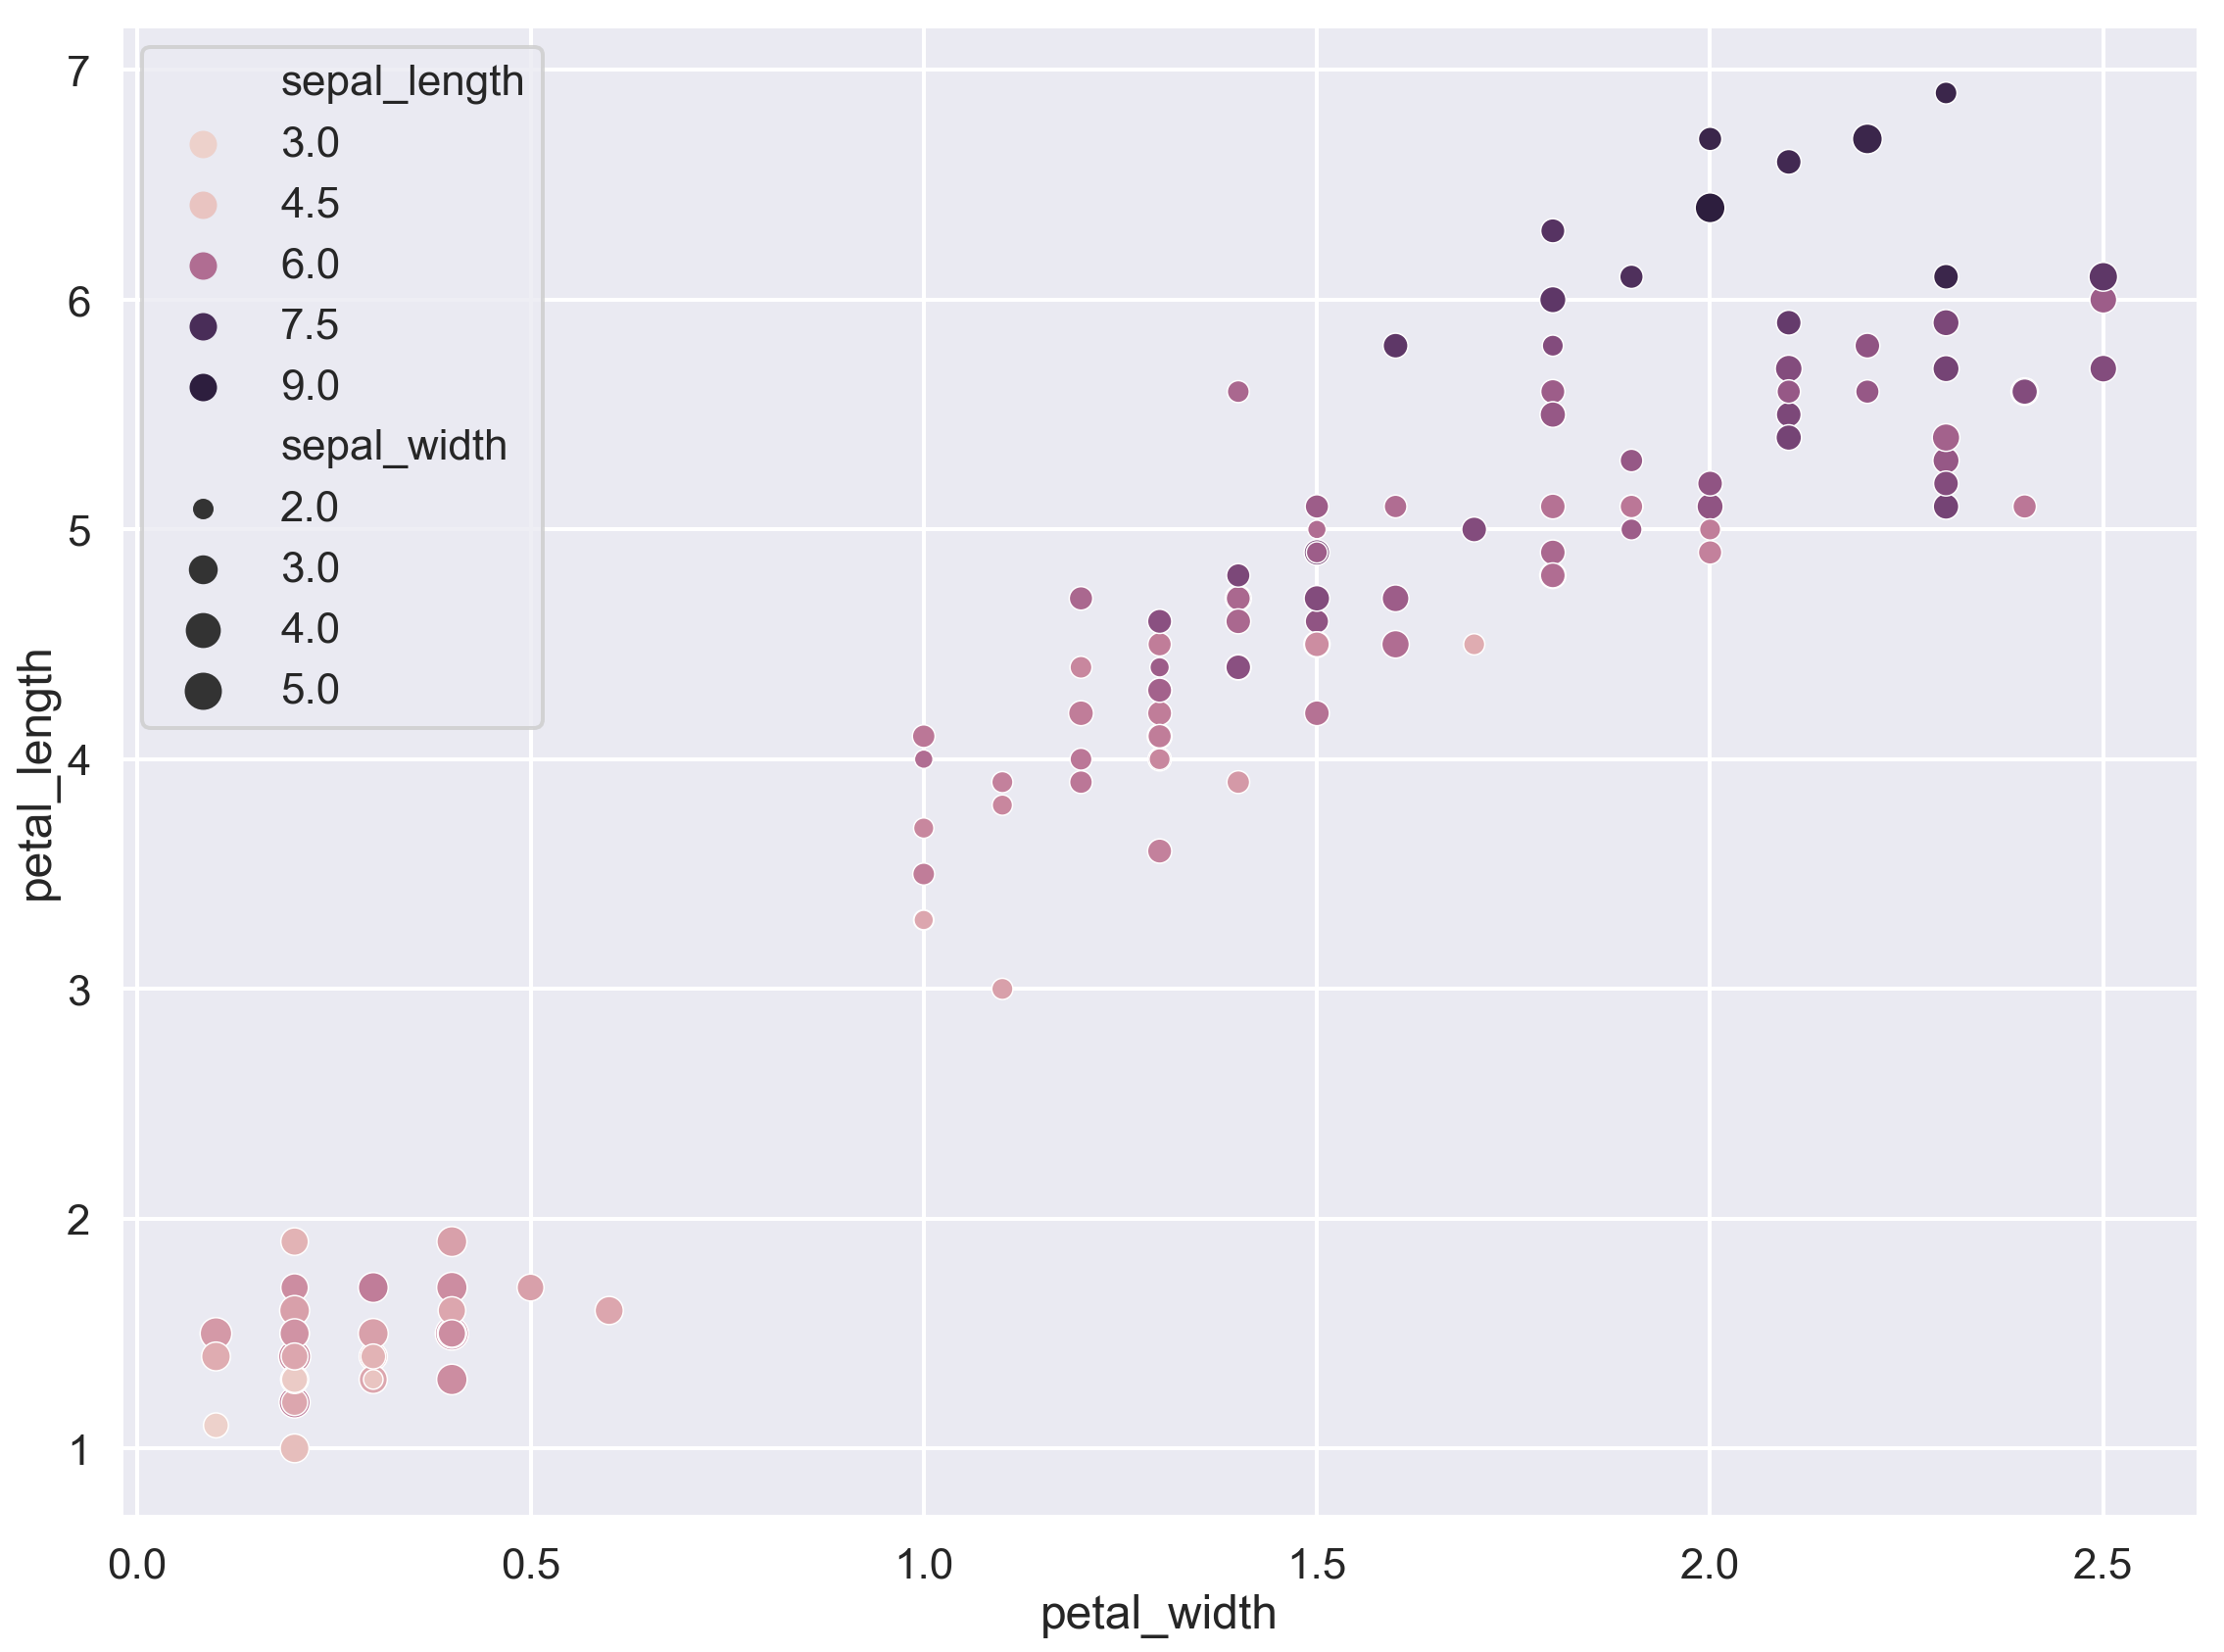

In [46]:
sns.scatterplot(x='petal_width', y='petal_length', size='sepal_width', hue='sepal_length', data=iris)

## Interactive Visualization:
continued [here](InteractiveVisualization.ipynb)